# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Copyright statement: 
#### <span style='font-family:"Times New Roman"'>The initial code was provided by Dr. Sandoval (Assitant professor of Electrical Engineering, New Mexico State University) as a starting point for project. https://web.nmsu.edu/~spsandov/ 
#### <span style='font-family:"Times New Roman"'>The algorithm in current form is developed by Sina Zamen. 

# <span style='background:black'><span style='color:Cyan'> <span style='font-family:"Times New Roman"'> Objective: 
## <span style='font-family:"Times New Roman"'>In this problem, application of multi-layer perceptron with three hidden layers and 10 neurons (4 in first, 3 in second, and 3 in last hidden layer) for classifying Double Moon Dataset is considered.  

### <span style='font-family:"Times New Roman"'>Loading Required Modules:

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.pyplot import figure
from scipy.special import gammainc
import matplotlib.pyplot as plt
from numpy.linalg import norm
from matplotlib import style
import pandas as pd
import numpy.matlib
import numpy as np
import matplotlib
import math
plt.style.use('ggplot')
label = [-1,1]

### <span style='font-family:"Times New Roman"'>Defining Functions:

In [2]:
def trainMLP(X,D,H,eta,alpha,epochMax,MSETarget):
    '''%==========================================================================
    % Call Syntax:  [Wh,Wo,MSE] = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)
    %
    % Description:  The matrix implementation of the Backpropagation algorithm
    %               for a Multilayer Perceptron (MLP).
    %
    % Input Arguments:
    %	Name: X
    %	Type: (p x N) dimensional matrix, where p is a number of the inputs and N is a training size
    %	Description: a series of input oberservation vectors as columns in a matrix
    %
    %	Name: D
    %	Type: (m x N) dimensional matrix, where m is a number of the output neurons and N is a training size
    %	Description: a series of desired output responses as columns in a matrix
    %
    %	Name: H
    %	Type: vector
    %	Description: Number of hidden neurons in each hidden layer
    %
    %	Name: eta
    %	Type: scalar
    %	Description: learning rate parameter
    %
    %	Name: alpha
    %	Type: scalar
    %	Description: momentum parameter
    %
    %	Name: epochMax
    %	Type:  scalar
    %	Description: maximum number of training epochs
    %
    %	Name: MSETarget (optional)
    %	Type:  scalar (default: MSETarget = 1e-12)
    %	Description: target mse error rate
    %
    % Output Arguments:
    %	Name: Wh
    %	Type: Cell arrray, with each cell containing a (H(j) x p+1) dimensional matrix, where H(j) is the number of neurons in the j'th hidden layer
    %	Description: hidden layer weight matrix for each hidden layer
    %
    %	Name: Wo
    %	Type: (m x H(end)+1) dimensional matrix
    %	Description: Output layer weight matrix
    %
    %	Name: MSE
    %	Type: vector
    %	Description: mean square error per epoch
    %
    %--------------------------------------------------------------------------
    % Notes:
    %
    % References:
    % [1] - S. Haykin, Neural Networks and Learning Machines, vol. 3, Pearson,2009
    %
    %--------------------------------------------------------------------------
    % Author: Steven Sandoval
    %--------------------------------------------------------------------------
    % Revision History:
    %
    %          Steven Sandoval - 25 September 2012 - Adapted 2-layer MLP codes by Marcelo Augusto Costa Fernandes (mfernandes@dca.ufrn.br).
    %          Steven Sandoval -   06 October 2012 - Cleaned code, added comments
    %          Steven Sandoval -      01 July 2018 - updated references and variable names, added ReLU activation function
    %          Steven Sandoval -   30 October 2019 - simplified code for EE565 Project
    %          Brandon Byford  -   30 OCtober 2019 - ported to python3 
    %==========================================================================
    ''';
    
    '''%-----------
    %INITIALIZE
    %-----------''';
    
    a = 1.7159
    b = 2/3.
    [p, N] = np.shape(np.array(X))                 #dimension of input vector and number of training data pts
    m = len(D)                                  #number of output neurons
    bias = -1                                      #bias value
    Wh=[]
    WhAnt=[]
    X = np.concatenate([bias*np.ones([1,N]),X ],axis=0)                  #add zero'th order terms
    for j in range(len(H)):
        if j ==0:
            Wh.append(np.random.rand(H[j],p+1))                          #initialize first hidden layer weights
            WhAnt.append(np.zeros([H[j],p+1]))                      #initialize variable for weight correction using momentum 
        else:
            Wh.append( np.random.rand(H[j],H[j-1]+1)  ) #initialize hidden layer weights
            WhAnt.append(np.zeros([H[j],H[j-1]+1]) )                #initialize variable for weight correction using momentum 
            
    Wo = np.random.rand(m,H[-1]+1)                                 #initialize output layer weights
    WoAnt = np.zeros([m,H[-1]+1])                            #initialize variable for weight correction using momentum
    MSETemp = np.zeros([epochMax,1])                   #allocate memory for MSE error for each epoch

    for i in range(epochMax):
        O=[]
        '''%-------------------------------------------------
        %PROPAGATE INPUTS FORWARD
        %-------------------------------------------------''';
        
        '''%------------------------
        %HIDDEN LAYER
        %------------------------''';
        for j in range(len(H)):               #%loop over each hidden layer
            if j==0:
                V = Wh[j]@X               #%weighted sum of inputs [1] Eqn(4.29/30)
            else:
                V = Wh[j]@O[j-1]          #%weighted sum of hidden inputs [1] Eqn(4.29/31)
            PHI = a * np.tanh(b*V)         #%activation function [1] Eqn(4.37)
            O.append(np.concatenate([bias*np.ones([1,N]),PHI],axis=0))   #%add zero'th order terms
        
        '''%------------------------
        %OUTPUT LAYER
        %------------------------''';
        V = Wo@O[-1]                 #%weighted sum of inputs [1] Eqn(4.29)
        Y = a * np.tanh(b*V)       #%activation function [1] Eqn(4.37)


        '''%------------------------
        %ERROR CALCULATION 
        %------------------------''';
        E = D - Y                  #%calclate error
        mse = np.mean(E**2)    #%calculate mean square error
        
        MSETemp[i,0] = mse           #%save mse

        #%DISPLAY PROGRESS, BREAK IF ERROR CONSTRAINT MET
        print('epoch = ' +str(i)+ ' mse = ' +str(mse))
        if (mse < MSETarget):
            MSE = MSETemp
            return(Wh,Wo,MSE)
        
        '''%-------------------------------------------------
        %BACK PROPAGATE ERROR
        %-------------------------------------------------

        %------------------------
        %OUTPUT LAYER
        %------------------------''';
        PHI_PRMo = b/a *(a-Y)*(a+Y)   #%derivative of activation function [1] Eqn(4.38)

        dGo = E * PHI_PRMo                 #%local gradient [1] Eqn(4.35/39)
        DWo = dGo@O[-1].T                    #%non-scaled weight correction [1] Eqn(4.27)

        Wo = Wo + eta*DWo + alpha*WoAnt  #%weight correction including momentum term [1] Eqn(4.41)
        WoAnt = eta*DWo + alpha*WoAnt                         #%save weight correction for momentum calculation

        '''%------------------------
        %HIDDEN LAYERS
        %------------------------''';
        
        
        for j in np.arange(len(H))[::-1]:
            PHI_PRMh = b/a *(a-O[j])*(a+O[j])         #%derivative of activation function [1] Eqn(4.38)
            
            if j==(len(H)-1):
                dGh = PHI_PRMh * (Wo.T @ dGo)                   #%local gradient[1] Eqn(4.36/40)
            else:
                dGh = PHI_PRMh * (Wh[j+1].T @ np.matlib.repmat( dGo,Wh[j+1].shape[0],1 ) )         # %local gradient[1] Eqn(4.36/40)
            dGh = dGh[1:,:]                             #%dicard first row of local gradient (bias doesn't update)
            
            if j==0:
                DWh = dGh@X.T                            #%non-scaled weight correction [1] Eqn(4.27/30)
            else:
                DWh = dGh@O[j-1].T                       #%non-scaled weight correction [1] Eqn(4.27/31)
            
            Wh[j] =Wh[j]+ eta*DWh + alpha*WhAnt[j]  # %weight correction including momentum term [1] Eqn(4.41)
            WhAnt[j] =eta*DWh + alpha*WhAnt[j]     #%save weight correction for momentum calculation

    MSE = MSETemp
    return(Wh,Wo,MSE)

In [3]:
def MLP(X,Wh,Wo):
    '''%-----------
    %INITIALIZE
    %-----------''';
    a = 1.7159
    b = 2/3.
    N = len(X[0,:])               #%number of training data pts
    bias = -1                  # %initial bias value
    O=[]
    X = np.concatenate((bias*np.ones([1,N]) , X),axis=0)    #%add zero'th order terms
    H=[]
    for j in range(len(Wh)):
        H.append(len(Wh[j]))
    
    
    '''
    %-----
    %MAIN
    %-----

    %-------------------------------------------------
    %PROPAGATE INPUTS FORWARD
    %-------------------------------------------------
    %------------------------
    %HIDDEN LAYER
    %------------------------''';
    
    for j in range(len(H)):               #%loop over each hidden layer
        if j==0:
            V = Wh[j]@X               #%weighted sum of inputs [1] Eqn(4.29/30)
        else:
            V = Wh[j]@O[j-1]          #%weighted sum of hidden inputs [1] Eqn(4.29/31)
        
        PHI = a * np.tanh(b*V)     #%acivation function [1] Eqn(4.37)
        O.append( np.concatenate((bias*np.ones([1,N]),PHI),axis=0))   #%add zero'th order terms
    

    '''%------------------------
    %OUTPUT LAYER
    %------------------------''';
    V = Wo@O[-1]            #%weighted sum of inputs [1] Eqn(4.29)
    Y = a * np.tanh(b*V)    #%activation function [1] Eqn(4.37)

    return Y

In [4]:
def sample_ring(center,r1,r2,n_points):
    nd = center.size
    x = np.random.normal(size=(n_points, nd))
    sq = np.sum(x**2,axis=1)
    z = (r2-r1)/r2
    fr = (r2-r1)*gammainc(nd/2**z,sq/2**z)**(1/nd)/np.sqrt(sq) + r1/np.sqrt(sq)
    frtiled = np.tile(fr.reshape(n_points,1),(1,nd))
    p = center + np.multiply(x,frtiled)
    return p

In [5]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [6]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh1,Wo1,MSE1 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.803756763159243
epoch = 1 mse = 3.7605053987676773
epoch = 2 mse = 3.708160532620579
epoch = 3 mse = 3.6443350382522675
epoch = 4 mse = 3.5662195737489153
epoch = 5 mse = 3.470860525726093
epoch = 6 mse = 3.355781968447817
epoch = 7 mse = 3.2199706984064025
epoch = 8 mse = 3.0649074151220526
epoch = 9 mse = 2.8950132639116197
epoch = 10 mse = 2.71711850208292
epoch = 11 mse = 2.539264613781719
epoch = 12 mse = 2.3692974293532534
epoch = 13 mse = 2.2135097316467114
epoch = 14 mse = 2.0756540823428336
epoch = 15 mse = 1.9563431311507957
epoch = 16 mse = 1.853291498956658
epoch = 17 mse = 1.7629156378556337
epoch = 18 mse = 1.68213623254673
epoch = 19 mse = 1.6090486504179864
epoch = 20 mse = 1.542580909720768
epoch = 21 mse = 1.4819373138699687
epoch = 22 mse = 1.4263232899410043
epoch = 23 mse = 1.3749432486579245
epoch = 24 mse = 1.3270314413322517
epoch = 25 mse = 1.2818220361791803
epoch = 26 mse = 1.2385709395418893
epoch = 27 mse = 1.196694735580636
epoch = 28 mse

epoch = 282 mse = 0.29668779469954604
epoch = 283 mse = 0.29663078851667224
epoch = 284 mse = 0.2965742319693897
epoch = 285 mse = 0.2965181216603871
epoch = 286 mse = 0.2964624542129496
epoch = 287 mse = 0.2964072262708567
epoch = 288 mse = 0.2963524344982838
epoch = 289 mse = 0.2962980755797075
epoch = 290 mse = 0.29624414621981326
epoch = 291 mse = 0.2961906431434073
epoch = 292 mse = 0.29613756309533024
epoch = 293 mse = 0.29608490284037403
epoch = 294 mse = 0.29603265916320126
epoch = 295 mse = 0.2959808288682664
epoch = 296 mse = 0.29592940877973956
epoch = 297 mse = 0.2958783957414323
epoch = 298 mse = 0.295827786616725
epoch = 299 mse = 0.29577757828849555
epoch = 300 mse = 0.29572776765905057
epoch = 301 mse = 0.2956783516500574
epoch = 302 mse = 0.2956293272024775
epoch = 303 mse = 0.29558069127650044
epoch = 304 mse = 0.2955324408514808
epoch = 305 mse = 0.29548457292587305
epoch = 306 mse = 0.2954370845171706
epoch = 307 mse = 0.2953899726618428
epoch = 308 mse = 0.29534323

epoch = 547 mse = 0.2902749312747429
epoch = 548 mse = 0.29026693365599976
epoch = 549 mse = 0.2902589849583667
epoch = 550 mse = 0.2902510847642
epoch = 551 mse = 0.29024323265934965
epoch = 552 mse = 0.2902354282331269
epoch = 553 mse = 0.29022767107827385
epoch = 554 mse = 0.29021996079093204
epoch = 555 mse = 0.29021229697061157
epoch = 556 mse = 0.29020467922016135
epoch = 557 mse = 0.29019710714573815
epoch = 558 mse = 0.29018958035677705
epoch = 559 mse = 0.29018209846596194
epoch = 560 mse = 0.29017466108919565
epoch = 561 mse = 0.29016726784557145
epoch = 562 mse = 0.2901599183573435
epoch = 563 mse = 0.29015261224989863
epoch = 564 mse = 0.2901453491517281
epoch = 565 mse = 0.290138128694399
epoch = 566 mse = 0.2901309505125265
epoch = 567 mse = 0.29012381424374684
epoch = 568 mse = 0.29011671952868884
epoch = 569 mse = 0.29010966601094784
epoch = 570 mse = 0.2901026533370577
epoch = 571 mse = 0.29009568115646533
epoch = 572 mse = 0.2900887491215033
epoch = 573 mse = 0.290081

epoch = 878 mse = 0.28884431879915823
epoch = 879 mse = 0.2888411379022509
epoch = 880 mse = 0.28883795494240017
epoch = 881 mse = 0.2888347698723333
epoch = 882 mse = 0.28883158264501535
epoch = 883 mse = 0.28882839321364817
epoch = 884 mse = 0.2888252015316697
epoch = 885 mse = 0.28882200755275295
epoch = 886 mse = 0.28881881123080544
epoch = 887 mse = 0.28881561251996823
epoch = 888 mse = 0.28881241137461533
epoch = 889 mse = 0.2888092077493526
epoch = 890 mse = 0.2888060015990173
epoch = 891 mse = 0.28880279287867766
epoch = 892 mse = 0.28879958154363133
epoch = 893 mse = 0.2887963675494055
epoch = 894 mse = 0.288793150851756
epoch = 895 mse = 0.2887899314066664
epoch = 896 mse = 0.2887867091703477
epoch = 897 mse = 0.2887834840992376
epoch = 898 mse = 0.28878025614999975
epoch = 899 mse = 0.2887770252795234
epoch = 900 mse = 0.2887737914449228
epoch = 901 mse = 0.2887705546035365
epoch = 902 mse = 0.2887673147129269
epoch = 903 mse = 0.28876407173087965
epoch = 904 mse = 0.2887608

epoch = 1184 mse = 0.2876314721412796
epoch = 1185 mse = 0.28762652425628055
epoch = 1186 mse = 0.2876215706083554
epoch = 1187 mse = 0.28761661122296944
epoch = 1188 mse = 0.28761164612581075
epoch = 1189 mse = 0.2876066753427891
epoch = 1190 mse = 0.28760169890003534
epoch = 1191 mse = 0.28759671682389987
epoch = 1192 mse = 0.2875917291409516
epoch = 1193 mse = 0.28758673587797756
epoch = 1194 mse = 0.28758173706198115
epoch = 1195 mse = 0.2875767327201813
epoch = 1196 mse = 0.2875717228800115
epoch = 1197 mse = 0.28756670756911834
epoch = 1198 mse = 0.28756168681536093
epoch = 1199 mse = 0.28755666064680946
epoch = 1200 mse = 0.2875516290917438
epoch = 1201 mse = 0.28754659217865325
epoch = 1202 mse = 0.2875415499362341
epoch = 1203 mse = 0.2875365023933896
epoch = 1204 mse = 0.2875314495792282
epoch = 1205 mse = 0.28752639152306253
epoch = 1206 mse = 0.28752132825440807
epoch = 1207 mse = 0.28751625980298207
epoch = 1208 mse = 0.28751118619870225
epoch = 1209 mse = 0.28750610747168

epoch = 1491 mse = 0.28601273661240545
epoch = 1492 mse = 0.2860077467213753
epoch = 1493 mse = 0.28600276221834453
epoch = 1494 mse = 0.28599778312793167
epoch = 1495 mse = 0.28599280947458655
epoch = 1496 mse = 0.2859878412825901
epoch = 1497 mse = 0.28598287857605426
epoch = 1498 mse = 0.2859779213789221
epoch = 1499 mse = 0.2859729697149677
epoch = 1500 mse = 0.28596802360779594
epoch = 1501 mse = 0.28596308308084273
epoch = 1502 mse = 0.28595814815737464
epoch = 1503 mse = 0.2859532188604893
epoch = 1504 mse = 0.2859482952131148
epoch = 1505 mse = 0.2859433772380105
epoch = 1506 mse = 0.28593846495776604
epoch = 1507 mse = 0.2859335583948022
epoch = 1508 mse = 0.28592865757137065
epoch = 1509 mse = 0.28592376250955365
epoch = 1510 mse = 0.28591887323126475
epoch = 1511 mse = 0.2859139897582483
epoch = 1512 mse = 0.28590911211207953
epoch = 1513 mse = 0.285904240314165
epoch = 1514 mse = 0.2858993743857425
epoch = 1515 mse = 0.285894514347881
epoch = 1516 mse = 0.28588966022148077


epoch = 1775 mse = 0.284864185924737
epoch = 1776 mse = 0.284861158690859
epoch = 1777 mse = 0.2848581384121124
epoch = 1778 mse = 0.2848551250822666
epoch = 1779 mse = 0.28485211869506055
epoch = 1780 mse = 0.2848491192442025
epoch = 1781 mse = 0.28484612672337073
epoch = 1782 mse = 0.2848431411262144
epoch = 1783 mse = 0.284840162446353
epoch = 1784 mse = 0.2848371906773776
epoch = 1785 mse = 0.28483422581285067
epoch = 1786 mse = 0.28483126784630675
epoch = 1787 mse = 0.28482831677125253
epoch = 1788 mse = 0.28482537258116775
epoch = 1789 mse = 0.2848224352695048
epoch = 1790 mse = 0.2848195048296899
epoch = 1791 mse = 0.28481658125512277
epoch = 1792 mse = 0.28481366453917756
epoch = 1793 mse = 0.28481075467520284
epoch = 1794 mse = 0.28480785165652184
epoch = 1795 mse = 0.2848049554764334
epoch = 1796 mse = 0.28480206612821163
epoch = 1797 mse = 0.28479918360510664
epoch = 1798 mse = 0.28479630790034477
epoch = 1799 mse = 0.2847934390071291
epoch = 1800 mse = 0.2847905769186395
ep

epoch = 2051 mse = 0.28426732386945475
epoch = 2052 mse = 0.28426593432160596
epoch = 2053 mse = 0.28426454964332754
epoch = 2054 mse = 0.2842631698271559
epoch = 2055 mse = 0.2842617948656318
epoch = 2056 mse = 0.28426042475130003
epoch = 2057 mse = 0.2842590594767096
epoch = 2058 mse = 0.28425769903441384
epoch = 2059 mse = 0.28425634341697015
epoch = 2060 mse = 0.28425499261694
epoch = 2061 mse = 0.28425364662688934
epoch = 2062 mse = 0.2842523054393883
epoch = 2063 mse = 0.28425096904701086
epoch = 2064 mse = 0.2842496374423356
epoch = 2065 mse = 0.2842483106179452
epoch = 2066 mse = 0.2842469885664262
epoch = 2067 mse = 0.28424567128037004
epoch = 2068 mse = 0.28424435875237175
epoch = 2069 mse = 0.28424305097503083
epoch = 2070 mse = 0.2842417479409508
epoch = 2071 mse = 0.28424044964273976
epoch = 2072 mse = 0.2842391560730098
epoch = 2073 mse = 0.28423786722437705
epoch = 2074 mse = 0.2842365830894622
epoch = 2075 mse = 0.28423530366088995
epoch = 2076 mse = 0.28423402893128913

epoch = 2323 mse = 0.28404504405908815
epoch = 2324 mse = 0.28404471846537965
epoch = 2325 mse = 0.2840443958774366
epoch = 2326 mse = 0.284044076289121
epoch = 2327 mse = 0.2840437596943011
epoch = 2328 mse = 0.28404344608685167
epoch = 2329 mse = 0.28404313546065346
epoch = 2330 mse = 0.2840428278095936
epoch = 2331 mse = 0.28404252312756606
epoch = 2332 mse = 0.2840422214084706
epoch = 2333 mse = 0.28404192264621353
epoch = 2334 mse = 0.2840416268347079
epoch = 2335 mse = 0.28404133396787273
epoch = 2336 mse = 0.28404104403963376
epoch = 2337 mse = 0.284040757043923
epoch = 2338 mse = 0.28404047297467894
epoch = 2339 mse = 0.28404019182584667
epoch = 2340 mse = 0.2840399135913776
epoch = 2341 mse = 0.28403963826522965
epoch = 2342 mse = 0.2840393658413673
epoch = 2343 mse = 0.2840390963137616
epoch = 2344 mse = 0.28403882967639
epoch = 2345 mse = 0.2840385659232365
epoch = 2346 mse = 0.28403830504829186
epoch = 2347 mse = 0.28403804704555297
epoch = 2348 mse = 0.28403779190902395
ep

epoch = 2580 mse = 0.2840443011895966
epoch = 2581 mse = 0.2840445656741193
epoch = 2582 mse = 0.2840448318214818
epoch = 2583 mse = 0.28404509962743435
epoch = 2584 mse = 0.28404536908773453
epoch = 2585 mse = 0.28404564019814743
epoch = 2586 mse = 0.2840459129544458
epoch = 2587 mse = 0.2840461873524099
epoch = 2588 mse = 0.28404646338782735
epoch = 2589 mse = 0.28404674105649375
epoch = 2590 mse = 0.2840470203542117
epoch = 2591 mse = 0.2840473012767917
epoch = 2592 mse = 0.28404758382005163
epoch = 2593 mse = 0.28404786797981696
epoch = 2594 mse = 0.2840481537519205
epoch = 2595 mse = 0.2840484411322027
epoch = 2596 mse = 0.28404873011651144
epoch = 2597 mse = 0.2840490207007023
epoch = 2598 mse = 0.28404931288063795
epoch = 2599 mse = 0.2840496066521889
epoch = 2600 mse = 0.28404990201123304
epoch = 2601 mse = 0.28405019895365563
epoch = 2602 mse = 0.28405049747534944
epoch = 2603 mse = 0.28405079757221474
epoch = 2604 mse = 0.2840510992401592
epoch = 2605 mse = 0.2840514024750979

epoch = 2850 mse = 0.2841638655248324
epoch = 2851 mse = 0.28416444754590453
epoch = 2852 mse = 0.284165030331132
epoch = 2853 mse = 0.28416561387799516
epoch = 2854 mse = 0.2841661981839791
epoch = 2855 mse = 0.28416678324657385
epoch = 2856 mse = 0.28416736906327483
epoch = 2857 mse = 0.284167955631582
epoch = 2858 mse = 0.2841685429490004
epoch = 2859 mse = 0.28416913101304037
epoch = 2860 mse = 0.28416971982121664
epoch = 2861 mse = 0.2841703093710492
epoch = 2862 mse = 0.28417089966006304
epoch = 2863 mse = 0.2841714906857878
epoch = 2864 mse = 0.2841720824457581
epoch = 2865 mse = 0.28417267493751364
epoch = 2866 mse = 0.2841732681585988
epoch = 2867 mse = 0.284173862106563
epoch = 2868 mse = 0.2841744567789602
epoch = 2869 mse = 0.2841750521733497
epoch = 2870 mse = 0.2841756482872952
epoch = 2871 mse = 0.2841762451183655
epoch = 2872 mse = 0.28417684266413407
epoch = 2873 mse = 0.2841774409221793
epoch = 2874 mse = 0.2841780398900843
epoch = 2875 mse = 0.284178639565437
epoch =

epoch = 3095 mse = 0.28432386522943687
epoch = 3096 mse = 0.2843245698709425
epoch = 3097 mse = 0.284325274786324
epoch = 3098 mse = 0.28432597997402204
epoch = 3099 mse = 0.28432668543248013
epoch = 3100 mse = 0.2843273911601451
epoch = 3101 mse = 0.28432809715546664
epoch = 3102 mse = 0.2843288034168976
epoch = 3103 mse = 0.28432950994289363
epoch = 3104 mse = 0.28433021673191344
epoch = 3105 mse = 0.2843309237824188
epoch = 3106 mse = 0.2843316310928745
epoch = 3107 mse = 0.28433233866174823
epoch = 3108 mse = 0.2843330464875108
epoch = 3109 mse = 0.2843337545686358
epoch = 3110 mse = 0.28433446290359987
epoch = 3111 mse = 0.2843351714908827
epoch = 3112 mse = 0.28433588032896695
epoch = 3113 mse = 0.28433658941633805
epoch = 3114 mse = 0.2843372987514845
epoch = 3115 mse = 0.28433800833289774
epoch = 3116 mse = 0.2843387181590722
epoch = 3117 mse = 0.28433942822850516
epoch = 3118 mse = 0.28434013853969686
epoch = 3119 mse = 0.28434084909115054
epoch = 3120 mse = 0.2843415598813721

epoch = 3330 mse = 0.28449400322907903
epoch = 3331 mse = 0.28449473522581664
epoch = 3332 mse = 0.2844954672032176
epoch = 3333 mse = 0.28449619916031094
epoch = 3334 mse = 0.2844969310961277
epoch = 3335 mse = 0.2844976630097011
epoch = 3336 mse = 0.2844983949000662
epoch = 3337 mse = 0.2844991267662603
epoch = 3338 mse = 0.2844998586073227
epoch = 3339 mse = 0.2845005904222948
epoch = 3340 mse = 0.2845013222102199
epoch = 3341 mse = 0.28450205397014355
epoch = 3342 mse = 0.2845027857011131
epoch = 3343 mse = 0.2845035174021782
epoch = 3344 mse = 0.28450424907239036
epoch = 3345 mse = 0.2845049807108031
epoch = 3346 mse = 0.28450571231647215
epoch = 3347 mse = 0.284506443888455
epoch = 3348 mse = 0.28450717542581133
epoch = 3349 mse = 0.28450790692760286
epoch = 3350 mse = 0.2845086383928934
epoch = 3351 mse = 0.2845093698207483
epoch = 3352 mse = 0.2845101012102357
epoch = 3353 mse = 0.28451083256042503
epoch = 3354 mse = 0.28451156387038806
epoch = 3355 mse = 0.2845122951391986
epo

epoch = 3613 mse = 0.28469725439637245
epoch = 3614 mse = 0.28469794912312124
epoch = 3615 mse = 0.28469864362730196
epoch = 3616 mse = 0.2846993379084149
epoch = 3617 mse = 0.28470003196596194
epoch = 3618 mse = 0.2847007257994462
epoch = 3619 mse = 0.2847014194083721
epoch = 3620 mse = 0.28470211279224533
epoch = 3621 mse = 0.28470280595057273
epoch = 3622 mse = 0.2847034988828628
epoch = 3623 mse = 0.284704191588625
epoch = 3624 mse = 0.28470488406737005
epoch = 3625 mse = 0.2847055763186103
epoch = 3626 mse = 0.2847062683418591
epoch = 3627 mse = 0.2847069601366311
epoch = 3628 mse = 0.28470765170244233
epoch = 3629 mse = 0.28470834303881004
epoch = 3630 mse = 0.28470903414525267
epoch = 3631 mse = 0.28470972502129027
epoch = 3632 mse = 0.2847104156664436
epoch = 3633 mse = 0.28471110608023514
epoch = 3634 mse = 0.28471179626218857
epoch = 3635 mse = 0.2847124862118285
epoch = 3636 mse = 0.28471317592868134
epoch = 3637 mse = 0.28471386541227434
epoch = 3638 mse = 0.284714554662136

epoch = 3893 mse = 0.28488157332678066
epoch = 3894 mse = 0.2848821904102614
epoch = 3895 mse = 0.2848828071747201
epoch = 3896 mse = 0.2848834236199441
epoch = 3897 mse = 0.2848840397457216
epoch = 3898 mse = 0.2848846555518417
epoch = 3899 mse = 0.2848852710380942
epoch = 3900 mse = 0.28488588620426963
epoch = 3901 mse = 0.28488650105015945
epoch = 3902 mse = 0.2848871155755557
epoch = 3903 mse = 0.2848877297802513
epoch = 3904 mse = 0.28488834366404003
epoch = 3905 mse = 0.28488895722671637
epoch = 3906 mse = 0.2848895704680754
epoch = 3907 mse = 0.2848901833879134
epoch = 3908 mse = 0.28489079598602685
epoch = 3909 mse = 0.28489140826221354
epoch = 3910 mse = 0.28489202021627175
epoch = 3911 mse = 0.28489263184800045
epoch = 3912 mse = 0.28489324315719966
epoch = 3913 mse = 0.2848938541436699
epoch = 3914 mse = 0.2848944648072126
epoch = 3915 mse = 0.28489507514762985
epoch = 3916 mse = 0.2848956851647246
epoch = 3917 mse = 0.2848962948583004
epoch = 3918 mse = 0.2848969042281619
e

In [7]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [8]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [9]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh2,Wo2,MSE2 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.1910733839126437
epoch = 1 mse = 2.1045946083520923
epoch = 2 mse = 2.0191184261976187
epoch = 3 mse = 1.934791351563248
epoch = 4 mse = 1.852040717585214
epoch = 5 mse = 1.7712428282767734
epoch = 6 mse = 1.6924355786184417
epoch = 7 mse = 1.615234438358919
epoch = 8 mse = 1.538975233267726
epoch = 9 mse = 1.4629861222987606
epoch = 10 mse = 1.3868546148910756
epoch = 11 mse = 1.310598441395065
epoch = 12 mse = 1.2347063500138227
epoch = 13 mse = 1.1600400763764163
epoch = 14 mse = 1.087611870237629
epoch = 15 mse = 1.0183159656370913
epoch = 16 mse = 0.9527428626959629
epoch = 17 mse = 0.8911547464657329
epoch = 18 mse = 0.8335902288768319
epoch = 19 mse = 0.7800115816814186
epoch = 20 mse = 0.7304252593677151
epoch = 21 mse = 0.6849382670714401
epoch = 22 mse = 0.6437358224373085
epoch = 23 mse = 0.6069975062985665
epoch = 24 mse = 0.5748004542628004
epoch = 25 mse = 0.5470580464225094
epoch = 26 mse = 0.5235131892289733
epoch = 27 mse = 0.5037753267936017
epoch = 

epoch = 224 mse = 0.37338033775417484
epoch = 225 mse = 0.3733189262373772
epoch = 226 mse = 0.3732578323465117
epoch = 227 mse = 0.3731970538364975
epoch = 228 mse = 0.37313658848782144
epoch = 229 mse = 0.37307643410574776
epoch = 230 mse = 0.373016588519562
epoch = 231 mse = 0.3729570495818473
epoch = 232 mse = 0.3728978151677915
epoch = 233 mse = 0.3728388831745254
epoch = 234 mse = 0.37278025152048777
epoch = 235 mse = 0.3727219181448194
epoch = 236 mse = 0.3726638810067828
epoch = 237 mse = 0.3726061380852071
epoch = 238 mse = 0.372548687377957
epoch = 239 mse = 0.37249152690142523
epoch = 240 mse = 0.37243465469004633
epoch = 241 mse = 0.37237806879583296
epoch = 242 mse = 0.37232176728793104
epoch = 243 mse = 0.37226574825219516
epoch = 244 mse = 0.37221000979078267
epoch = 245 mse = 0.3721545500217651
epoch = 246 mse = 0.3720993670787572
epoch = 247 mse = 0.3720444591105617
epoch = 248 mse = 0.3719898242808303
epoch = 249 mse = 0.3719354607677391
epoch = 250 mse = 0.3718813667

epoch = 465 mse = 0.36432141484069724
epoch = 466 mse = 0.36429802591005966
epoch = 467 mse = 0.3642747016917615
epoch = 468 mse = 0.36425144180018526
epoch = 469 mse = 0.36422824585254915
epoch = 470 mse = 0.36420511346888157
epoch = 471 mse = 0.3641820442719952
epoch = 472 mse = 0.3641590378874613
epoch = 473 mse = 0.3641360939435847
epoch = 474 mse = 0.36411321207137815
epoch = 475 mse = 0.36409039190453735
epoch = 476 mse = 0.36406763307941636
epoch = 477 mse = 0.36404493523500275
epoch = 478 mse = 0.3640222980128928
epoch = 479 mse = 0.3639997210572674
epoch = 480 mse = 0.36397720401486783
epoch = 481 mse = 0.36395474653497173
epoch = 482 mse = 0.36393234826936904
epoch = 483 mse = 0.3639100088723387
epoch = 484 mse = 0.3638877280006249
epoch = 485 mse = 0.3638655053134139
epoch = 486 mse = 0.36384334047231043
epoch = 487 mse = 0.36382123314131526
epoch = 488 mse = 0.3637991829868023
epoch = 489 mse = 0.36377718967749556
epoch = 490 mse = 0.363755252884447
epoch = 491 mse = 0.3637

epoch = 751 mse = 0.35926858043668897
epoch = 752 mse = 0.3592541567332856
epoch = 753 mse = 0.3592397419103237
epoch = 754 mse = 0.35922533584279864
epoch = 755 mse = 0.3592109384057182
epoch = 756 mse = 0.35919654947409935
epoch = 757 mse = 0.3591821689229643
epoch = 758 mse = 0.35916779662733744
epoch = 759 mse = 0.3591534324622418
epoch = 760 mse = 0.3591390763026953
epoch = 761 mse = 0.3591247280237077
epoch = 762 mse = 0.35911038750027685
epoch = 763 mse = 0.3590960546073851
epoch = 764 mse = 0.35908172921999615
epoch = 765 mse = 0.3590674112130514
epoch = 766 mse = 0.35905310046146643
epoch = 767 mse = 0.35903879684012735
epoch = 768 mse = 0.3590245002238877
epoch = 769 mse = 0.35901021048756454
epoch = 770 mse = 0.3589959275059351
epoch = 771 mse = 0.35898165115373337
epoch = 772 mse = 0.3589673813056463
epoch = 773 mse = 0.35895311783631056
epoch = 774 mse = 0.35893886062030883
epoch = 775 mse = 0.35892460953216604
epoch = 776 mse = 0.3589103644463466
epoch = 777 mse = 0.35889

epoch = 1046 mse = 0.35480087563349605
epoch = 1047 mse = 0.3547823991235632
epoch = 1048 mse = 0.3547638757545396
epoch = 1049 mse = 0.35474530517408615
epoch = 1050 mse = 0.35472668702771665
epoch = 1051 mse = 0.3547080209587807
epoch = 1052 mse = 0.3546893066084478
epoch = 1053 mse = 0.35467054361568984
epoch = 1054 mse = 0.3546517316172649
epoch = 1055 mse = 0.35463287024769974
epoch = 1056 mse = 0.35461395913927296
epoch = 1057 mse = 0.3545949979219973
epoch = 1058 mse = 0.35457598622360265
epoch = 1059 mse = 0.35455692366951863
epoch = 1060 mse = 0.3545378098828561
epoch = 1061 mse = 0.35451864448439036
epoch = 1062 mse = 0.3544994270925423
epoch = 1063 mse = 0.3544801573233611
epoch = 1064 mse = 0.35446083479050533
epoch = 1065 mse = 0.354441459105225
epoch = 1066 mse = 0.3544220298763431
epoch = 1067 mse = 0.3544025467102364
epoch = 1068 mse = 0.35438300921081733
epoch = 1069 mse = 0.3543634169795147
epoch = 1070 mse = 0.35434376961525443
epoch = 1071 mse = 0.3543240667144409
e

epoch = 1317 mse = 0.3461624839191466
epoch = 1318 mse = 0.34610543445394987
epoch = 1319 mse = 0.3460480620266931
epoch = 1320 mse = 0.34599036426686
epoch = 1321 mse = 0.345932338785455
epoch = 1322 mse = 0.3458739831748511
epoch = 1323 mse = 0.3458152950086363
epoch = 1324 mse = 0.34575627184145885
epoch = 1325 mse = 0.3456969112088714
epoch = 1326 mse = 0.3456372106271736
epoch = 1327 mse = 0.34557716759325374
epoch = 1328 mse = 0.3455167795844286
epoch = 1329 mse = 0.3454560440582831
epoch = 1330 mse = 0.3453949584525071
epoch = 1331 mse = 0.34533352018473273
epoch = 1332 mse = 0.3452717266523686
epoch = 1333 mse = 0.34520957523243395
epoch = 1334 mse = 0.34514706328139105
epoch = 1335 mse = 0.34508418813497643
epoch = 1336 mse = 0.3450209471080304
epoch = 1337 mse = 0.3449573374943256
epoch = 1338 mse = 0.34489335656639436
epoch = 1339 mse = 0.34482900157535384
epoch = 1340 mse = 0.34476426975073093
epoch = 1341 mse = 0.34469915830028497
epoch = 1342 mse = 0.3446336644098294
epoc

epoch = 1571 mse = 0.3099906038615998
epoch = 1572 mse = 0.3096883486192117
epoch = 1573 mse = 0.3093839598669643
epoch = 1574 mse = 0.3090774234954845
epoch = 1575 mse = 0.3087687253565762
epoch = 1576 mse = 0.30845785126474407
epoch = 1577 mse = 0.3081447869987689
epoch = 1578 mse = 0.30782951830333743
epoch = 1579 mse = 0.30751203089072693
epoch = 1580 mse = 0.30719231044254564
epoch = 1581 mse = 0.30687034261153123
epoch = 1582 mse = 0.3065461130234074
epoch = 1583 mse = 0.3062196072788009
epoch = 1584 mse = 0.3058908109552187
epoch = 1585 mse = 0.30555970960908896
epoch = 1586 mse = 0.30522628877786423
epoch = 1587 mse = 0.3048905339821908
epoch = 1588 mse = 0.3045524307281436
epoch = 1589 mse = 0.30421196450952886
epoch = 1590 mse = 0.3038691208102562
epoch = 1591 mse = 0.3035238851067805
epoch = 1592 mse = 0.3031762428706157
epoch = 1593 mse = 0.3028261795709215
epoch = 1594 mse = 0.30247368067716507
epoch = 1595 mse = 0.3021187316618579
epoch = 1596 mse = 0.3017613180033702
epo

epoch = 1835 mse = 0.1533131263686279
epoch = 1836 mse = 0.15275783181089878
epoch = 1837 mse = 0.1522071232020273
epoch = 1838 mse = 0.15166101601954451
epoch = 1839 mse = 0.15111952435087433
epoch = 1840 mse = 0.15058266090300124
epoch = 1841 mse = 0.1500504370130748
epoch = 1842 mse = 0.1495228626599251
epoch = 1843 mse = 0.14899994647646086
epoch = 1844 mse = 0.1484816957629225
epoch = 1845 mse = 0.14796811650095987
epoch = 1846 mse = 0.14745921336850487
epoch = 1847 mse = 0.146954989755409
epoch = 1848 mse = 0.14645544777981295
epoch = 1849 mse = 0.14596058830521866
epoch = 1850 mse = 0.1454704109582296
epoch = 1851 mse = 0.14498491414692832
epoch = 1852 mse = 0.1445040950798574
epoch = 1853 mse = 0.14402794978557262
epoch = 1854 mse = 0.143556473132733
epoch = 1855 mse = 0.14308965885069655
epoch = 1856 mse = 0.14262749955058765
epoch = 1857 mse = 0.14216998674680384
epoch = 1858 mse = 0.14171711087892871
epoch = 1859 mse = 0.14126886133401814
epoch = 1860 mse = 0.140825226469228

epoch = 2109 mse = 0.10722428621084426
epoch = 2110 mse = 0.10720292192552001
epoch = 2111 mse = 0.10718172742378543
epoch = 2112 mse = 0.10716070016666518
epoch = 2113 mse = 0.10713983765617778
epoch = 2114 mse = 0.10711913743467646
epoch = 2115 mse = 0.10709859708420051
epoch = 2116 mse = 0.10707821422583647
epoch = 2117 mse = 0.10705798651908952
epoch = 2118 mse = 0.10703791166126402
epoch = 2119 mse = 0.10701798738685415
epoch = 2120 mse = 0.10699821146694365
epoch = 2121 mse = 0.10697858170861542
epoch = 2122 mse = 0.10695909595436959
epoch = 2123 mse = 0.10693975208155118
epoch = 2124 mse = 0.1069205480017866
epoch = 2125 mse = 0.1069014816604288
epoch = 2126 mse = 0.10688255103601144
epoch = 2127 mse = 0.10686375413971116
epoch = 2128 mse = 0.1068450890148188
epoch = 2129 mse = 0.1068265537362184
epoch = 2130 mse = 0.10680814640987488
epoch = 2131 mse = 0.10678986517232969
epoch = 2132 mse = 0.1067717081902041
epoch = 2133 mse = 0.1067536736597107
epoch = 2134 mse = 0.1067357598

epoch = 2419 mse = 0.1035919060416629
epoch = 2420 mse = 0.10358369115156839
epoch = 2421 mse = 0.1035754858254142
epoch = 2422 mse = 0.10356729002716221
epoch = 2423 mse = 0.10355910372106107
epoch = 2424 mse = 0.10355092687164238
epoch = 2425 mse = 0.10354275944371712
epoch = 2426 mse = 0.10353460140237107
epoch = 2427 mse = 0.10352645271296153
epoch = 2428 mse = 0.10351831334111357
epoch = 2429 mse = 0.10351018325271602
epoch = 2430 mse = 0.10350206241391816
epoch = 2431 mse = 0.1034939507911261
epoch = 2432 mse = 0.10348584835099904
epoch = 2433 mse = 0.1034777550604462
epoch = 2434 mse = 0.10346967088662307
epoch = 2435 mse = 0.10346159579692824
epoch = 2436 mse = 0.10345352975900016
epoch = 2437 mse = 0.1034454727407138
epoch = 2438 mse = 0.10343742471017743
epoch = 2439 mse = 0.1034293856357297
epoch = 2440 mse = 0.10342135548593633
epoch = 2441 mse = 0.10341333422958719
epoch = 2442 mse = 0.1034053218356932
epoch = 2443 mse = 0.10339731827348364
epoch = 2444 mse = 0.10338932351

epoch = 2719 mse = 0.10144822090410913
epoch = 2720 mse = 0.10144188744510547
epoch = 2721 mse = 0.10143555802491619
epoch = 2722 mse = 0.10142923263274331
epoch = 2723 mse = 0.10142291125781418
epoch = 2724 mse = 0.10141659388938144
epoch = 2725 mse = 0.10141028051672289
epoch = 2726 mse = 0.1014039711291413
epoch = 2727 mse = 0.10139766571596451
epoch = 2728 mse = 0.10139136426654513
epoch = 2729 mse = 0.1013850667702606
epoch = 2730 mse = 0.10137877321651295
epoch = 2731 mse = 0.10137248359472885
epoch = 2732 mse = 0.10136619789435942
epoch = 2733 mse = 0.1013599161048802
epoch = 2734 mse = 0.10135363821579084
epoch = 2735 mse = 0.1013473642166155
epoch = 2736 mse = 0.10134109409690215
epoch = 2737 mse = 0.10133482784622296
epoch = 2738 mse = 0.1013285654541739
epoch = 2739 mse = 0.10132230691037476
epoch = 2740 mse = 0.10131605220446922
epoch = 2741 mse = 0.1013098013261244
epoch = 2742 mse = 0.10130355426503111
epoch = 2743 mse = 0.10129731101090365
epoch = 2744 mse = 0.1012910715

epoch = 3002 mse = 0.09978211964428997
epoch = 3003 mse = 0.09977657289137234
epoch = 3004 mse = 0.09977102786008629
epoch = 3005 mse = 0.09976548454413336
epoch = 3006 mse = 0.09975994293722475
epoch = 3007 mse = 0.09975440303308074
epoch = 3008 mse = 0.09974886482543074
epoch = 3009 mse = 0.09974332830801355
epoch = 3010 mse = 0.09973779347457701
epoch = 3011 mse = 0.09973226031887812
epoch = 3012 mse = 0.09972672883468296
epoch = 3013 mse = 0.09972119901576662
epoch = 3014 mse = 0.09971567085591342
epoch = 3015 mse = 0.0997101443489165
epoch = 3016 mse = 0.09970461948857792
epoch = 3017 mse = 0.09969909626870889
epoch = 3018 mse = 0.09969357468312937
epoch = 3019 mse = 0.09968805472566822
epoch = 3020 mse = 0.09968253639016318
epoch = 3021 mse = 0.09967701967046076
epoch = 3022 mse = 0.09967150456041635
epoch = 3023 mse = 0.09966599105389398
epoch = 3024 mse = 0.09966047914476643
epoch = 3025 mse = 0.0996549688269152
epoch = 3026 mse = 0.0996494600942304
epoch = 3027 mse = 0.0996439

epoch = 3265 mse = 0.09836528584600945
epoch = 3266 mse = 0.09835999739269292
epoch = 3267 mse = 0.09835470924589501
epoch = 3268 mse = 0.09834942140091853
epoch = 3269 mse = 0.09834413385307027
epoch = 3270 mse = 0.09833884659766073
epoch = 3271 mse = 0.09833355963000416
epoch = 3272 mse = 0.0983282729454185
epoch = 3273 mse = 0.0983229865392254
epoch = 3274 mse = 0.09831770040675034
epoch = 3275 mse = 0.09831241454332229
epoch = 3276 mse = 0.09830712894427418
epoch = 3277 mse = 0.09830184360494233
epoch = 3278 mse = 0.09829655852066688
epoch = 3279 mse = 0.09829127368679164
epoch = 3280 mse = 0.09828598909866398
epoch = 3281 mse = 0.098280704751635
epoch = 3282 mse = 0.09827542064105924
epoch = 3283 mse = 0.09827013676229501
epoch = 3284 mse = 0.09826485311070418
epoch = 3285 mse = 0.0982595696816522
epoch = 3286 mse = 0.09825428647050799
epoch = 3287 mse = 0.09824900347264431
epoch = 3288 mse = 0.09824372068343716
epoch = 3289 mse = 0.09823843809826627
epoch = 3290 mse = 0.098233155

epoch = 3573 mse = 0.09672947143206823
epoch = 3574 mse = 0.09672407046220248
epoch = 3575 mse = 0.09671866849476157
epoch = 3576 mse = 0.09671326552592821
epoch = 3577 mse = 0.09670786155188775
epoch = 3578 mse = 0.09670245656882859
epoch = 3579 mse = 0.09669705057294178
epoch = 3580 mse = 0.09669164356042129
epoch = 3581 mse = 0.09668623552746392
epoch = 3582 mse = 0.09668082647026931
epoch = 3583 mse = 0.09667541638503994
epoch = 3584 mse = 0.0966700052679812
epoch = 3585 mse = 0.09666459311530122
epoch = 3586 mse = 0.09665917992321119
epoch = 3587 mse = 0.09665376568792501
epoch = 3588 mse = 0.09664835040565947
epoch = 3589 mse = 0.09664293407263444
epoch = 3590 mse = 0.09663751668507242
epoch = 3591 mse = 0.09663209823919897
epoch = 3592 mse = 0.09662667873124257
epoch = 3593 mse = 0.0966212581574345
epoch = 3594 mse = 0.09661583651400904
epoch = 3595 mse = 0.0966104137972034
epoch = 3596 mse = 0.09660499000325772
epoch = 3597 mse = 0.09659956512841501
epoch = 3598 mse = 0.0965941

epoch = 3888 mse = 0.09496048243199785
epoch = 3889 mse = 0.09495459667025773
epoch = 3890 mse = 0.09494870889987071
epoch = 3891 mse = 0.09494281911847967
epoch = 3892 mse = 0.09493692732373499
epoch = 3893 mse = 0.09493103351329435
epoch = 3894 mse = 0.0949251376848228
epoch = 3895 mse = 0.094919239835993
epoch = 3896 mse = 0.09491333996448484
epoch = 3897 mse = 0.09490743806798588
epoch = 3898 mse = 0.0949015341441911
epoch = 3899 mse = 0.09489562819080297
epoch = 3900 mse = 0.09488972020553166
epoch = 3901 mse = 0.09488381018609475
epoch = 3902 mse = 0.09487789813021748
epoch = 3903 mse = 0.09487198403563268
epoch = 3904 mse = 0.09486606790008091
epoch = 3905 mse = 0.0948601497213103
epoch = 3906 mse = 0.09485422949707659
epoch = 3907 mse = 0.09484830722514348
epoch = 3908 mse = 0.09484238290328213
epoch = 3909 mse = 0.0948364565292716
epoch = 3910 mse = 0.0948305281008987
epoch = 3911 mse = 0.09482459761595799
epoch = 3912 mse = 0.09481866507225192
epoch = 3913 mse = 0.09481273046

In [10]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [11]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh3,Wo3,MSE3 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 1.7568178117484303
epoch = 1 mse = 1.5790680575254592
epoch = 2 mse = 1.4566766688922639
epoch = 3 mse = 1.3854493263997543
epoch = 4 mse = 1.3486495700194472
epoch = 5 mse = 1.3255287421201705
epoch = 6 mse = 1.2969622327346448
epoch = 7 mse = 1.248653470460406
epoch = 8 mse = 1.173128347002328
epoch = 9 mse = 1.0707756323938684
epoch = 10 mse = 0.9494678936628852
epoch = 11 mse = 0.8220723163538843
epoch = 12 mse = 0.702022747919397
epoch = 13 mse = 0.5988762517700422
epoch = 14 mse = 0.5163308999227971
epoch = 15 mse = 0.45326417898335647
epoch = 16 mse = 0.4061511126350484
epoch = 17 mse = 0.3710756000189623
epoch = 18 mse = 0.3447288864454485
epoch = 19 mse = 0.32464776970725157
epoch = 20 mse = 0.30910383486967025
epoch = 21 mse = 0.2969064888407762
epoch = 22 mse = 0.2872292419727743
epoch = 23 mse = 0.2794851583974883
epoch = 24 mse = 0.273245553472896
epoch = 25 mse = 0.2681889778174392
epoch = 26 mse = 0.2640692961264204
epoch = 27 mse = 0.2606952181478074
epo

epoch = 250 mse = 0.21005940202758855
epoch = 251 mse = 0.2099747103556315
epoch = 252 mse = 0.2098905368740438
epoch = 253 mse = 0.209806878340861
epoch = 254 mse = 0.20972373153022467
epoch = 255 mse = 0.20964109323248084
epoch = 256 mse = 0.20955896025427187
epoch = 257 mse = 0.20947732941862057
epoch = 258 mse = 0.20939619756500782
epoch = 259 mse = 0.20931556154944342
epoch = 260 mse = 0.2092354182445301
epoch = 261 mse = 0.20915576453952217
epoch = 262 mse = 0.20907659734037715
epoch = 263 mse = 0.20899791356980238
epoch = 264 mse = 0.2089197101672956
epoch = 265 mse = 0.20884198408917987
epoch = 266 mse = 0.2087647323086338
epoch = 267 mse = 0.20868795181571634
epoch = 268 mse = 0.20861163961738674
epoch = 269 mse = 0.20853579273751968
epoch = 270 mse = 0.2084604082169163
epoch = 271 mse = 0.20838548311331
epoch = 272 mse = 0.20831101450136885
epoch = 273 mse = 0.20823699947269353
epoch = 274 mse = 0.20816343513581118
epoch = 275 mse = 0.20809031861616575
epoch = 276 mse = 0.208

epoch = 501 mse = 0.19902077492111553
epoch = 502 mse = 0.19900114880972225
epoch = 503 mse = 0.19898162826122712
epoch = 504 mse = 0.19896221261798255
epoch = 505 mse = 0.1989429012264357
epoch = 506 mse = 0.198923693437102
epoch = 507 mse = 0.19890458860453888
epoch = 508 mse = 0.19888558608731965
epoch = 509 mse = 0.1988666852480075
epoch = 510 mse = 0.1988478854531298
epoch = 511 mse = 0.1988291860731526
epoch = 512 mse = 0.1988105864824552
epoch = 513 mse = 0.19879208605930493
epoch = 514 mse = 0.1987736841858324
epoch = 515 mse = 0.1987553802480064
epoch = 516 mse = 0.19873717363560936
epoch = 517 mse = 0.19871906374221293
epoch = 518 mse = 0.19870104996515364
epoch = 519 mse = 0.19868313170550894
epoch = 520 mse = 0.1986653083680731
epoch = 521 mse = 0.19864757936133345
epoch = 522 mse = 0.19862994409744694
epoch = 523 mse = 0.1986124019922167
epoch = 524 mse = 0.19859495246506864
epoch = 525 mse = 0.19857759493902843
epoch = 526 mse = 0.19856032884069877
epoch = 527 mse = 0.198

epoch = 778 mse = 0.19603727013292468
epoch = 779 mse = 0.19603156108995456
epoch = 780 mse = 0.19602587065600563
epoch = 781 mse = 0.1960201987169952
epoch = 782 mse = 0.19601454515959849
epoch = 783 mse = 0.19600890987124459
epoch = 784 mse = 0.19600329274011127
epoch = 785 mse = 0.19599769365512107
epoch = 786 mse = 0.19599211250593637
epoch = 787 mse = 0.1959865491829553
epoch = 788 mse = 0.19598100357730705
epoch = 789 mse = 0.19597547558084763
epoch = 790 mse = 0.1959699650861554
epoch = 791 mse = 0.1959644719865269
epoch = 792 mse = 0.19595899617597212
epoch = 793 mse = 0.19595353754921074
epoch = 794 mse = 0.19594809600166752
epoch = 795 mse = 0.19594267142946803
epoch = 796 mse = 0.19593726372943465
epoch = 797 mse = 0.1959318727990821
epoch = 798 mse = 0.1959264985366136
epoch = 799 mse = 0.19592114084091627
epoch = 800 mse = 0.19591579961155747
epoch = 801 mse = 0.19591047474878037
epoch = 802 mse = 0.19590516615349995
epoch = 803 mse = 0.19589987372729908
epoch = 804 mse = 

epoch = 1043 mse = 0.19493974838109995
epoch = 1044 mse = 0.19493660814090139
epoch = 1045 mse = 0.19493347282769474
epoch = 1046 mse = 0.1949303424261952
epoch = 1047 mse = 0.19492721692125592
epoch = 1048 mse = 0.19492409629786697
epoch = 1049 mse = 0.19492098054115442
epoch = 1050 mse = 0.19491786963637922
epoch = 1051 mse = 0.1949147635689366
epoch = 1052 mse = 0.19491166232435483
epoch = 1053 mse = 0.19490856588829425
epoch = 1054 mse = 0.19490547424654656
epoch = 1055 mse = 0.19490238738503365
epoch = 1056 mse = 0.19489930528980695
epoch = 1057 mse = 0.1948962279470462
epoch = 1058 mse = 0.1948931553430588
epoch = 1059 mse = 0.1948900874642786
epoch = 1060 mse = 0.19488702429726537
epoch = 1061 mse = 0.19488396582870368
epoch = 1062 mse = 0.19488091204540198
epoch = 1063 mse = 0.19487786293429177
epoch = 1064 mse = 0.19487481848242685
epoch = 1065 mse = 0.1948717786769822
epoch = 1066 mse = 0.19486874350525318
epoch = 1067 mse = 0.19486571295465485
epoch = 1068 mse = 0.1948626870

epoch = 1332 mse = 0.19420359352745412
epoch = 1333 mse = 0.19420158907912471
epoch = 1334 mse = 0.1941995882772898
epoch = 1335 mse = 0.19419759112263185
epoch = 1336 mse = 0.19419559761584496
epoch = 1337 mse = 0.1941936077576348
epoch = 1338 mse = 0.1941916215487185
epoch = 1339 mse = 0.19418963898982436
epoch = 1340 mse = 0.19418766008169205
epoch = 1341 mse = 0.194185684825072
epoch = 1342 mse = 0.19418371322072606
epoch = 1343 mse = 0.1941817452694265
epoch = 1344 mse = 0.19417978097195643
epoch = 1345 mse = 0.19417782032910966
epoch = 1346 mse = 0.19417586334169043
epoch = 1347 mse = 0.19417391001051337
epoch = 1348 mse = 0.19417196033640347
epoch = 1349 mse = 0.1941700143201957
epoch = 1350 mse = 0.19416807196273536
epoch = 1351 mse = 0.19416613326487747
epoch = 1352 mse = 0.19416419822748707
epoch = 1353 mse = 0.19416226685143884
epoch = 1354 mse = 0.1941603391376172
epoch = 1355 mse = 0.1941584150869161
epoch = 1356 mse = 0.19415649470023882
epoch = 1357 mse = 0.1941545779784

epoch = 1597 mse = 0.19380354682110362
epoch = 1598 mse = 0.19380255317831493
epoch = 1599 mse = 0.1938015635665531
epoch = 1600 mse = 0.19380057798772102
epoch = 1601 mse = 0.19379959644372505
epoch = 1602 mse = 0.19379861893647482
epoch = 1603 mse = 0.1937976454678835
epoch = 1604 mse = 0.19379667603986753
epoch = 1605 mse = 0.1937957106543468
epoch = 1606 mse = 0.1937947493132447
epoch = 1607 mse = 0.1937937920184881
epoch = 1608 mse = 0.1937928387720072
epoch = 1609 mse = 0.19379188957573595
epoch = 1610 mse = 0.19379094443161163
epoch = 1611 mse = 0.1937900033415751
epoch = 1612 mse = 0.19378906630757078
epoch = 1613 mse = 0.19378813333154668
epoch = 1614 mse = 0.19378720441545438
epoch = 1615 mse = 0.1937862795612492
epoch = 1616 mse = 0.19378535877088982
epoch = 1617 mse = 0.19378444204633877
epoch = 1618 mse = 0.1937835293895624
epoch = 1619 mse = 0.1937826208025303
epoch = 1620 mse = 0.19378171628721624
epoch = 1621 mse = 0.19378081584559745
epoch = 1622 mse = 0.19377991947965

epoch = 1850 mse = 0.19368647442059694
epoch = 1851 mse = 0.19368657403943468
epoch = 1852 mse = 0.1936866783410637
epoch = 1853 mse = 0.1936867873290371
epoch = 1854 mse = 0.19368690100691807
epoch = 1855 mse = 0.19368701937828037
epoch = 1856 mse = 0.19368714244670798
epoch = 1857 mse = 0.19368727021579515
epoch = 1858 mse = 0.1936874026891466
epoch = 1859 mse = 0.19368753987037765
epoch = 1860 mse = 0.1936876817631137
epoch = 1861 mse = 0.19368782837099102
epoch = 1862 mse = 0.19368797969765614
epoch = 1863 mse = 0.19368813574676633
epoch = 1864 mse = 0.19368829652198932
epoch = 1865 mse = 0.19368846202700354
epoch = 1866 mse = 0.19368863226549796
epoch = 1867 mse = 0.19368880724117238
epoch = 1868 mse = 0.19368898695773723
epoch = 1869 mse = 0.19368917141891367
epoch = 1870 mse = 0.1936893606284337
epoch = 1871 mse = 0.19368955459004003
epoch = 1872 mse = 0.19368975330748636
epoch = 1873 mse = 0.19368995678453713
epoch = 1874 mse = 0.19369016502496772
epoch = 1875 mse = 0.193690378

epoch = 2136 mse = 0.193922814776828
epoch = 2137 mse = 0.19392444680123946
epoch = 2138 mse = 0.19392608506600537
epoch = 2139 mse = 0.19392772957890841
epoch = 2140 mse = 0.19392938034775017
epoch = 2141 mse = 0.19393103738035183
epoch = 2142 mse = 0.19393270068455354
epoch = 2143 mse = 0.1939343702682148
epoch = 2144 mse = 0.19393604613921442
epoch = 2145 mse = 0.19393772830545056
epoch = 2146 mse = 0.19393941677484067
epoch = 2147 mse = 0.1939411115553216
epoch = 2148 mse = 0.19394281265484967
epoch = 2149 mse = 0.19394452008140065
epoch = 2150 mse = 0.19394623384296952
epoch = 2151 mse = 0.1939479539475711
epoch = 2152 mse = 0.19394968040323948
epoch = 2153 mse = 0.19395141321802847
epoch = 2154 mse = 0.19395315240001132
epoch = 2155 mse = 0.19395489795728088
epoch = 2156 mse = 0.1939566498979498
epoch = 2157 mse = 0.1939584082301501
epoch = 2158 mse = 0.1939601729620337
epoch = 2159 mse = 0.19396194410177217
epoch = 2160 mse = 0.19396372165755674
epoch = 2161 mse = 0.193965505637

epoch = 2413 mse = 0.194645616871144
epoch = 2414 mse = 0.19464934762244612
epoch = 2415 mse = 0.19465308757535016
epoch = 2416 mse = 0.19465683674358805
epoch = 2417 mse = 0.19466059514091283
epoch = 2418 mse = 0.1946643627810985
epoch = 2419 mse = 0.19466813967794008
epoch = 2420 mse = 0.19467192584525347
epoch = 2421 mse = 0.1946757212968756
epoch = 2422 mse = 0.1946795260466641
epoch = 2423 mse = 0.19468334010849767
epoch = 2424 mse = 0.19468716349627554
epoch = 2425 mse = 0.19469099622391794
epoch = 2426 mse = 0.19469483830536566
epoch = 2427 mse = 0.19469868975458027
epoch = 2428 mse = 0.19470255058554392
epoch = 2429 mse = 0.19470642081225947
epoch = 2430 mse = 0.19471030044875015
epoch = 2431 mse = 0.19471418950905994
epoch = 2432 mse = 0.19471808800725315
epoch = 2433 mse = 0.1947219959574146
epoch = 2434 mse = 0.19472591337364942
epoch = 2435 mse = 0.1947298402700833
epoch = 2436 mse = 0.19473377666086197
epoch = 2437 mse = 0.19473772256015157
epoch = 2438 mse = 0.19474167798

epoch = 2688 mse = 0.1960694507630269
epoch = 2689 mse = 0.19607628552039266
epoch = 2690 mse = 0.19608313377736566
epoch = 2691 mse = 0.19608999554976086
epoch = 2692 mse = 0.19609687085337557
epoch = 2693 mse = 0.19610375970398927
epoch = 2694 mse = 0.19611066211736305
epoch = 2695 mse = 0.19611757810923966
epoch = 2696 mse = 0.19612450769534298
epoch = 2697 mse = 0.19613145089137773
epoch = 2698 mse = 0.19613840771302937
epoch = 2699 mse = 0.1961453781759636
epoch = 2700 mse = 0.1961523622958262
epoch = 2701 mse = 0.19615936008824264
epoch = 2702 mse = 0.1961663715688179
epoch = 2703 mse = 0.19617339675313594
epoch = 2704 mse = 0.19618043565675986
epoch = 2705 mse = 0.19618748829523103
epoch = 2706 mse = 0.19619455468406913
epoch = 2707 mse = 0.1962016348387718
epoch = 2708 mse = 0.19620872877481438
epoch = 2709 mse = 0.1962158365076494
epoch = 2710 mse = 0.19622295805270654
epoch = 2711 mse = 0.19623009342539208
epoch = 2712 mse = 0.19623724264108877
epoch = 2713 mse = 0.1962444057

epoch = 2989 mse = 0.1987946699007464
epoch = 2990 mse = 0.19880608513811515
epoch = 2991 mse = 0.19881751620813176
epoch = 2992 mse = 0.19882896310429296
epoch = 2993 mse = 0.19884042581996164
epoch = 2994 mse = 0.1988519043483663
epoch = 2995 mse = 0.1988633986826009
epoch = 2996 mse = 0.19887490881562458
epoch = 2997 mse = 0.19888643474026121
epoch = 2998 mse = 0.19889797644919943
epoch = 2999 mse = 0.1989095339349919
epoch = 3000 mse = 0.19892110719005532
epoch = 3001 mse = 0.1989326962066703
epoch = 3002 mse = 0.1989443009769806
epoch = 3003 mse = 0.19895592149299318
epoch = 3004 mse = 0.19896755774657798
epoch = 3005 mse = 0.19897920972946737
epoch = 3006 mse = 0.19899087743325622
epoch = 3007 mse = 0.19900256084940124
epoch = 3008 mse = 0.19901425996922117
epoch = 3009 mse = 0.19902597478389614
epoch = 3010 mse = 0.19903770528446746
epoch = 3011 mse = 0.1990494514618377
epoch = 3012 mse = 0.19906121330677
epoch = 3013 mse = 0.19907299080988808
epoch = 3014 mse = 0.19908478396167

epoch = 3256 mse = 0.20235488708142135
epoch = 3257 mse = 0.2023698522066159
epoch = 3258 mse = 0.20238482643707492
epoch = 3259 mse = 0.20239980973106572
epoch = 3260 mse = 0.20241480204677378
epoch = 3261 mse = 0.20242980334230387
epoch = 3262 mse = 0.20244481357568075
epoch = 3263 mse = 0.20245983270484955
epoch = 3264 mse = 0.20247486068767673
epoch = 3265 mse = 0.20248989748195095
epoch = 3266 mse = 0.2025049430453834
epoch = 3267 mse = 0.20251999733560885
epoch = 3268 mse = 0.20253506031018612
epoch = 3269 mse = 0.20255013192659915
epoch = 3270 mse = 0.20256521214225723
epoch = 3271 mse = 0.2025803009144963
epoch = 3272 mse = 0.20259539820057912
epoch = 3273 mse = 0.20261050395769648
epoch = 3274 mse = 0.20262561814296773
epoch = 3275 mse = 0.20264074071344132
epoch = 3276 mse = 0.20265587162609605
epoch = 3277 mse = 0.2026710108378412
epoch = 3278 mse = 0.2026861583055178
epoch = 3279 mse = 0.202701313985899
epoch = 3280 mse = 0.20271647783569108
epoch = 3281 mse = 0.20273164981

epoch = 3504 mse = 0.20623344239956903
epoch = 3505 mse = 0.20624929917748186
epoch = 3506 mse = 0.20626515410583263
epoch = 3507 mse = 0.20628100714522118
epoch = 3508 mse = 0.20629685825633318
epoch = 3509 mse = 0.20631270739994026
epoch = 3510 mse = 0.2063285545369006
epoch = 3511 mse = 0.20634439962815918
epoch = 3512 mse = 0.20636024263474806
epoch = 3513 mse = 0.206376083517787
epoch = 3514 mse = 0.20639192223848365
epoch = 3515 mse = 0.20640775875813383
epoch = 3516 mse = 0.20642359303812205
epoch = 3517 mse = 0.20643942503992174
epoch = 3518 mse = 0.20645525472509563
epoch = 3519 mse = 0.20647108205529605
epoch = 3520 mse = 0.20648690699226532
epoch = 3521 mse = 0.20650272949783613
epoch = 3522 mse = 0.2065185495339317
epoch = 3523 mse = 0.2065343670625662
epoch = 3524 mse = 0.20655018204584516
epoch = 3525 mse = 0.20656599444596557
epoch = 3526 mse = 0.20658180422521638
epoch = 3527 mse = 0.20659761134597882
epoch = 3528 mse = 0.20661341577072656
epoch = 3529 mse = 0.206629217

epoch = 3787 mse = 0.2105254693533695
epoch = 3788 mse = 0.21053960090949758
epoch = 3789 mse = 0.21055372345387824
epoch = 3790 mse = 0.21056783697505504
epoch = 3791 mse = 0.21058194146165518
epoch = 3792 mse = 0.21059603690238868
epoch = 3793 mse = 0.2106101232860485
epoch = 3794 mse = 0.2106242006015105
epoch = 3795 mse = 0.21063826883773268
epoch = 3796 mse = 0.2106523279837555
epoch = 3797 mse = 0.21066637802870122
epoch = 3798 mse = 0.2106804189617742
epoch = 3799 mse = 0.21069445077225993
epoch = 3800 mse = 0.21070847344952565
epoch = 3801 mse = 0.21072248698301935
epoch = 3802 mse = 0.21073649136227018
epoch = 3803 mse = 0.2107504865768879
epoch = 3804 mse = 0.21076447261656264
epoch = 3805 mse = 0.21077844947106472
epoch = 3806 mse = 0.21079241713024446
epoch = 3807 mse = 0.21080637558403223
epoch = 3808 mse = 0.21082032482243748
epoch = 3809 mse = 0.21083426483554932
epoch = 3810 mse = 0.21084819561353585
epoch = 3811 mse = 0.210862117146644
epoch = 3812 mse = 0.210876029425

In [12]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [13]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh4,Wo4,MSE4 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.047092845308741
epoch = 1 mse = 2.9784369036324825
epoch = 2 mse = 2.9069398681738097
epoch = 3 mse = 2.832452184978739
epoch = 4 mse = 2.7547684318291994
epoch = 5 mse = 2.673749294197636
epoch = 6 mse = 2.5894690264686653
epoch = 7 mse = 2.5023177946730857
epoch = 8 mse = 2.4129942749905635
epoch = 9 mse = 2.322354385978004
epoch = 10 mse = 2.2311208093782087
epoch = 11 mse = 2.139559204393679
epoch = 12 mse = 2.047306041518287
epoch = 13 mse = 1.9534522176471083
epoch = 14 mse = 1.8568459247114162
epoch = 15 mse = 1.7565480717391615
epoch = 16 mse = 1.6523827911052533
epoch = 17 mse = 1.5454135544779422
epoch = 18 mse = 1.438004223846579
epoch = 19 mse = 1.3332344485909642
epoch = 20 mse = 1.2339629685911753
epoch = 21 mse = 1.1421765757304012
epoch = 22 mse = 1.0588978370490778
epoch = 23 mse = 0.9843525401717954
epoch = 24 mse = 0.9180977463224667
epoch = 25 mse = 0.8591797905373169
epoch = 26 mse = 0.8064192458208433
epoch = 27 mse = 0.7586993159591694
epoch = 2

epoch = 268 mse = 0.2927833418612188
epoch = 269 mse = 0.29274169639441777
epoch = 270 mse = 0.2927002449212197
epoch = 271 mse = 0.29265898633211884
epoch = 272 mse = 0.29261791952405475
epoch = 273 mse = 0.2925770434003766
epoch = 274 mse = 0.2925363568708077
epoch = 275 mse = 0.2924958588514101
epoch = 276 mse = 0.2924555482645489
epoch = 277 mse = 0.2924154240388569
epoch = 278 mse = 0.29237548510919936
epoch = 279 mse = 0.29233573041663824
epoch = 280 mse = 0.29229615890839733
epoch = 281 mse = 0.2922567695378267
epoch = 282 mse = 0.29221756126436743
epoch = 283 mse = 0.2921785330535169
epoch = 284 mse = 0.29213968387679334
epoch = 285 mse = 0.2921010127117011
epoch = 286 mse = 0.29206251854169546
epoch = 287 mse = 0.29202420035614846
epoch = 288 mse = 0.29198605715031345
epoch = 289 mse = 0.2919480879252911
epoch = 290 mse = 0.29191029168799465
epoch = 291 mse = 0.2918726674511156
epoch = 292 mse = 0.2918352142330893
epoch = 293 mse = 0.2917979310580612
epoch = 294 mse = 0.291760

epoch = 517 mse = 0.28635330883667676
epoch = 518 mse = 0.28633743171995457
epoch = 519 mse = 0.28632159974723437
epoch = 520 mse = 0.28630581262653515
epoch = 521 mse = 0.28629007006717744
epoch = 522 mse = 0.28627437177977466
epoch = 523 mse = 0.28625871747622406
epoch = 524 mse = 0.28624310686969817
epoch = 525 mse = 0.2862275396746363
epoch = 526 mse = 0.28621201560673537
epoch = 527 mse = 0.28619653438294196
epoch = 528 mse = 0.2861810957214435
epoch = 529 mse = 0.2861656993416596
epoch = 530 mse = 0.2861503449642339
epoch = 531 mse = 0.28613503231102577
epoch = 532 mse = 0.28611976110510157
epoch = 533 mse = 0.2861045310707269
epoch = 534 mse = 0.2860893419333578
epoch = 535 mse = 0.2860741934196332
epoch = 536 mse = 0.286059085257366
epoch = 537 mse = 0.28604401717553585
epoch = 538 mse = 0.2860289889042804
epoch = 539 mse = 0.2860140001748876
epoch = 540 mse = 0.28599905071978793
epoch = 541 mse = 0.2859841402725459
epoch = 542 mse = 0.28596926856785293
epoch = 543 mse = 0.2859

epoch = 795 mse = 0.28286640703942056
epoch = 796 mse = 0.2828547996762363
epoch = 797 mse = 0.28284318370525324
epoch = 798 mse = 0.2828315589694792
epoch = 799 mse = 0.2828199253118042
epoch = 800 mse = 0.28280828257499613
epoch = 801 mse = 0.282796630601697
epoch = 802 mse = 0.2827849692344194
epoch = 803 mse = 0.2827732983155422
epoch = 804 mse = 0.28276161768730673
epoch = 805 mse = 0.2827499271918131
epoch = 806 mse = 0.2827382266710163
epoch = 807 mse = 0.28272651596672205
epoch = 808 mse = 0.2827147949205832
epoch = 809 mse = 0.28270306337409556
epoch = 810 mse = 0.2826913211685943
epoch = 811 mse = 0.2826795681452494
epoch = 812 mse = 0.2826678041450629
epoch = 813 mse = 0.2826560290088632
epoch = 814 mse = 0.28264424257730314
epoch = 815 mse = 0.2826324446908543
epoch = 816 mse = 0.2826206351898043
epoch = 817 mse = 0.28260881391425186
epoch = 818 mse = 0.2825969807041037
epoch = 819 mse = 0.2825851353990699
epoch = 820 mse = 0.28257327783866026
epoch = 821 mse = 0.2825614078

epoch = 1080 mse = 0.2785124268706362
epoch = 1081 mse = 0.27849033267630696
epoch = 1082 mse = 0.2784681617361472
epoch = 1083 mse = 0.27844591363700205
epoch = 1084 mse = 0.2784235879635747
epoch = 1085 mse = 0.278401184298412
epoch = 1086 mse = 0.2783787022218902
epoch = 1087 mse = 0.27835614131220104
epoch = 1088 mse = 0.2783335011453374
epoch = 1089 mse = 0.2783107812950787
epoch = 1090 mse = 0.2782879813329765
epoch = 1091 mse = 0.27826510082834033
epoch = 1092 mse = 0.27824213934822223
epoch = 1093 mse = 0.27821909645740284
epoch = 1094 mse = 0.278195971718376
epoch = 1095 mse = 0.27817276469133423
epoch = 1096 mse = 0.27814947493415326
epoch = 1097 mse = 0.27812610200237736
epoch = 1098 mse = 0.27810264544920377
epoch = 1099 mse = 0.27807910482546766
epoch = 1100 mse = 0.2780554796796268
epoch = 1101 mse = 0.2780317695577455
epoch = 1102 mse = 0.27800797400347993
epoch = 1103 mse = 0.27798409255806167
epoch = 1104 mse = 0.27796012476028226
epoch = 1105 mse = 0.27793607014647737

epoch = 1342 mse = 0.2682789069868535
epoch = 1343 mse = 0.2682124074999079
epoch = 1344 mse = 0.2681455850799727
epoch = 1345 mse = 0.2680784378886282
epoch = 1346 mse = 0.26801096407670977
epoch = 1347 mse = 0.26794316178425065
epoch = 1348 mse = 0.2678750291404239
epoch = 1349 mse = 0.2678065642634844
epoch = 1350 mse = 0.2677377652607106
epoch = 1351 mse = 0.2676686302283466
epoch = 1352 mse = 0.2675991572515434
epoch = 1353 mse = 0.26752934440430026
epoch = 1354 mse = 0.26745918974940625
epoch = 1355 mse = 0.26738869133838095
epoch = 1356 mse = 0.26731784721141577
epoch = 1357 mse = 0.2672466553973146
epoch = 1358 mse = 0.26717511391343424
epoch = 1359 mse = 0.2671032207656255
epoch = 1360 mse = 0.267030973948173
epoch = 1361 mse = 0.2669583714437358
epoch = 1362 mse = 0.2668854112232877
epoch = 1363 mse = 0.26681209124605654
epoch = 1364 mse = 0.26673840945946503
epoch = 1365 mse = 0.26666436379906994
epoch = 1366 mse = 0.26658995218850184
epoch = 1367 mse = 0.266515172539405
epo

epoch = 1601 mse = 0.23251789058219896
epoch = 1602 mse = 0.232266217394322
epoch = 1603 mse = 0.2320132692879325
epoch = 1604 mse = 0.23175904123212138
epoch = 1605 mse = 0.2315035282094575
epoch = 1606 mse = 0.23124672521677397
epoch = 1607 mse = 0.2309886272659694
epoch = 1608 mse = 0.23072922938482468
epoch = 1609 mse = 0.23046852661783593
epoch = 1610 mse = 0.23020651402706233
epoch = 1611 mse = 0.22994318669299113
epoch = 1612 mse = 0.22967853971541857
epoch = 1613 mse = 0.22941256821434736
epoch = 1614 mse = 0.22914526733090107
epoch = 1615 mse = 0.22887663222825555
epoch = 1616 mse = 0.22860665809258787
epoch = 1617 mse = 0.22833534013404214
epoch = 1618 mse = 0.22806267358771395
epoch = 1619 mse = 0.22778865371465207
epoch = 1620 mse = 0.22751327580287875
epoch = 1621 mse = 0.22723653516842837
epoch = 1622 mse = 0.2269584271564047
epoch = 1623 mse = 0.22667894714205747
epoch = 1624 mse = 0.22639809053187748
epoch = 1625 mse = 0.22611585276471158
epoch = 1626 mse = 0.2258322293

epoch = 1835 mse = 0.13836740081053867
epoch = 1836 mse = 0.13790244319176073
epoch = 1837 mse = 0.13743875272374365
epoch = 1838 mse = 0.1369763605592172
epoch = 1839 mse = 0.13651529767182224
epoch = 1840 mse = 0.13605559484494548
epoch = 1841 mse = 0.13559728266059679
epoch = 1842 mse = 0.135140391488339
epoch = 1843 mse = 0.13468495147427992
epoch = 1844 mse = 0.13423099253013523
epoch = 1845 mse = 0.1337785443223721
epoch = 1846 mse = 0.1333276362614435
epoch = 1847 mse = 0.1328782974911218
epoch = 1848 mse = 0.13243055687794153
epoch = 1849 mse = 0.13198444300076034
epoch = 1850 mse = 0.13153998414044787
epoch = 1851 mse = 0.13109720826971066
epoch = 1852 mse = 0.13065614304306344
epoch = 1853 mse = 0.13021681578695457
epoch = 1854 mse = 0.12977925349005495
epoch = 1855 mse = 0.12934348279371893
epoch = 1856 mse = 0.12890952998262556
epoch = 1857 mse = 0.12847742097560827
epoch = 1858 mse = 0.12804718131668158
epoch = 1859 mse = 0.12761883616627231
epoch = 1860 mse = 0.1271924102

epoch = 2088 mse = 0.0841420049844667
epoch = 2089 mse = 0.08410508708377847
epoch = 2090 mse = 0.08406866227354645
epoch = 2091 mse = 0.08403272394515468
epoch = 2092 mse = 0.0839972655709064
epoch = 2093 mse = 0.08396228070328741
epoch = 2094 mse = 0.08392776297422937
epoch = 2095 mse = 0.08389370609437168
epoch = 2096 mse = 0.08386010385232283
epoch = 2097 mse = 0.08382695011392201
epoch = 2098 mse = 0.08379423882150046
epoch = 2099 mse = 0.08376196399314323
epoch = 2100 mse = 0.08373011972195178
epoch = 2101 mse = 0.08369870017530712
epoch = 2102 mse = 0.08366769959413406
epoch = 2103 mse = 0.08363711229216686
epoch = 2104 mse = 0.08360693265521639
epoch = 2105 mse = 0.08357715514043887
epoch = 2106 mse = 0.08354777427560665
epoch = 2107 mse = 0.08351878465838093
epoch = 2108 mse = 0.08349018095558709
epoch = 2109 mse = 0.08346195790249199
epoch = 2110 mse = 0.08343411030208427
epoch = 2111 mse = 0.08340663302435741
epoch = 2112 mse = 0.08337952100559547
epoch = 2113 mse = 0.083352

epoch = 2373 mse = 0.08131047090606487
epoch = 2374 mse = 0.08130902191945588
epoch = 2375 mse = 0.08130758549020674
epoch = 2376 mse = 0.08130616149692312
epoch = 2377 mse = 0.08130474981984281
epoch = 2378 mse = 0.08130335034081203
epoch = 2379 mse = 0.08130196294326193
epoch = 2380 mse = 0.08130058751218566
epoch = 2381 mse = 0.08129922393411536
epoch = 2382 mse = 0.0812978720971001
epoch = 2383 mse = 0.08129653189068345
epoch = 2384 mse = 0.0812952032058821
epoch = 2385 mse = 0.08129388593516423
epoch = 2386 mse = 0.08129257997242836
epoch = 2387 mse = 0.08129128521298275
epoch = 2388 mse = 0.08129000155352484
epoch = 2389 mse = 0.08128872889212091
epoch = 2390 mse = 0.08128746712818659
epoch = 2391 mse = 0.08128621616246694
epoch = 2392 mse = 0.08128497589701716
epoch = 2393 mse = 0.08128374623518396
epoch = 2394 mse = 0.08128252708158633
epoch = 2395 mse = 0.0812813183420975
epoch = 2396 mse = 0.08128011992382662
epoch = 2397 mse = 0.08127893173510087
epoch = 2398 mse = 0.0812777

epoch = 2669 mse = 0.08117648693884906
epoch = 2670 mse = 0.08117662498916106
epoch = 2671 mse = 0.08117676568330295
epoch = 2672 mse = 0.081176909014449
epoch = 2673 mse = 0.08117705497581158
epoch = 2674 mse = 0.08117720356064022
epoch = 2675 mse = 0.08117735476222196
epoch = 2676 mse = 0.08117750857388044
epoch = 2677 mse = 0.0811776649889757
epoch = 2678 mse = 0.08117782400090418
epoch = 2679 mse = 0.08117798560309782
epoch = 2680 mse = 0.08117814978902434
epoch = 2681 mse = 0.08117831655218631
epoch = 2682 mse = 0.08117848588612127
epoch = 2683 mse = 0.08117865778440136
epoch = 2684 mse = 0.08117883224063274
epoch = 2685 mse = 0.08117900924845563
epoch = 2686 mse = 0.0811791888015437
epoch = 2687 mse = 0.08117937089360404
epoch = 2688 mse = 0.08117955551837662
epoch = 2689 mse = 0.08117974266963421
epoch = 2690 mse = 0.08117993234118187
epoch = 2691 mse = 0.08118012452685687
epoch = 2692 mse = 0.08118031922052835
epoch = 2693 mse = 0.08118051641609692
epoch = 2694 mse = 0.08118071

epoch = 2953 mse = 0.08130286069359896
epoch = 2954 mse = 0.08130356302391115
epoch = 2955 mse = 0.08130426687531246
epoch = 2956 mse = 0.08130497224541747
epoch = 2957 mse = 0.08130567913184691
epoch = 2958 mse = 0.08130638753222737
epoch = 2959 mse = 0.08130709744419147
epoch = 2960 mse = 0.08130780886537774
epoch = 2961 mse = 0.08130852179343091
epoch = 2962 mse = 0.08130923622600124
epoch = 2963 mse = 0.08130995216074509
epoch = 2964 mse = 0.0813106695953246
epoch = 2965 mse = 0.08131138852740773
epoch = 2966 mse = 0.08131210895466837
epoch = 2967 mse = 0.08131283087478587
epoch = 2968 mse = 0.08131355428544561
epoch = 2969 mse = 0.08131427918433862
epoch = 2970 mse = 0.08131500556916149
epoch = 2971 mse = 0.08131573343761658
epoch = 2972 mse = 0.08131646278741197
epoch = 2973 mse = 0.08131719361626118
epoch = 2974 mse = 0.08131792592188339
epoch = 2975 mse = 0.0813186597020033
epoch = 2976 mse = 0.08131939495435123
epoch = 2977 mse = 0.08132013167666297
epoch = 2978 mse = 0.081320

epoch = 3234 mse = 0.08155255236483476
epoch = 3235 mse = 0.08155360500136614
epoch = 3236 mse = 0.08155465865382705
epoch = 3237 mse = 0.08155571332082877
epoch = 3238 mse = 0.08155676900098482
epoch = 3239 mse = 0.08155782569291056
epoch = 3240 mse = 0.08155888339522332
epoch = 3241 mse = 0.08155994210654262
epoch = 3242 mse = 0.08156100182548968
epoch = 3243 mse = 0.08156206255068787
epoch = 3244 mse = 0.08156312428076248
epoch = 3245 mse = 0.08156418701434079
epoch = 3246 mse = 0.08156525075005192
epoch = 3247 mse = 0.08156631548652706
epoch = 3248 mse = 0.08156738122239927
epoch = 3249 mse = 0.08156844795630361
epoch = 3250 mse = 0.08156951568687693
epoch = 3251 mse = 0.08157058441275816
epoch = 3252 mse = 0.08157165413258807
epoch = 3253 mse = 0.08157272484500928
epoch = 3254 mse = 0.08157379654866645
epoch = 3255 mse = 0.08157486924220608
epoch = 3256 mse = 0.08157594292427649
epoch = 3257 mse = 0.0815770175935279
epoch = 3258 mse = 0.08157809324861254
epoch = 3259 mse = 0.08157

epoch = 3517 mse = 0.08188624408542089
epoch = 3518 mse = 0.08188753497797552
epoch = 3519 mse = 0.08188882655547781
epoch = 3520 mse = 0.08189011881693183
epoch = 3521 mse = 0.08189141176134229
epoch = 3522 mse = 0.08189270538771518
epoch = 3523 mse = 0.08189399969505716
epoch = 3524 mse = 0.08189529468237616
epoch = 3525 mse = 0.08189659034868096
epoch = 3526 mse = 0.08189788669298124
epoch = 3527 mse = 0.08189918371428774
epoch = 3528 mse = 0.08190048141161216
epoch = 3529 mse = 0.0819017797839671
epoch = 3530 mse = 0.08190307883036615
epoch = 3531 mse = 0.08190437854982396
epoch = 3532 mse = 0.08190567894135596
epoch = 3533 mse = 0.08190698000397861
epoch = 3534 mse = 0.08190828173670942
epoch = 3535 mse = 0.08190958413856676
epoch = 3536 mse = 0.08191088720856994
epoch = 3537 mse = 0.08191219094573925
epoch = 3538 mse = 0.08191349534909592
epoch = 3539 mse = 0.0819148004176622
epoch = 3540 mse = 0.08191610615046112
epoch = 3541 mse = 0.08191741254651681
epoch = 3542 mse = 0.081918

epoch = 3786 mse = 0.08225517921091652
epoch = 3787 mse = 0.0822566212629122
epoch = 3788 mse = 0.08225806376249836
epoch = 3789 mse = 0.0822595067088932
epoch = 3790 mse = 0.08226095010131579
epoch = 3791 mse = 0.08226239393898555
epoch = 3792 mse = 0.08226383822112274
epoch = 3793 mse = 0.08226528294694822
epoch = 3794 mse = 0.08226672811568359
epoch = 3795 mse = 0.08226817372655097
epoch = 3796 mse = 0.08226961977877321
epoch = 3797 mse = 0.08227106627157386
epoch = 3798 mse = 0.08227251320417717
epoch = 3799 mse = 0.0822739605758078
epoch = 3800 mse = 0.08227540838569129
epoch = 3801 mse = 0.08227685663305384
epoch = 3802 mse = 0.08227830531712213
epoch = 3803 mse = 0.08227975443712371
epoch = 3804 mse = 0.08228120399228656
epoch = 3805 mse = 0.08228265398183948
epoch = 3806 mse = 0.08228410440501181
epoch = 3807 mse = 0.08228555526103372
epoch = 3808 mse = 0.08228700654913572
epoch = 3809 mse = 0.08228845826854932
epoch = 3810 mse = 0.08228991041850639
epoch = 3811 mse = 0.0822913

In [14]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [15]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh5,Wo5,MSE5 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 1.3663549157536674
epoch = 1 mse = 1.2861630893774403
epoch = 2 mse = 1.2225552380658493
epoch = 3 mse = 1.1728390955692622
epoch = 4 mse = 1.1340926823485127
epoch = 5 mse = 1.1035416995644975
epoch = 6 mse = 1.0787377367111632
epoch = 7 mse = 1.0576153036662943
epoch = 8 mse = 1.0384828514916038
epoch = 9 mse = 1.0199849527303255
epoch = 10 mse = 1.0010559256943874
epoch = 11 mse = 0.9808747618847069
epoch = 12 mse = 0.9588267584767103
epoch = 13 mse = 0.9344757533032286
epoch = 14 mse = 0.9075492050835332
epoch = 15 mse = 0.8779352244870536
epoch = 16 mse = 0.8456869202206896
epoch = 17 mse = 0.8110269692005821
epoch = 18 mse = 0.7743452934901616
epoch = 19 mse = 0.7361846392654966
epoch = 20 mse = 0.6972112754121618
epoch = 21 mse = 0.658170289444334
epoch = 22 mse = 0.619827937356817
epoch = 23 mse = 0.582907938205846
epoch = 24 mse = 0.5480326105253164
epoch = 25 mse = 0.5156798537506075
epoch = 26 mse = 0.486162413588934
epoch = 27 mse = 0.45962964143790686
epoch

epoch = 244 mse = 0.2885923236505084
epoch = 245 mse = 0.2885654747301961
epoch = 246 mse = 0.2885387144702053
epoch = 247 mse = 0.28851204249166273
epoch = 248 mse = 0.28848545841717527
epoch = 249 mse = 0.28845896187082526
epoch = 250 mse = 0.28843255247816807
epoch = 251 mse = 0.28840622986622727
epoch = 252 mse = 0.28837999366349204
epoch = 253 mse = 0.28835384349991244
epoch = 254 mse = 0.288327779006896
epoch = 255 mse = 0.2883017998173034
epoch = 256 mse = 0.2882759055654447
epoch = 257 mse = 0.28825009588707495
epoch = 258 mse = 0.28822437041939
epoch = 259 mse = 0.28819872880102226
epoch = 260 mse = 0.28817317067203657
epoch = 261 mse = 0.2881476956739253
epoch = 262 mse = 0.28812230344960454
epoch = 263 mse = 0.28809699364340896
epoch = 264 mse = 0.2880717659010878
epoch = 265 mse = 0.28804661986979996
epoch = 266 mse = 0.2880215551981095
epoch = 267 mse = 0.28799657153598074
epoch = 268 mse = 0.2879716685347739
epoch = 269 mse = 0.28794684584723995
epoch = 270 mse = 0.287922

epoch = 502 mse = 0.28375698963725765
epoch = 503 mse = 0.2837438009168327
epoch = 504 mse = 0.2837306391344378
epoch = 505 mse = 0.2837175041452965
epoch = 506 mse = 0.28370439580507134
epoch = 507 mse = 0.28369131396986064
epoch = 508 mse = 0.28367825849619666
epoch = 509 mse = 0.28366522924104237
epoch = 510 mse = 0.28365222606178925
epoch = 511 mse = 0.28363924881625446
epoch = 512 mse = 0.2836262973626785
epoch = 513 mse = 0.283613371559723
epoch = 514 mse = 0.2836004712664672
epoch = 515 mse = 0.2835875963424064
epoch = 516 mse = 0.28357474664744897
epoch = 517 mse = 0.2835619220419139
epoch = 518 mse = 0.28354912238652863
epoch = 519 mse = 0.28353634754242596
epoch = 520 mse = 0.2835235973711421
epoch = 521 mse = 0.2835108717346138
epoch = 522 mse = 0.2834981704951764
epoch = 523 mse = 0.2834854935155607
epoch = 524 mse = 0.2834728406588911
epoch = 525 mse = 0.28346021178868286
epoch = 526 mse = 0.28344760676883995
epoch = 527 mse = 0.28343502546365196
epoch = 528 mse = 0.283422

epoch = 776 mse = 0.2807324490408646
epoch = 777 mse = 0.28072220335088094
epoch = 778 mse = 0.28071195401626053
epoch = 779 mse = 0.2807017009349701
epoch = 780 mse = 0.2806914440048802
epoch = 781 mse = 0.2806811831237633
epoch = 782 mse = 0.28067091818929174
epoch = 783 mse = 0.2806606490990363
epoch = 784 mse = 0.28065037575046387
epoch = 785 mse = 0.2806400980409356
epoch = 786 mse = 0.2806298158677052
epoch = 787 mse = 0.28061952912791693
epoch = 788 mse = 0.28060923771860374
epoch = 789 mse = 0.28059894153668524
epoch = 790 mse = 0.2805886404789658
epoch = 791 mse = 0.280578334442133
epoch = 792 mse = 0.28056802332275493
epoch = 793 mse = 0.28055770701727917
epoch = 794 mse = 0.2805473854220301
epoch = 795 mse = 0.2805370584332075
epoch = 796 mse = 0.2805267259468842
epoch = 797 mse = 0.2805163878590045
epoch = 798 mse = 0.28050604406538193
epoch = 799 mse = 0.2804956944616975
epoch = 800 mse = 0.2804853389434974
epoch = 801 mse = 0.28047497740619165
epoch = 802 mse = 0.28046460

epoch = 1056 mse = 0.2772980722307039
epoch = 1057 mse = 0.27728191248152034
epoch = 1058 mse = 0.27726570818468693
epoch = 1059 mse = 0.2772494591084094
epoch = 1060 mse = 0.2772331650198783
epoch = 1061 mse = 0.2772168256852626
epoch = 1062 mse = 0.27720044086970397
epoch = 1063 mse = 0.27718401033731066
epoch = 1064 mse = 0.27716753385115167
epoch = 1065 mse = 0.27715101117325014
epoch = 1066 mse = 0.2771344420645781
epoch = 1067 mse = 0.2771178262850494
epoch = 1068 mse = 0.27710116359351405
epoch = 1069 mse = 0.277084453747752
epoch = 1070 mse = 0.27706769650446683
epoch = 1071 mse = 0.2770508916192792
epoch = 1072 mse = 0.2770340388467211
epoch = 1073 mse = 0.277017137940229
epoch = 1074 mse = 0.27700018865213766
epoch = 1075 mse = 0.27698319073367395
epoch = 1076 mse = 0.2769661439349497
epoch = 1077 mse = 0.2769490480049562
epoch = 1078 mse = 0.27693190269155676
epoch = 1079 mse = 0.276914707741481
epoch = 1080 mse = 0.27689746290031725
epoch = 1081 mse = 0.27688016791250714
ep

epoch = 1347 mse = 0.26934392574210797
epoch = 1348 mse = 0.26929843814830323
epoch = 1349 mse = 0.26925275829735257
epoch = 1350 mse = 0.26920688521041736
epoch = 1351 mse = 0.26916081790352364
epoch = 1352 mse = 0.2691145553875352
epoch = 1353 mse = 0.26906809666812653
epoch = 1354 mse = 0.26902144074575574
epoch = 1355 mse = 0.26897458661563756
epoch = 1356 mse = 0.26892753326771535
epoch = 1357 mse = 0.2688802796866342
epoch = 1358 mse = 0.2688328248517131
epoch = 1359 mse = 0.2687851677369172
epoch = 1360 mse = 0.2687373073108301
epoch = 1361 mse = 0.2686892425366256
epoch = 1362 mse = 0.26864097237204004
epoch = 1363 mse = 0.2685924957693437
epoch = 1364 mse = 0.2685438116753128
epoch = 1365 mse = 0.26849491903120076
epoch = 1366 mse = 0.26844581677270984
epoch = 1367 mse = 0.2683965038299626
epoch = 1368 mse = 0.2683469791274727
epoch = 1369 mse = 0.2682972415841161
epoch = 1370 mse = 0.26824729011310255
epoch = 1371 mse = 0.2681971236219456
epoch = 1372 mse = 0.2681467410124337

epoch = 1609 mse = 0.2466527948079796
epoch = 1610 mse = 0.2465020191246532
epoch = 1611 mse = 0.24635052038004776
epoch = 1612 mse = 0.24619829509426008
epoch = 1613 mse = 0.24604533977429666
epoch = 1614 mse = 0.24589165091409143
epoch = 1615 mse = 0.24573722499452397
epoch = 1616 mse = 0.24558205848344045
epoch = 1617 mse = 0.2454261478356754
epoch = 1618 mse = 0.24526948949307492
epoch = 1619 mse = 0.2451120798845219
epoch = 1620 mse = 0.24495391542596306
epoch = 1621 mse = 0.2447949925204372
epoch = 1622 mse = 0.2446353075581055
epoch = 1623 mse = 0.24447485691628346
epoch = 1624 mse = 0.24431363695947478
epoch = 1625 mse = 0.24415164403940717
epoch = 1626 mse = 0.24398887449506954
epoch = 1627 mse = 0.24382532465275206
epoch = 1628 mse = 0.243660990826087
epoch = 1629 mse = 0.24349586931609254
epoch = 1630 mse = 0.2433299564112185
epoch = 1631 mse = 0.2431632483873937
epoch = 1632 mse = 0.24299574150807562
epoch = 1633 mse = 0.24282743202430293
epoch = 1634 mse = 0.24265831617474

epoch = 1865 mse = 0.17415447113334398
epoch = 1866 mse = 0.1737129848674593
epoch = 1867 mse = 0.17327051616649883
epoch = 1868 mse = 0.17282707950721868
epoch = 1869 mse = 0.1723826896738935
epoch = 1870 mse = 0.17193736176001767
epoch = 1871 mse = 0.17149111116990837
epoch = 1872 mse = 0.1710439536202066
epoch = 1873 mse = 0.17059590514127207
epoch = 1874 mse = 0.17014698207846807
epoch = 1875 mse = 0.16969720109333233
epoch = 1876 mse = 0.16924657916462937
epoch = 1877 mse = 0.16879513358928128
epoch = 1878 mse = 0.1683428819831714
epoch = 1879 mse = 0.16788984228181864
epoch = 1880 mse = 0.1674360327409163
epoch = 1881 mse = 0.16698147193673327
epoch = 1882 mse = 0.166526178766372
epoch = 1883 mse = 0.16607017244788017
epoch = 1884 mse = 0.16561347252021152
epoch = 1885 mse = 0.165156098843032
epoch = 1886 mse = 0.16469807159636718
epoch = 1887 mse = 0.16423941128008715
epoch = 1888 mse = 0.16378013871322483
epoch = 1889 mse = 0.16332027503312374
epoch = 1890 mse = 0.1628598416944

epoch = 2141 mse = 0.08701215654627227
epoch = 2142 mse = 0.08693397855299373
epoch = 2143 mse = 0.08685683844329554
epoch = 2144 mse = 0.08678072393125917
epoch = 2145 mse = 0.08670562283118682
epoch = 2146 mse = 0.0866315230580307
epoch = 2147 mse = 0.0865584126277772
epoch = 2148 mse = 0.08648627965778827
epoch = 2149 mse = 0.08641511236709945
epoch = 2150 mse = 0.08634489907667744
epoch = 2151 mse = 0.0862756282096372
epoch = 2152 mse = 0.08620728829142034
epoch = 2153 mse = 0.08613986794993533
epoch = 2154 mse = 0.0860733559156616
epoch = 2155 mse = 0.08600774102171735
epoch = 2156 mse = 0.08594301220389336
epoch = 2157 mse = 0.08587915850065299
epoch = 2158 mse = 0.08581616905310001
epoch = 2159 mse = 0.08575403310491449
epoch = 2160 mse = 0.08569274000225892
epoch = 2161 mse = 0.08563227919365426
epoch = 2162 mse = 0.08557264022982813
epoch = 2163 mse = 0.08551381276353479
epoch = 2164 mse = 0.08545578654934897
epoch = 2165 mse = 0.08539855144343411
epoch = 2166 mse = 0.08534209

epoch = 2423 mse = 0.08134303183493014
epoch = 2424 mse = 0.08134037635027845
epoch = 2425 mse = 0.08133773713494956
epoch = 2426 mse = 0.08133511393572225
epoch = 2427 mse = 0.08133250650346201
epoch = 2428 mse = 0.08132991459305883
epoch = 2429 mse = 0.08132733796336597
epoch = 2430 mse = 0.08132477637713943
epoch = 2431 mse = 0.08132222960097842
epoch = 2432 mse = 0.08131969740526672
epoch = 2433 mse = 0.08131717956411491
epoch = 2434 mse = 0.08131467585530337
epoch = 2435 mse = 0.08131218606022599
epoch = 2436 mse = 0.08130970996383517
epoch = 2437 mse = 0.08130724735458703
epoch = 2438 mse = 0.08130479802438785
epoch = 2439 mse = 0.0813023617685411
epoch = 2440 mse = 0.08129993838569538
epoch = 2441 mse = 0.08129752767779294
epoch = 2442 mse = 0.08129512945001915
epoch = 2443 mse = 0.08129274351075252
epoch = 2444 mse = 0.0812903696715157
epoch = 2445 mse = 0.08128800774692693
epoch = 2446 mse = 0.08128565755465246
epoch = 2447 mse = 0.0812833189153594
epoch = 2448 mse = 0.0812809

epoch = 2704 mse = 0.08084314066710241
epoch = 2705 mse = 0.08084173763514631
epoch = 2706 mse = 0.08084033638638963
epoch = 2707 mse = 0.08083893692103156
epoch = 2708 mse = 0.08083753923929043
epoch = 2709 mse = 0.08083614334140274
epoch = 2710 mse = 0.08083474922762274
epoch = 2711 mse = 0.08083335689822187
epoch = 2712 mse = 0.08083196635348787
epoch = 2713 mse = 0.08083057759372461
epoch = 2714 mse = 0.08082919061925121
epoch = 2715 mse = 0.08082780543040156
epoch = 2716 mse = 0.08082642202752384
epoch = 2717 mse = 0.08082504041097997
epoch = 2718 mse = 0.08082366058114492
epoch = 2719 mse = 0.0808222825384064
epoch = 2720 mse = 0.08082090628316428
epoch = 2721 mse = 0.08081953181583007
epoch = 2722 mse = 0.08081815913682638
epoch = 2723 mse = 0.08081678824658667
epoch = 2724 mse = 0.0808154191455545
epoch = 2725 mse = 0.0808140518341832
epoch = 2726 mse = 0.08081268631293548
epoch = 2727 mse = 0.08081132258228291
epoch = 2728 mse = 0.08080996064270554
epoch = 2729 mse = 0.0808086

epoch = 2975 mse = 0.08052937755288533
epoch = 2976 mse = 0.08052846802561094
epoch = 2977 mse = 0.08052756029882338
epoch = 2978 mse = 0.0805266543719333
epoch = 2979 mse = 0.08052575024434852
epoch = 2980 mse = 0.08052484791547397
epoch = 2981 mse = 0.08052394738471166
epoch = 2982 mse = 0.08052304865146107
epoch = 2983 mse = 0.08052215171511877
epoch = 2984 mse = 0.08052125657507865
epoch = 2985 mse = 0.0805203632307319
epoch = 2986 mse = 0.08051947168146711
epoch = 2987 mse = 0.08051858192667018
epoch = 2988 mse = 0.08051769396572445
epoch = 2989 mse = 0.0805168077980107
epoch = 2990 mse = 0.0805159234229071
epoch = 2991 mse = 0.08051504083978943
epoch = 2992 mse = 0.08051416004803093
epoch = 2993 mse = 0.0805132810470024
epoch = 2994 mse = 0.08051240383607217
epoch = 2995 mse = 0.08051152841460624
epoch = 2996 mse = 0.08051065478196825
epoch = 2997 mse = 0.08050978293751941
epoch = 2998 mse = 0.0805089128806188
epoch = 2999 mse = 0.08050804461062303
epoch = 3000 mse = 0.0805071781

epoch = 3237 mse = 0.0803505861198897
epoch = 3238 mse = 0.08035012410186672
epoch = 3239 mse = 0.08034966369500741
epoch = 3240 mse = 0.08034920489860507
epoch = 3241 mse = 0.08034874771195352
epoch = 3242 mse = 0.08034829213434742
epoch = 3243 mse = 0.08034783816508217
epoch = 3244 mse = 0.08034738580345371
epoch = 3245 mse = 0.08034693504875884
epoch = 3246 mse = 0.08034648590029507
epoch = 3247 mse = 0.08034603835736058
epoch = 3248 mse = 0.08034559241925425
epoch = 3249 mse = 0.08034514808527576
epoch = 3250 mse = 0.08034470535472536
epoch = 3251 mse = 0.08034426422690427
epoch = 3252 mse = 0.08034382470111422
epoch = 3253 mse = 0.08034338677665778
epoch = 3254 mse = 0.08034295045283824
epoch = 3255 mse = 0.08034251572895948
epoch = 3256 mse = 0.08034208260432632
epoch = 3257 mse = 0.08034165107824423
epoch = 3258 mse = 0.08034122115001933
epoch = 3259 mse = 0.08034079281895863
epoch = 3260 mse = 0.08034036608436977
epoch = 3261 mse = 0.08033994094556123
epoch = 3262 mse = 0.08033

epoch = 3522 mse = 0.08028161504915002
epoch = 3523 mse = 0.08028158639772545
epoch = 3524 mse = 0.08028155918481607
epoch = 3525 mse = 0.08028153340990202
epoch = 3526 mse = 0.08028150907246383
epoch = 3527 mse = 0.08028148617198236
epoch = 3528 mse = 0.08028146470793915
epoch = 3529 mse = 0.08028144467981588
epoch = 3530 mse = 0.0802814260870948
epoch = 3531 mse = 0.0802814089292586
epoch = 3532 mse = 0.08028139320579028
epoch = 3533 mse = 0.08028137891617335
epoch = 3534 mse = 0.08028136605989164
epoch = 3535 mse = 0.08028135463642945
epoch = 3536 mse = 0.08028134464527151
epoch = 3537 mse = 0.08028133608590284
epoch = 3538 mse = 0.08028132895780903
epoch = 3539 mse = 0.0802813232604759
epoch = 3540 mse = 0.08028131899338979
epoch = 3541 mse = 0.08028131615603742
epoch = 3542 mse = 0.08028131474790588
epoch = 3543 mse = 0.08028131476848255
epoch = 3544 mse = 0.08028131621725539
epoch = 3545 mse = 0.08028131909371268
epoch = 3546 mse = 0.080281323397343
epoch = 3547 mse = 0.080281329

epoch = 3814 mse = 0.08033232322093313
epoch = 3815 mse = 0.08033269369970258
epoch = 3816 mse = 0.0803330654754157
epoch = 3817 mse = 0.0803334385475984
epoch = 3818 mse = 0.0803338129157763
epoch = 3819 mse = 0.08033418857947516
epoch = 3820 mse = 0.08033456553822052
epoch = 3821 mse = 0.08033494379153795
epoch = 3822 mse = 0.08033532333895285
epoch = 3823 mse = 0.08033570417999064
epoch = 3824 mse = 0.08033608631417657
epoch = 3825 mse = 0.0803364697410358
epoch = 3826 mse = 0.08033685446009352
epoch = 3827 mse = 0.08033724047087475
epoch = 3828 mse = 0.08033762777290437
epoch = 3829 mse = 0.0803380163657073
epoch = 3830 mse = 0.08033840624880832
epoch = 3831 mse = 0.0803387974217321
epoch = 3832 mse = 0.08033918988400324
epoch = 3833 mse = 0.08033958363514619
epoch = 3834 mse = 0.08033997867468547
epoch = 3835 mse = 0.08034037500214529
epoch = 3836 mse = 0.0803407726170499
epoch = 3837 mse = 0.08034117151892343
epoch = 3838 mse = 0.08034157170728996
epoch = 3839 mse = 0.08034197318

In [16]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [17]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh6,Wo6,MSE6 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.911883520872577
epoch = 1 mse = 2.75824294262072
epoch = 2 mse = 2.589149204103729
epoch = 3 mse = 2.4126117140347003
epoch = 4 mse = 2.2381792126961693
epoch = 5 mse = 2.073853125602251
epoch = 6 mse = 1.9235397662354923
epoch = 7 mse = 1.7874709433890166
epoch = 8 mse = 1.6645687031372
epoch = 9 mse = 1.5536524655137345
epoch = 10 mse = 1.4530895112529507
epoch = 11 mse = 1.36074603001963
epoch = 12 mse = 1.274808292980683
epoch = 13 mse = 1.1944394387421948
epoch = 14 mse = 1.1197080692997219
epoch = 15 mse = 1.0509917484952642
epoch = 16 mse = 0.9883684909546839
epoch = 17 mse = 0.931492849759459
epoch = 18 mse = 0.8798067814148552
epoch = 19 mse = 0.8326933721825868
epoch = 20 mse = 0.7895691364869253
epoch = 21 mse = 0.7500008675303488
epoch = 22 mse = 0.713766261086766
epoch = 23 mse = 0.6807874916057405
epoch = 24 mse = 0.6509999916330914
epoch = 25 mse = 0.624263288770994
epoch = 26 mse = 0.6003558257106809
epoch = 27 mse = 0.5790219084833343
epoch = 28 mse =

epoch = 242 mse = 0.37763843449603457
epoch = 243 mse = 0.37743141487462933
epoch = 244 mse = 0.37722537379321197
epoch = 245 mse = 0.3770203109871285
epoch = 246 mse = 0.37681622609683757
epoch = 247 mse = 0.3766131186691663
epoch = 248 mse = 0.376410988158573
epoch = 249 mse = 0.37620983392842156
epoch = 250 mse = 0.3760096552522619
epoch = 251 mse = 0.37581045131511853
epoch = 252 mse = 0.37561222121478666
epoch = 253 mse = 0.3754149639631333
epoch = 254 mse = 0.3752186784874052
epoch = 255 mse = 0.3750233636315416
epoch = 256 mse = 0.37482901815749126
epoch = 257 mse = 0.3746356407465333
epoch = 258 mse = 0.37444323000060237
epoch = 259 mse = 0.3742517844436151
epoch = 260 mse = 0.37406130252280023
epoch = 261 mse = 0.3738717826100297
epoch = 262 mse = 0.3736832230031511
epoch = 263 mse = 0.37349562192732
epoch = 264 mse = 0.3733089775363339
epoch = 265 mse = 0.37312328791396415
epoch = 266 mse = 0.3729385510752874
epoch = 267 mse = 0.37275476496801635
epoch = 268 mse = 0.372571927

epoch = 485 mse = 0.34948352008984795
epoch = 486 mse = 0.34942748935368917
epoch = 487 mse = 0.34937173325735105
epoch = 488 mse = 0.34931625004569417
epoch = 489 mse = 0.3492610379759151
epoch = 490 mse = 0.3492060953174645
epoch = 491 mse = 0.34915142035196345
epoch = 492 mse = 0.3490970113731223
epoch = 493 mse = 0.3490428666866586
epoch = 494 mse = 0.34898898461021505
epoch = 495 mse = 0.34893536347327864
epoch = 496 mse = 0.3488820016170991
epoch = 497 mse = 0.34882889739460865
epoch = 498 mse = 0.34877604917034133
epoch = 499 mse = 0.34872345532035265
epoch = 500 mse = 0.34867111423214
epoch = 501 mse = 0.34861902430456315
epoch = 502 mse = 0.34856718394776504
epoch = 503 mse = 0.3485155915830929
epoch = 504 mse = 0.34846424564302
epoch = 505 mse = 0.34841314457106703
epoch = 506 mse = 0.34836228682172493
epoch = 507 mse = 0.34831167086037734
epoch = 508 mse = 0.34826129516322313
epoch = 509 mse = 0.3482111582172004
epoch = 510 mse = 0.3481612585199095
epoch = 511 mse = 0.348111

epoch = 762 mse = 0.34040654857447095
epoch = 763 mse = 0.3403876717662479
epoch = 764 mse = 0.3403688517692967
epoch = 765 mse = 0.3403500883038443
epoch = 766 mse = 0.3403313810917915
epoch = 767 mse = 0.34031272985670186
epoch = 768 mse = 0.3402941343237906
epoch = 769 mse = 0.3402755942199128
epoch = 770 mse = 0.34025710927355307
epoch = 771 mse = 0.3402386792148145
epoch = 772 mse = 0.3402203037754071
epoch = 773 mse = 0.3402019826886374
epoch = 774 mse = 0.3401837156893982
epoch = 775 mse = 0.3401655025141568
epoch = 776 mse = 0.3401473429009453
epoch = 777 mse = 0.3401292365893498
epoch = 778 mse = 0.3401111833204998
epoch = 779 mse = 0.34009318283705803
epoch = 780 mse = 0.3400752348832103
epoch = 781 mse = 0.34005733920465486
epoch = 782 mse = 0.34003949554859275
epoch = 783 mse = 0.34002170366371726
epoch = 784 mse = 0.3400039633002044
epoch = 785 mse = 0.3399862742097026
epoch = 786 mse = 0.33996863614532324
epoch = 787 mse = 0.3399510488616305
epoch = 788 mse = 0.3399335121

epoch = 1022 mse = 0.336831075871823
epoch = 1023 mse = 0.3368208830059092
epoch = 1024 mse = 0.3368107087374826
epoch = 1025 mse = 0.3368005529980158
epoch = 1026 mse = 0.336790415719314
epoch = 1027 mse = 0.33678029683351285
epoch = 1028 mse = 0.3367701962730764
epoch = 1029 mse = 0.33676011397079586
epoch = 1030 mse = 0.33675004985978724
epoch = 1031 mse = 0.33674000387348973
epoch = 1032 mse = 0.3367299759456642
epoch = 1033 mse = 0.3367199660103908
epoch = 1034 mse = 0.33670997400206754
epoch = 1035 mse = 0.33669999985540877
epoch = 1036 mse = 0.3366900435054428
epoch = 1037 mse = 0.33668010488751104
epoch = 1038 mse = 0.3366701839372653
epoch = 1039 mse = 0.3366602805906666
epoch = 1040 mse = 0.3366503947839835
epoch = 1041 mse = 0.3366405264537904
epoch = 1042 mse = 0.33663067553696546
epoch = 1043 mse = 0.3366208419706895
epoch = 1044 mse = 0.3366110256924438
epoch = 1045 mse = 0.33660122664000897
epoch = 1046 mse = 0.3365914447514629
epoch = 1047 mse = 0.3365816799651792
epoch

epoch = 1297 mse = 0.33455313970968426
epoch = 1298 mse = 0.3345463006009683
epoch = 1299 mse = 0.3345394694063966
epoch = 1300 mse = 0.3345326461061768
epoch = 1301 mse = 0.33452583068060204
epoch = 1302 mse = 0.33451902311005094
epoch = 1303 mse = 0.33451222337498693
epoch = 1304 mse = 0.33450543145595824
epoch = 1305 mse = 0.334498647333597
epoch = 1306 mse = 0.3344918709886195
epoch = 1307 mse = 0.3344851024018256
epoch = 1308 mse = 0.3344783415540981
epoch = 1309 mse = 0.33447158842640257
epoch = 1310 mse = 0.33446484299978724
epoch = 1311 mse = 0.33445810525538244
epoch = 1312 mse = 0.33445137517439993
epoch = 1313 mse = 0.3344446527381332
epoch = 1314 mse = 0.33443793792795645
epoch = 1315 mse = 0.33443123072532505
epoch = 1316 mse = 0.3344245311117742
epoch = 1317 mse = 0.3344178390689196
epoch = 1318 mse = 0.3344111545784562
epoch = 1319 mse = 0.33440447762215864
epoch = 1320 mse = 0.3343978081818803
epoch = 1321 mse = 0.33439114623955324
epoch = 1322 mse = 0.3343844917771881


epoch = 1540 mse = 0.33308724914573673
epoch = 1541 mse = 0.33308191156757266
epoch = 1542 mse = 0.3330765789471622
epoch = 1543 mse = 0.33307125127789616
epoch = 1544 mse = 0.33306592855319744
epoch = 1545 mse = 0.3330606107665207
epoch = 1546 mse = 0.33305529791135263
epoch = 1547 mse = 0.33304998998121144
epoch = 1548 mse = 0.3330446869696468
epoch = 1549 mse = 0.33303938887024
epoch = 1550 mse = 0.3330340956766034
epoch = 1551 mse = 0.3330288073823808
epoch = 1552 mse = 0.3330235239812467
epoch = 1553 mse = 0.33301824546690684
epoch = 1554 mse = 0.3330129718330975
epoch = 1555 mse = 0.3330077030735858
epoch = 1556 mse = 0.3330024391821692
epoch = 1557 mse = 0.3329971801526759
epoch = 1558 mse = 0.3329919259789641
epoch = 1559 mse = 0.3329866766549223
epoch = 1560 mse = 0.3329814321744691
epoch = 1561 mse = 0.33297619253155314
epoch = 1562 mse = 0.33297095772015256
epoch = 1563 mse = 0.33296572773427535
epoch = 1564 mse = 0.3329605025679593
epoch = 1565 mse = 0.3329552822152715
epoc

epoch = 1770 mse = 0.3319800026804594
epoch = 1771 mse = 0.3319756829886846
epoch = 1772 mse = 0.33197136736609734
epoch = 1773 mse = 0.33196705581082087
epoch = 1774 mse = 0.33196274832098976
epoch = 1775 mse = 0.3319584448947499
epoch = 1776 mse = 0.3319541455302588
epoch = 1777 mse = 0.3319498502256851
epoch = 1778 mse = 0.3319455589792087
epoch = 1779 mse = 0.3319412717890208
epoch = 1780 mse = 0.33193698865332366
epoch = 1781 mse = 0.3319327095703308
epoch = 1782 mse = 0.33192843453826626
epoch = 1783 mse = 0.3319241635553657
epoch = 1784 mse = 0.33191989661987514
epoch = 1785 mse = 0.33191563373005173
epoch = 1786 mse = 0.3319113748841634
epoch = 1787 mse = 0.33190712008048856
epoch = 1788 mse = 0.3319028693173165
epoch = 1789 mse = 0.331898622592947
epoch = 1790 mse = 0.3318943799056904
epoch = 1791 mse = 0.3318901412538676
epoch = 1792 mse = 0.33188590663580997
epoch = 1793 mse = 0.33188167604985896
epoch = 1794 mse = 0.3318774494943666
epoch = 1795 mse = 0.3318732269676952
epo

epoch = 2010 mse = 0.33105691438314233
epoch = 2011 mse = 0.3310535364669352
epoch = 2012 mse = 0.33105016238262464
epoch = 2013 mse = 0.3310467921297104
epoch = 2014 mse = 0.3310434257076934
epoch = 2015 mse = 0.331040063116076
epoch = 2016 mse = 0.33103670435436156
epoch = 2017 mse = 0.3310333494220551
epoch = 2018 mse = 0.3310299983186625
epoch = 2019 mse = 0.33102665104369106
epoch = 2020 mse = 0.3310233075966489
epoch = 2021 mse = 0.3310199679770455
epoch = 2022 mse = 0.33101663218439153
epoch = 2023 mse = 0.3310133002181986
epoch = 2024 mse = 0.3310099720779793
epoch = 2025 mse = 0.3310066477632473
epoch = 2026 mse = 0.3310033272735175
epoch = 2027 mse = 0.3310000106083054
epoch = 2028 mse = 0.33099669776712787
epoch = 2029 mse = 0.3309933887495021
epoch = 2030 mse = 0.33099008355494697
epoch = 2031 mse = 0.33098678218298166
epoch = 2032 mse = 0.3309834846331262
epoch = 2033 mse = 0.3309801909049018
epoch = 2034 mse = 0.3309769009978303
epoch = 2035 mse = 0.3309736149114342
epoch

epoch = 2265 mse = 0.33031830995572703
epoch = 2266 mse = 0.3303158928869079
epoch = 2267 mse = 0.33031347950990786
epoch = 2268 mse = 0.3303110698239696
epoch = 2269 mse = 0.3303086638283338
epoch = 2270 mse = 0.3303062615222381
epoch = 2271 mse = 0.3303038629049181
epoch = 2272 mse = 0.3303014679756067
epoch = 2273 mse = 0.33029907673353437
epoch = 2274 mse = 0.33029668917792926
epoch = 2275 mse = 0.33029430530801657
epoch = 2276 mse = 0.3302919251230195
epoch = 2277 mse = 0.3302895486221587
epoch = 2278 mse = 0.33028717580465194
epoch = 2279 mse = 0.3302848066697147
epoch = 2280 mse = 0.33028244121656003
epoch = 2281 mse = 0.3302800794443983
epoch = 2282 mse = 0.3302777213524374
epoch = 2283 mse = 0.33027536693988274
epoch = 2284 mse = 0.33027301620593713
epoch = 2285 mse = 0.3302706691498009
epoch = 2286 mse = 0.3302683257706718
epoch = 2287 mse = 0.3302659860677448
epoch = 2288 mse = 0.3302636500402127
epoch = 2289 mse = 0.3302613176872655
epoch = 2290 mse = 0.33025898900809086
ep

epoch = 2503 mse = 0.3298451430253036
epoch = 2504 mse = 0.3298435773147568
epoch = 2505 mse = 0.329842015039177
epoch = 2506 mse = 0.32984045619714797
epoch = 2507 mse = 0.3298389007872505
epoch = 2508 mse = 0.3298373488080625
epoch = 2509 mse = 0.3298358002581591
epoch = 2510 mse = 0.32983425513611303
epoch = 2511 mse = 0.32983271344049353
epoch = 2512 mse = 0.32983117516986754
epoch = 2513 mse = 0.32982964032279904
epoch = 2514 mse = 0.3298281088978493
epoch = 2515 mse = 0.3298265808935768
epoch = 2516 mse = 0.3298250563085371
epoch = 2517 mse = 0.3298235351412831
epoch = 2518 mse = 0.32982201739036476
epoch = 2519 mse = 0.32982050305432953
epoch = 2520 mse = 0.32981899213172183
epoch = 2521 mse = 0.32981748462108346
epoch = 2522 mse = 0.3298159805209532
epoch = 2523 mse = 0.32981447982986745
epoch = 2524 mse = 0.32981298254635943
epoch = 2525 mse = 0.3298114886689598
epoch = 2526 mse = 0.32980999819619644
epoch = 2527 mse = 0.32980851112659443
epoch = 2528 mse = 0.3298070274586761


epoch = 2766 mse = 0.32954693481972225
epoch = 2767 mse = 0.3295462157161255
epoch = 2768 mse = 0.32954549958514134
epoch = 2769 mse = 0.3295447864247009
epoch = 2770 mse = 0.32954407623273313
epoch = 2771 mse = 0.32954336900716497
epoch = 2772 mse = 0.32954266474592125
epoch = 2773 mse = 0.3295419634469247
epoch = 2774 mse = 0.3295412651080964
epoch = 2775 mse = 0.32954056972735485
epoch = 2776 mse = 0.32953987730261686
epoch = 2777 mse = 0.3295391878317971
epoch = 2778 mse = 0.3295385013128082
epoch = 2779 mse = 0.32953781774356083
epoch = 2780 mse = 0.3295371371219637
epoch = 2781 mse = 0.32953645944592336
epoch = 2782 mse = 0.3295357847133444
epoch = 2783 mse = 0.32953511292212945
epoch = 2784 mse = 0.3295344440701792
epoch = 2785 mse = 0.32953377815539214
epoch = 2786 mse = 0.3295331151756649
epoch = 2787 mse = 0.32953245512889223
epoch = 2788 mse = 0.3295317980129668
epoch = 2789 mse = 0.329531143825779
epoch = 2790 mse = 0.32953049256521777
epoch = 2791 mse = 0.32952984422916975

epoch = 3016 mse = 0.32945406364095264
epoch = 3017 mse = 0.32945401866614255
epoch = 3018 mse = 0.329453976093591
epoch = 3019 mse = 0.32945393592084987
epoch = 3020 mse = 0.3294538981454698
epoch = 3021 mse = 0.32945386276500066
epoch = 3022 mse = 0.32945382977699134
epoch = 3023 mse = 0.32945379917898976
epoch = 3024 mse = 0.3294537709685431
epoch = 3025 mse = 0.3294537451431975
epoch = 3026 mse = 0.32945372170049814
epoch = 3027 mse = 0.3294537006379895
epoch = 3028 mse = 0.32945368195321495
epoch = 3029 mse = 0.3294536656437173
epoch = 3030 mse = 0.3294536517070381
epoch = 3031 mse = 0.3294536401407183
epoch = 3032 mse = 0.3294536309422977
epoch = 3033 mse = 0.3294536241093156
epoch = 3034 mse = 0.3294536196393102
epoch = 3035 mse = 0.3294536175298188
epoch = 3036 mse = 0.32945361777837795
epoch = 3037 mse = 0.3294536203825235
epoch = 3038 mse = 0.32945362533979033
epoch = 3039 mse = 0.32945363264771227
epoch = 3040 mse = 0.32945364230382257
epoch = 3041 mse = 0.3294536543056537
e

epoch = 3281 mse = 0.32951853394005515
epoch = 3282 mse = 0.3295190380728074
epoch = 3283 mse = 0.32951954394177546
epoch = 3284 mse = 0.3295200515444382
epoch = 3285 mse = 0.3295205608782749
epoch = 3286 mse = 0.3295210719407651
epoch = 3287 mse = 0.32952158472938897
epoch = 3288 mse = 0.32952209924162673
epoch = 3289 mse = 0.3295226154749592
epoch = 3290 mse = 0.3295231334268677
epoch = 3291 mse = 0.3295236530948336
epoch = 3292 mse = 0.32952417447633886
epoch = 3293 mse = 0.3295246975688659
epoch = 3294 mse = 0.3295252223698975
epoch = 3295 mse = 0.32952574887691677
epoch = 3296 mse = 0.3295262770874072
epoch = 3297 mse = 0.32952680699885306
epoch = 3298 mse = 0.3295273386087385
epoch = 3299 mse = 0.3295278719145486
epoch = 3300 mse = 0.3295284069137685
epoch = 3301 mse = 0.3295289436038841
epoch = 3302 mse = 0.32952948198238136
epoch = 3303 mse = 0.329530022046747
epoch = 3304 mse = 0.3295305637944681
epoch = 3305 mse = 0.3295311072230321
epoch = 3306 mse = 0.32953165232992704
epoc

epoch = 3571 mse = 0.32972752207049877
epoch = 3572 mse = 0.3297284267367967
epoch = 3573 mse = 0.3297293324399465
epoch = 3574 mse = 0.3297302391776974
epoch = 3575 mse = 0.32973114694780004
epoch = 3576 mse = 0.32973205574800635
epoch = 3577 mse = 0.3297329655760697
epoch = 3578 mse = 0.329733876429745
epoch = 3579 mse = 0.3297347883067885
epoch = 3580 mse = 0.3297357012049578
epoch = 3581 mse = 0.3297366151220119
epoch = 3582 mse = 0.3297375300557115
epoch = 3583 mse = 0.3297384460038183
epoch = 3584 mse = 0.32973936296409573
epoch = 3585 mse = 0.32974028093430857
epoch = 3586 mse = 0.3297411999122229
epoch = 3587 mse = 0.3297421198956064
epoch = 3588 mse = 0.3297430408822282
epoch = 3589 mse = 0.32974396286985874
epoch = 3590 mse = 0.32974488585627
epoch = 3591 mse = 0.32974580983923524
epoch = 3592 mse = 0.3297467348165295
epoch = 3593 mse = 0.32974766078592876
epoch = 3594 mse = 0.32974858774521093
epoch = 3595 mse = 0.3297495156921551
epoch = 3596 mse = 0.32975044462454195
epoch

epoch = 3860 mse = 0.33002359299722356
epoch = 3861 mse = 0.33002470981305704
epoch = 3862 mse = 0.3300258270813754
epoch = 3863 mse = 0.3300269448004068
epoch = 3864 mse = 0.33002806296838105
epoch = 3865 mse = 0.33002918158353
epoch = 3866 mse = 0.3300303006440872
epoch = 3867 mse = 0.33003142014828796
epoch = 3868 mse = 0.33003254009436955
epoch = 3869 mse = 0.3300336604805709
epoch = 3870 mse = 0.33003478130513286
epoch = 3871 mse = 0.3300359025662981
epoch = 3872 mse = 0.330037024262311
epoch = 3873 mse = 0.33003814639141793
epoch = 3874 mse = 0.330039268951867
epoch = 3875 mse = 0.33004039194190804
epoch = 3876 mse = 0.3300415153597928
epoch = 3877 mse = 0.3300426392037749
epoch = 3878 mse = 0.33004376347210973
epoch = 3879 mse = 0.33004488816305433
epoch = 3880 mse = 0.33004601327486777
epoch = 3881 mse = 0.33004713880581105
epoch = 3882 mse = 0.3300482647541466
epoch = 3883 mse = 0.330049391118139
epoch = 3884 mse = 0.33005051789605455
epoch = 3885 mse = 0.33005164508616147
epo

In [18]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [19]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh7,Wo7,MSE7 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.034841217958947
epoch = 1 mse = 2.874546812922765
epoch = 2 mse = 2.7003773895615666
epoch = 3 mse = 2.512214962085914
epoch = 4 mse = 2.311145778079858
epoch = 5 mse = 2.1000709441974728
epoch = 6 mse = 1.8840752677041843
epoch = 7 mse = 1.6701616722827761
epoch = 8 mse = 1.4662326867273365
epoch = 9 mse = 1.2793666986334444
epoch = 10 mse = 1.113884725921408
epoch = 11 mse = 0.9706496823636107
epoch = 12 mse = 0.8481322380873509
epoch = 13 mse = 0.7439641692471721
epoch = 14 mse = 0.6558425388985454
epoch = 15 mse = 0.581785770888786
epoch = 16 mse = 0.5200785851222904
epoch = 17 mse = 0.46915009333767077
epoch = 18 mse = 0.42752139155827396
epoch = 19 mse = 0.39380958078886874
epoch = 20 mse = 0.3667420432295042
epoch = 21 mse = 0.3451700235900415
epoch = 22 mse = 0.3280808824914624
epoch = 23 mse = 0.31460458296562865
epoch = 24 mse = 0.30401131378097984
epoch = 25 mse = 0.2957011811530472
epoch = 26 mse = 0.28918900355586635
epoch = 27 mse = 0.28408723333026026
e

epoch = 249 mse = 0.26370240329877326
epoch = 250 mse = 0.2636949979924652
epoch = 251 mse = 0.2636875856126429
epoch = 252 mse = 0.2636801660372359
epoch = 253 mse = 0.26367273914389006
epoch = 254 mse = 0.2636653048099632
epoch = 255 mse = 0.263657862912521
epoch = 256 mse = 0.2636504133283325
epoch = 257 mse = 0.26364295593386583
epoch = 258 mse = 0.2636354906052841
epoch = 259 mse = 0.26362801721844065
epoch = 260 mse = 0.2636205356488755
epoch = 261 mse = 0.26361304577181
epoch = 262 mse = 0.26360554746214315
epoch = 263 mse = 0.263598040594447
epoch = 264 mse = 0.2635905250429624
epoch = 265 mse = 0.26358300068159435
epoch = 266 mse = 0.26357546738390764
epoch = 267 mse = 0.26356792502312276
epoch = 268 mse = 0.263560373472111
epoch = 269 mse = 0.26355281260339014
epoch = 270 mse = 0.2635452422891201
epoch = 271 mse = 0.26353766240109827
epoch = 272 mse = 0.2635300728107552
epoch = 273 mse = 0.2635224733891499
epoch = 274 mse = 0.26351486400696533
epoch = 275 mse = 0.263507244534

epoch = 519 mse = 0.2609291075978976
epoch = 520 mse = 0.260913261246329
epoch = 521 mse = 0.26089734543826565
epoch = 522 mse = 0.260881359729154
epoch = 523 mse = 0.26086530367175365
epoch = 524 mse = 0.2608491768161194
epoch = 525 mse = 0.2608329787095844
epoch = 526 mse = 0.26081670889674263
epoch = 527 mse = 0.2608003669194306
epoch = 528 mse = 0.2607839523167104
epoch = 529 mse = 0.26076746462485156
epoch = 530 mse = 0.26075090337731305
epoch = 531 mse = 0.26073426810472566
epoch = 532 mse = 0.26071755833487326
epoch = 533 mse = 0.2607007735926753
epoch = 534 mse = 0.26068391340016805
epoch = 535 mse = 0.2606669772764864
epoch = 536 mse = 0.26064996473784524
epoch = 537 mse = 0.2606328752975209
epoch = 538 mse = 0.26061570846583243
epoch = 539 mse = 0.2605984637501229
epoch = 540 mse = 0.2605811406547405
epoch = 541 mse = 0.26056373868101923
epoch = 542 mse = 0.26054625732726017
epoch = 543 mse = 0.26052869608871204
epoch = 544 mse = 0.260511054457552
epoch = 545 mse = 0.26049333

epoch = 771 mse = 0.2529479562551372
epoch = 772 mse = 0.252889673083687
epoch = 773 mse = 0.25283105760165175
epoch = 774 mse = 0.25277210778558445
epoch = 775 mse = 0.2527128215999818
epoch = 776 mse = 0.2526531969972097
epoch = 777 mse = 0.25259323191742905
epoch = 778 mse = 0.25253292428852003
epoch = 779 mse = 0.2524722720260069
epoch = 780 mse = 0.2524112730329814
epoch = 781 mse = 0.2523499252000257
epoch = 782 mse = 0.2522882264051353
epoch = 783 mse = 0.25222617451364115
epoch = 784 mse = 0.2521637673781306
epoch = 785 mse = 0.25210100283836895
epoch = 786 mse = 0.25203787872121924
epoch = 787 mse = 0.25197439284056217
epoch = 788 mse = 0.25191054299721544
epoch = 789 mse = 0.25184632697885234
epoch = 790 mse = 0.2517817425599196
epoch = 791 mse = 0.2517167875015548
epoch = 792 mse = 0.2516514595515034
epoch = 793 mse = 0.2515857564440351
epoch = 794 mse = 0.251519675899859
epoch = 795 mse = 0.2514532156260394
epoch = 796 mse = 0.25138637331590946
epoch = 797 mse = 0.251319146

epoch = 1003 mse = 0.22445008642178652
epoch = 1004 mse = 0.22422480230004915
epoch = 1005 mse = 0.223998212575866
epoch = 1006 mse = 0.22377031076482506
epoch = 1007 mse = 0.2235410903878394
epoch = 1008 mse = 0.22331054497236233
epoch = 1009 mse = 0.2230786680536366
epoch = 1010 mse = 0.22284545317597754
epoch = 1011 mse = 0.2226108938940908
epoch = 1012 mse = 0.22237498377442544
epoch = 1013 mse = 0.2221377163965627
epoch = 1014 mse = 0.22189908535464192
epoch = 1015 mse = 0.22165908425882294
epoch = 1016 mse = 0.2214177067367872
epoch = 1017 mse = 0.22117494643527683
epoch = 1018 mse = 0.22093079702167295
epoch = 1019 mse = 0.22068525218561472
epoch = 1020 mse = 0.2204383056406576
epoch = 1021 mse = 0.22018995112597428
epoch = 1022 mse = 0.21994018240809635
epoch = 1023 mse = 0.21968899328269922
epoch = 1024 mse = 0.21943637757643045
epoch = 1025 mse = 0.21918232914878152
epoch = 1026 mse = 0.2189268418940046
epoch = 1027 mse = 0.2186699097430746
epoch = 1028 mse = 0.21841152666569

epoch = 1267 mse = 0.12788970979729525
epoch = 1268 mse = 0.12758783699300177
epoch = 1269 mse = 0.1272884403810147
epoch = 1270 mse = 0.12699152076810183
epoch = 1271 mse = 0.12669707838891914
epoch = 1272 mse = 0.1264051129143157
epoch = 1273 mse = 0.12611562345986846
epoch = 1274 mse = 0.12582860859463485
epoch = 1275 mse = 0.12554406635010787
epoch = 1276 mse = 0.1252619942293626
epoch = 1277 mse = 0.12498238921637925
epoch = 1278 mse = 0.12470524778553184
epoch = 1279 mse = 0.1244305659112275
epoch = 1280 mse = 0.12415833907768548
epoch = 1281 mse = 0.12388856228884217
epoch = 1282 mse = 0.12362123007837028
epoch = 1283 mse = 0.12335633651980052
epoch = 1284 mse = 0.1230938752367323
epoch = 1285 mse = 0.1228338394131235
epoch = 1286 mse = 0.12257622180364657
epoch = 1287 mse = 0.12232101474410022
epoch = 1288 mse = 0.12206821016186568
epoch = 1289 mse = 0.12181779958639634
epoch = 1290 mse = 0.12156977415973105
epoch = 1291 mse = 0.12132412464702061
epoch = 1292 mse = 0.1210808414

epoch = 1490 mse = 0.10141887147154603
epoch = 1491 mse = 0.10138932917317403
epoch = 1492 mse = 0.10136003257766303
epoch = 1493 mse = 0.10133097850494141
epoch = 1494 mse = 0.10130216381961
epoch = 1495 mse = 0.10127358543034086
epoch = 1496 mse = 0.10124524028928286
epoch = 1497 mse = 0.10121712539147316
epoch = 1498 mse = 0.10118923777425612
epoch = 1499 mse = 0.1011615745167083
epoch = 1500 mse = 0.1011341327390702
epoch = 1501 mse = 0.10110690960218406
epoch = 1502 mse = 0.10107990230693915
epoch = 1503 mse = 0.10105310809372238
epoch = 1504 mse = 0.10102652424187596
epoch = 1505 mse = 0.10100014806916136
epoch = 1506 mse = 0.1009739769312296
epoch = 1507 mse = 0.10094800822109762
epoch = 1508 mse = 0.10092223936863128
epoch = 1509 mse = 0.10089666784003432
epoch = 1510 mse = 0.10087129113734357
epoch = 1511 mse = 0.10084610679793043
epoch = 1512 mse = 0.10082111239400825
epoch = 1513 mse = 0.1007963055321458
epoch = 1514 mse = 0.10077168385278702
epoch = 1515 mse = 0.10074724502

epoch = 1718 mse = 0.09775681915270931
epoch = 1719 mse = 0.097747081709952
epoch = 1720 mse = 0.09773737002698846
epoch = 1721 mse = 0.09772768394107408
epoch = 1722 mse = 0.09771802329114361
epoch = 1723 mse = 0.0977083879177887
epoch = 1724 mse = 0.09769877766323595
epoch = 1725 mse = 0.09768919237132492
epoch = 1726 mse = 0.09767963188748703
epoch = 1727 mse = 0.09767009605872409
epoch = 1728 mse = 0.09766058473358769
epoch = 1729 mse = 0.09765109776215872
epoch = 1730 mse = 0.09764163499602702
epoch = 1731 mse = 0.09763219628827163
epoch = 1732 mse = 0.0976227814934411
epoch = 1733 mse = 0.09761339046753427
epoch = 1734 mse = 0.09760402306798108
epoch = 1735 mse = 0.09759467915362395
epoch = 1736 mse = 0.09758535858469927
epoch = 1737 mse = 0.09757606122281905
epoch = 1738 mse = 0.09756678693095341
epoch = 1739 mse = 0.09755753557341228
epoch = 1740 mse = 0.09754830701582849
epoch = 1741 mse = 0.09753910112514043
epoch = 1742 mse = 0.09752991776957513
epoch = 1743 mse = 0.09752075

epoch = 1931 mse = 0.09609501769735432
epoch = 1932 mse = 0.09608863102791923
epoch = 1933 mse = 0.0960822541289135
epoch = 1934 mse = 0.09607588696656356
epoch = 1935 mse = 0.09606952950726728
epoch = 1936 mse = 0.09606318171759243
epoch = 1937 mse = 0.09605684356427564
epoch = 1938 mse = 0.09605051501422088
epoch = 1939 mse = 0.09604419603449833
epoch = 1940 mse = 0.0960378865923428
epoch = 1941 mse = 0.09603158665515285
epoch = 1942 mse = 0.09602529619048926
epoch = 1943 mse = 0.09601901516607385
epoch = 1944 mse = 0.09601274354978834
epoch = 1945 mse = 0.09600648130967292
epoch = 1946 mse = 0.09600022841392546
epoch = 1947 mse = 0.09599398483089966
epoch = 1948 mse = 0.09598775052910452
epoch = 1949 mse = 0.09598152547720286
epoch = 1950 mse = 0.09597530964401019
epoch = 1951 mse = 0.09596910299849358
epoch = 1952 mse = 0.0959629055097705
epoch = 1953 mse = 0.09595671714710788
epoch = 1954 mse = 0.09595053787992058
epoch = 1955 mse = 0.09594436767777087
epoch = 1956 mse = 0.0959382

epoch = 2189 mse = 0.09469802208646702
epoch = 2190 mse = 0.09469336396811286
epoch = 2191 mse = 0.09468871033493476
epoch = 2192 mse = 0.09468406117455486
epoch = 2193 mse = 0.09467941647463327
epoch = 2194 mse = 0.09467477622286781
epoch = 2195 mse = 0.09467014040699422
epoch = 2196 mse = 0.09466550901478551
epoch = 2197 mse = 0.0946608820340521
epoch = 2198 mse = 0.0946562594526415
epoch = 2199 mse = 0.09465164125843827
epoch = 2200 mse = 0.09464702743936373
epoch = 2201 mse = 0.0946424179833759
epoch = 2202 mse = 0.09463781287846935
epoch = 2203 mse = 0.09463321211267477
epoch = 2204 mse = 0.09462861567405932
epoch = 2205 mse = 0.09462402355072594
epoch = 2206 mse = 0.09461943573081356
epoch = 2207 mse = 0.09461485220249675
epoch = 2208 mse = 0.09461027295398565
epoch = 2209 mse = 0.09460569797352572
epoch = 2210 mse = 0.09460112724939772
epoch = 2211 mse = 0.09459656076991746
epoch = 2212 mse = 0.09459199852343568
epoch = 2213 mse = 0.09458744049833785
epoch = 2214 mse = 0.0945828

epoch = 2429 mse = 0.09368479203193796
epoch = 2430 mse = 0.09368092400086908
epoch = 2431 mse = 0.09367705829102342
epoch = 2432 mse = 0.09367319489591226
epoch = 2433 mse = 0.09366933380906277
epoch = 2434 mse = 0.09366547502401801
epoch = 2435 mse = 0.09366161853433683
epoch = 2436 mse = 0.09365776433359378
epoch = 2437 mse = 0.09365391241537939
epoch = 2438 mse = 0.09365006277329947
epoch = 2439 mse = 0.09364621540097584
epoch = 2440 mse = 0.0936423702920457
epoch = 2441 mse = 0.09363852744016184
epoch = 2442 mse = 0.09363468683899258
epoch = 2443 mse = 0.09363084848222174
epoch = 2444 mse = 0.09362701236354859
epoch = 2445 mse = 0.09362317847668769
epoch = 2446 mse = 0.09361934681536908
epoch = 2447 mse = 0.09361551737333798
epoch = 2448 mse = 0.09361169014435503
epoch = 2449 mse = 0.09360786512219595
epoch = 2450 mse = 0.09360404230065171
epoch = 2451 mse = 0.0936002216735285
epoch = 2452 mse = 0.09359640323464749
epoch = 2453 mse = 0.09359258697784512
epoch = 2454 mse = 0.093588

epoch = 2641 mse = 0.09290770468286831
epoch = 2642 mse = 0.09290420566499831
epoch = 2643 mse = 0.09290070789661327
epoch = 2644 mse = 0.09289721137391865
epoch = 2645 mse = 0.09289371609313071
epoch = 2646 mse = 0.09289022205047595
epoch = 2647 mse = 0.09288672924219157
epoch = 2648 mse = 0.09288323766452516
epoch = 2649 mse = 0.09287974731373494
epoch = 2650 mse = 0.09287625818608951
epoch = 2651 mse = 0.09287277027786796
epoch = 2652 mse = 0.09286928358535983
epoch = 2653 mse = 0.09286579810486514
epoch = 2654 mse = 0.09286231383269435
epoch = 2655 mse = 0.09285883076516828
epoch = 2656 mse = 0.0928553488986181
epoch = 2657 mse = 0.09285186822938561
epoch = 2658 mse = 0.09284838875382277
epoch = 2659 mse = 0.092844910468292
epoch = 2660 mse = 0.09284143336916605
epoch = 2661 mse = 0.09283795745282807
epoch = 2662 mse = 0.09283448271567145
epoch = 2663 mse = 0.09283100915409997
epoch = 2664 mse = 0.09282753676452772
epoch = 2665 mse = 0.09282406554337913
epoch = 2666 mse = 0.0928205

epoch = 2868 mse = 0.0921392626505673
epoch = 2869 mse = 0.09213596910025018
epoch = 2870 mse = 0.09213267618951451
epoch = 2871 mse = 0.09212938391672477
epoch = 2872 mse = 0.09212609228025392
epoch = 2873 mse = 0.09212280127848388
epoch = 2874 mse = 0.09211951090980522
epoch = 2875 mse = 0.09211622117261725
epoch = 2876 mse = 0.09211293206532796
epoch = 2877 mse = 0.09210964358635422
epoch = 2878 mse = 0.09210635573412143
epoch = 2879 mse = 0.09210306850706378
epoch = 2880 mse = 0.09209978190362421
epoch = 2881 mse = 0.09209649592225426
epoch = 2882 mse = 0.09209321056141431
epoch = 2883 mse = 0.0920899258195732
epoch = 2884 mse = 0.09208664169520872
epoch = 2885 mse = 0.09208335818680714
epoch = 2886 mse = 0.0920800752928635
epoch = 2887 mse = 0.09207679301188147
epoch = 2888 mse = 0.09207351134237346
epoch = 2889 mse = 0.09207023028286032
epoch = 2890 mse = 0.09206694983187194
epoch = 2891 mse = 0.09206366998794642
epoch = 2892 mse = 0.09206039074963078
epoch = 2893 mse = 0.0920571

epoch = 3092 mse = 0.09141532773055157
epoch = 3093 mse = 0.09141215221123385
epoch = 3094 mse = 0.09140897717347864
epoch = 3095 mse = 0.09140580261746892
epoch = 3096 mse = 0.09140262854339518
epoch = 3097 mse = 0.09139945495145516
epoch = 3098 mse = 0.09139628184185405
epoch = 3099 mse = 0.09139310921480441
epoch = 3100 mse = 0.09138993707052617
epoch = 3101 mse = 0.0913867654092465
epoch = 3102 mse = 0.09138359423120009
epoch = 3103 mse = 0.0913804235366288
epoch = 3104 mse = 0.09137725332578193
epoch = 3105 mse = 0.09137408359891601
epoch = 3106 mse = 0.09137091435629495
epoch = 3107 mse = 0.09136774559818993
epoch = 3108 mse = 0.0913645773248794
epoch = 3109 mse = 0.09136140953664923
epoch = 3110 mse = 0.09135824223379234
epoch = 3111 mse = 0.09135507541660906
epoch = 3112 mse = 0.09135190908540701
epoch = 3113 mse = 0.091348743240501
epoch = 3114 mse = 0.0913455778822131
epoch = 3115 mse = 0.09134241301087266
epoch = 3116 mse = 0.09133924862681617
epoch = 3117 mse = 0.0913360847

epoch = 3330 mse = 0.09067445169562904
epoch = 3331 mse = 0.09067141118218515
epoch = 3332 mse = 0.09066837138181731
epoch = 3333 mse = 0.09066533229619311
epoch = 3334 mse = 0.09066229392698473
epoch = 3335 mse = 0.09065925627586952
epoch = 3336 mse = 0.09065621934452923
epoch = 3337 mse = 0.09065318313465072
epoch = 3338 mse = 0.09065014764792546
epoch = 3339 mse = 0.09064711288604976
epoch = 3340 mse = 0.09064407885072463
epoch = 3341 mse = 0.09064104554365585
epoch = 3342 mse = 0.09063801296655395
epoch = 3343 mse = 0.090634981121134
epoch = 3344 mse = 0.09063195000911604
epoch = 3345 mse = 0.09062891963222457
epoch = 3346 mse = 0.09062588999218886
epoch = 3347 mse = 0.09062286109074273
epoch = 3348 mse = 0.09061983292962475
epoch = 3349 mse = 0.09061680551057809
epoch = 3350 mse = 0.09061377883535053
epoch = 3351 mse = 0.09061075290569431
epoch = 3352 mse = 0.09060772772336649
epoch = 3353 mse = 0.09060470329012853
epoch = 3354 mse = 0.09060167960774645
epoch = 3355 mse = 0.090598

epoch = 3625 mse = 0.08981671225970536
epoch = 3626 mse = 0.08981397023658311
epoch = 3627 mse = 0.08981122956326408
epoch = 3628 mse = 0.08980849024216135
epoch = 3629 mse = 0.08980575227568816
epoch = 3630 mse = 0.08980301566625755
epoch = 3631 mse = 0.0898002804162826
epoch = 3632 mse = 0.08979754652817643
epoch = 3633 mse = 0.08979481400435202
epoch = 3634 mse = 0.08979208284722236
epoch = 3635 mse = 0.08978935305920024
epoch = 3636 mse = 0.08978662464269849
epoch = 3637 mse = 0.08978389760012964
epoch = 3638 mse = 0.08978117193390628
epoch = 3639 mse = 0.08977844764644063
epoch = 3640 mse = 0.08977572474014496
epoch = 3641 mse = 0.08977300321743116
epoch = 3642 mse = 0.08977028308071094
epoch = 3643 mse = 0.08976756433239598
epoch = 3644 mse = 0.0897648469748974
epoch = 3645 mse = 0.08976213101062624
epoch = 3646 mse = 0.0897594164419933
epoch = 3647 mse = 0.08975670327140893
epoch = 3648 mse = 0.08975399150128335
epoch = 3649 mse = 0.0897512811340263
epoch = 3650 mse = 0.08974857

epoch = 3899 mse = 0.08912385686754352
epoch = 3900 mse = 0.08912157110819222
epoch = 3901 mse = 0.08911928730377702
epoch = 3902 mse = 0.08911700545610654
epoch = 3903 mse = 0.08911472556698506
epoch = 3904 mse = 0.08911244763821274
epoch = 3905 mse = 0.08911017167158566
epoch = 3906 mse = 0.0891078976688956
epoch = 3907 mse = 0.08910562563193009
epoch = 3908 mse = 0.08910335556247252
epoch = 3909 mse = 0.08910108746230208
epoch = 3910 mse = 0.08909882133319358
epoch = 3911 mse = 0.08909655717691772
epoch = 3912 mse = 0.08909429499524074
epoch = 3913 mse = 0.08909203478992485
epoch = 3914 mse = 0.08908977656272778
epoch = 3915 mse = 0.08908752031540305
epoch = 3916 mse = 0.08908526604969984
epoch = 3917 mse = 0.08908301376736304
epoch = 3918 mse = 0.08908076347013309
epoch = 3919 mse = 0.08907851515974627
epoch = 3920 mse = 0.08907626883793439
epoch = 3921 mse = 0.08907402450642489
epoch = 3922 mse = 0.08907178216694084
epoch = 3923 mse = 0.08906954182120101
epoch = 3924 mse = 0.08906

In [20]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [21]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh8,Wo8,MSE8 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.6882853652689174
epoch = 1 mse = 2.5107032249575836
epoch = 2 mse = 2.3263426516693477
epoch = 3 mse = 2.147305033770564
epoch = 4 mse = 1.98150778459905
epoch = 5 mse = 1.830170171514347
epoch = 6 mse = 1.6901110520491303
epoch = 7 mse = 1.5579661812987686
epoch = 8 mse = 1.4326481770218835
epoch = 9 mse = 1.3151156863688271
epoch = 10 mse = 1.206625074962034
epoch = 11 mse = 1.1074462055509096
epoch = 12 mse = 1.0170221395446228
epoch = 13 mse = 0.9346777195938252
epoch = 14 mse = 0.8599225664193098
epoch = 15 mse = 0.7924479311032643
epoch = 16 mse = 0.7320706486881532
epoch = 17 mse = 0.6786021840140083
epoch = 18 mse = 0.6316808559644391
epoch = 19 mse = 0.5907100300398095
epoch = 20 mse = 0.5549425541192639
epoch = 21 mse = 0.5236204959166758
epoch = 22 mse = 0.4960761763847833
epoch = 23 mse = 0.47176841909777434
epoch = 24 mse = 0.4502737747996872
epoch = 25 mse = 0.4312595926020434
epoch = 26 mse = 0.41445611406274013
epoch = 27 mse = 0.39963465578321045
epoc

epoch = 246 mse = 0.2734633335299107
epoch = 247 mse = 0.27338923891368766
epoch = 248 mse = 0.27331548468998834
epoch = 249 mse = 0.2732420699779233
epoch = 250 mse = 0.2731689938824386
epoch = 251 mse = 0.27309625549479505
epoch = 252 mse = 0.2730238538930349
epoch = 253 mse = 0.27295178814243853
epoch = 254 mse = 0.2728800572959689
epoch = 255 mse = 0.27280866039470714
epoch = 256 mse = 0.2727375964682757
epoch = 257 mse = 0.27266686453525285
epoch = 258 mse = 0.2725964636035762
epoch = 259 mse = 0.2725263926709364
epoch = 260 mse = 0.27245665072516223
epoch = 261 mse = 0.2723872367445944
epoch = 262 mse = 0.2723181496984521
epoch = 263 mse = 0.27224938854718855
epoch = 264 mse = 0.27218095224283995
epoch = 265 mse = 0.27211283972936323
epoch = 266 mse = 0.2720450499429673
epoch = 267 mse = 0.2719775818124351
epoch = 268 mse = 0.2719104342594377
epoch = 269 mse = 0.2718436061988407
epoch = 270 mse = 0.27177709653900206
epoch = 271 mse = 0.27171090418206384
epoch = 272 mse = 0.271645

epoch = 495 mse = 0.262792233203087
epoch = 496 mse = 0.2627706971145491
epoch = 497 mse = 0.26274926586805075
epoch = 498 mse = 0.26272793888817686
epoch = 499 mse = 0.26270671560248476
epoch = 500 mse = 0.2626855954414932
epoch = 501 mse = 0.2626645778386713
epoch = 502 mse = 0.26264366223042684
epoch = 503 mse = 0.2626228480560956
epoch = 504 mse = 0.26260213475793
epoch = 505 mse = 0.2625815217810878
epoch = 506 mse = 0.26256100857362075
epoch = 507 mse = 0.2625405945864637
epoch = 508 mse = 0.2625202792734232
epoch = 509 mse = 0.262500062091166
epoch = 510 mse = 0.262479942499208
epoch = 511 mse = 0.26245991995990314
epoch = 512 mse = 0.26243999393843187
epoch = 513 mse = 0.2624201639027899
epoch = 514 mse = 0.262400429323777
epoch = 515 mse = 0.2623807896749856
epoch = 516 mse = 0.26236124443278985
epoch = 517 mse = 0.2623417930763337
epoch = 518 mse = 0.2623224350875202
epoch = 519 mse = 0.26230316995099984
epoch = 520 mse = 0.2622839971541596
epoch = 521 mse = 0.262264916187111

epoch = 736 mse = 0.25964508013599286
epoch = 737 mse = 0.25963754895384034
epoch = 738 mse = 0.25963004585606236
epoch = 739 mse = 0.25962257069700534
epoch = 740 mse = 0.25961512333187936
epoch = 741 mse = 0.2596077036167525
epoch = 742 mse = 0.2596003114085462
epoch = 743 mse = 0.25959294656503046
epoch = 744 mse = 0.2595856089448181
epoch = 745 mse = 0.25957829840736046
epoch = 746 mse = 0.25957101481294215
epoch = 747 mse = 0.25956375802267595
epoch = 748 mse = 0.2595565278984983
epoch = 749 mse = 0.2595493243031642
epoch = 750 mse = 0.25954214710024215
epoch = 751 mse = 0.2595349961541098
epoch = 752 mse = 0.2595278713299487
epoch = 753 mse = 0.25952077249373984
epoch = 754 mse = 0.2595136995122587
epoch = 755 mse = 0.2595066522530708
epoch = 756 mse = 0.25949963058452635
epoch = 757 mse = 0.2594926343757566
epoch = 758 mse = 0.2594856634966682
epoch = 759 mse = 0.25947871781793913
epoch = 760 mse = 0.25947179721101393
epoch = 761 mse = 0.25946490154809954
epoch = 762 mse = 0.259

epoch = 990 mse = 0.2583527684403715
epoch = 991 mse = 0.2583493521601202
epoch = 992 mse = 0.2583459447000577
epoch = 993 mse = 0.25834254602654616
epoch = 994 mse = 0.2583391561061286
epoch = 995 mse = 0.25833577490552795
epoch = 996 mse = 0.25833240239164584
epoch = 997 mse = 0.2583290385315616
epoch = 998 mse = 0.2583256832925307
epoch = 999 mse = 0.2583223366419847
epoch = 1000 mse = 0.25831899854752893
epoch = 1001 mse = 0.2583156689769422
epoch = 1002 mse = 0.2583123478981754
epoch = 1003 mse = 0.25830903527935073
epoch = 1004 mse = 0.2583057310887602
epoch = 1005 mse = 0.25830243529486485
epoch = 1006 mse = 0.25829914786629393
epoch = 1007 mse = 0.25829586877184313
epoch = 1008 mse = 0.2582925979804745
epoch = 1009 mse = 0.2582893354613147
epoch = 1010 mse = 0.25828608118365404
epoch = 1011 mse = 0.258282835116946
epoch = 1012 mse = 0.25827959723080557
epoch = 1013 mse = 0.25827636749500876
epoch = 1014 mse = 0.25827314587949113
epoch = 1015 mse = 0.25826993235434736
epoch = 10

epoch = 1275 mse = 0.25764337643616697
epoch = 1276 mse = 0.2576415837481491
epoch = 1277 mse = 0.25763979472728676
epoch = 1278 mse = 0.25763800936447484
epoch = 1279 mse = 0.25763622765064176
epoch = 1280 mse = 0.25763444957674914
epoch = 1281 mse = 0.2576326751337916
epoch = 1282 mse = 0.25763090431279706
epoch = 1283 mse = 0.2576291371048255
epoch = 1284 mse = 0.25762737350097015
epoch = 1285 mse = 0.2576256134923563
epoch = 1286 mse = 0.2576238570701415
epoch = 1287 mse = 0.25762210422551535
epoch = 1288 mse = 0.2576203549496993
epoch = 1289 mse = 0.2576186092339467
epoch = 1290 mse = 0.2576168670695422
epoch = 1291 mse = 0.25761512844780177
epoch = 1292 mse = 0.257613393360073
epoch = 1293 mse = 0.25761166179773415
epoch = 1294 mse = 0.2576099337521944
epoch = 1295 mse = 0.25760820921489364
epoch = 1296 mse = 0.2576064881773026
epoch = 1297 mse = 0.2576047706309219
epoch = 1298 mse = 0.25760305656728294
epoch = 1299 mse = 0.25760134597794676
epoch = 1300 mse = 0.2575996388545045


epoch = 1512 mse = 0.25730454983612955
epoch = 1513 mse = 0.2573034273160905
epoch = 1514 mse = 0.2573023069584905
epoch = 1515 mse = 0.2573011887589056
epoch = 1516 mse = 0.2573000727129232
epoch = 1517 mse = 0.2572989588161418
epoch = 1518 mse = 0.25729784706417086
epoch = 1519 mse = 0.257296737452631
epoch = 1520 mse = 0.2572956299771539
epoch = 1521 mse = 0.25729452463338187
epoch = 1522 mse = 0.2572934214169687
epoch = 1523 mse = 0.25729232032357857
epoch = 1524 mse = 0.25729122134888666
epoch = 1525 mse = 0.2572901244885791
epoch = 1526 mse = 0.25728902973835255
epoch = 1527 mse = 0.2572879370939145
epoch = 1528 mse = 0.25728684655098305
epoch = 1529 mse = 0.2572857581052871
epoch = 1530 mse = 0.257284671752566
epoch = 1531 mse = 0.2572835874885695
epoch = 1532 mse = 0.2572825053090584
epoch = 1533 mse = 0.25728142520980335
epoch = 1534 mse = 0.2572803471865859
epoch = 1535 mse = 0.25727927123519767
epoch = 1536 mse = 0.25727819735144103
epoch = 1537 mse = 0.25727712553112836
epo

epoch = 1771 mse = 0.25707512873536303
epoch = 1772 mse = 0.25707444438246047
epoch = 1773 mse = 0.25707376132982446
epoch = 1774 mse = 0.257073079574971
epoch = 1775 mse = 0.2570723991154212
epoch = 1776 mse = 0.257071719948701
epoch = 1777 mse = 0.2570710420723416
epoch = 1778 mse = 0.25707036548387896
epoch = 1779 mse = 0.25706969018085407
epoch = 1780 mse = 0.25706901616081296
epoch = 1781 mse = 0.25706834342130647
epoch = 1782 mse = 0.2570676719598906
epoch = 1783 mse = 0.25706700177412595
epoch = 1784 mse = 0.2570663328615783
epoch = 1785 mse = 0.2570656652198183
epoch = 1786 mse = 0.25706499884642126
epoch = 1787 mse = 0.2570643337389676
epoch = 1788 mse = 0.2570636698950426
epoch = 1789 mse = 0.2570630073122361
epoch = 1790 mse = 0.25706234598814315
epoch = 1791 mse = 0.25706168592036355
epoch = 1792 mse = 0.2570610271065017
epoch = 1793 mse = 0.2570603695441669
epoch = 1794 mse = 0.2570597132309733
epoch = 1795 mse = 0.2570590581645399
epoch = 1796 mse = 0.2570584043424902
epo

epoch = 2024 mse = 0.2569375583925076
epoch = 2025 mse = 0.2569371354365685
epoch = 2026 mse = 0.2569367132851227
epoch = 2027 mse = 0.25693629193664896
epoch = 2028 mse = 0.25693587138962876
epoch = 2029 mse = 0.2569354516425464
epoch = 2030 mse = 0.2569350326938892
epoch = 2031 mse = 0.256934614542147
epoch = 2032 mse = 0.25693419718581284
epoch = 2033 mse = 0.25693378062338235
epoch = 2034 mse = 0.256933364853354
epoch = 2035 mse = 0.25693294987422916
epoch = 2036 mse = 0.2569325356845121
epoch = 2037 mse = 0.2569321222827096
epoch = 2038 mse = 0.2569317096673315
epoch = 2039 mse = 0.2569312978368904
epoch = 2040 mse = 0.2569308867899015
epoch = 2041 mse = 0.25693047652488304
epoch = 2042 mse = 0.25693006704035587
epoch = 2043 mse = 0.2569296583348438
epoch = 2044 mse = 0.25692925040687303
epoch = 2045 mse = 0.256928843254973
epoch = 2046 mse = 0.2569284368776755
epoch = 2047 mse = 0.25692803127351543
epoch = 2048 mse = 0.25692762644103
epoch = 2049 mse = 0.2569272223787596
epoch = 

epoch = 2268 mse = 0.2568549441437134
epoch = 2269 mse = 0.2568546784688435
epoch = 2270 mse = 0.2568544132999014
epoch = 2271 mse = 0.2568541486359197
epoch = 2272 mse = 0.2568538844759329
epoch = 2273 mse = 0.2568536208189773
epoch = 2274 mse = 0.25685335766409095
epoch = 2275 mse = 0.25685309501031345
epoch = 2276 mse = 0.2568528328566866
epoch = 2277 mse = 0.2568525712022535
epoch = 2278 mse = 0.25685231004605935
epoch = 2279 mse = 0.25685204938715084
epoch = 2280 mse = 0.2568517892245767
epoch = 2281 mse = 0.25685152955738716
epoch = 2282 mse = 0.25685127038463434
epoch = 2283 mse = 0.25685101170537195
epoch = 2284 mse = 0.2568507535186556
epoch = 2285 mse = 0.2568504958235425
epoch = 2286 mse = 0.2568502386190918
epoch = 2287 mse = 0.2568499819043641
epoch = 2288 mse = 0.2568497256784219
epoch = 2289 mse = 0.25684946994032937
epoch = 2290 mse = 0.25684921468915256
epoch = 2291 mse = 0.2568489599239589
epoch = 2292 mse = 0.25684870564381784
epoch = 2293 mse = 0.25684845184780025
e

epoch = 2538 mse = 0.2567987962245066
epoch = 2539 mse = 0.2567986371364318
epoch = 2540 mse = 0.256798478348133
epoch = 2541 mse = 0.25679831985902063
epoch = 2542 mse = 0.25679816166850594
epoch = 2543 mse = 0.2567980037760017
epoch = 2544 mse = 0.2567978461809211
epoch = 2545 mse = 0.2567976888826793
epoch = 2546 mse = 0.25679753188069165
epoch = 2547 mse = 0.25679737517437506
epoch = 2548 mse = 0.25679721876314754
epoch = 2549 mse = 0.2567970626464278
epoch = 2550 mse = 0.25679690682363604
epoch = 2551 mse = 0.2567967512941932
epoch = 2552 mse = 0.2567965960575214
epoch = 2553 mse = 0.25679644111304395
epoch = 2554 mse = 0.2567962864601849
epoch = 2555 mse = 0.25679613209836966
epoch = 2556 mse = 0.2567959780270246
epoch = 2557 mse = 0.2567958242455769
epoch = 2558 mse = 0.25679567075345516
epoch = 2559 mse = 0.25679551755008895
epoch = 2560 mse = 0.2567953646349087
epoch = 2561 mse = 0.2567952120073459
epoch = 2562 mse = 0.2567950596668333
epoch = 2563 mse = 0.25679490761280444
ep

epoch = 2799 mse = 0.2567659046484689
epoch = 2800 mse = 0.25676580661852955
epoch = 2801 mse = 0.25676570876596677
epoch = 2802 mse = 0.25676561109041557
epoch = 2803 mse = 0.2567655135915115
epoch = 2804 mse = 0.2567654162688911
epoch = 2805 mse = 0.2567653191221912
epoch = 2806 mse = 0.2567652221510496
epoch = 2807 mse = 0.2567651253551046
epoch = 2808 mse = 0.25676502873399515
epoch = 2809 mse = 0.2567649322873611
epoch = 2810 mse = 0.25676483601484273
epoch = 2811 mse = 0.25676473991608095
epoch = 2812 mse = 0.2567646439907176
epoch = 2813 mse = 0.25676454823839484
epoch = 2814 mse = 0.25676445265875575
epoch = 2815 mse = 0.25676435725144403
epoch = 2816 mse = 0.2567642620161039
epoch = 2817 mse = 0.2567641669523805
epoch = 2818 mse = 0.2567640720599192
epoch = 2819 mse = 0.25676397733836653
epoch = 2820 mse = 0.2567638827873693
epoch = 2821 mse = 0.256763788406575
epoch = 2822 mse = 0.25676369419563205
epoch = 2823 mse = 0.2567636001541893
epoch = 2824 mse = 0.2567635062818962
ep

epoch = 3070 mse = 0.2567447654087551
epoch = 3071 mse = 0.25674470406216876
epoch = 3072 mse = 0.2567446428151636
epoch = 3073 mse = 0.25674458166751934
epoch = 3074 mse = 0.2567445206190162
epoch = 3075 mse = 0.25674445966943477
epoch = 3076 mse = 0.256744398818556
epoch = 3077 mse = 0.2567443380661613
epoch = 3078 mse = 0.2567442774120326
epoch = 3079 mse = 0.256744216855952
epoch = 3080 mse = 0.25674415639770237
epoch = 3081 mse = 0.25674409603706655
epoch = 3082 mse = 0.2567440357738282
epoch = 3083 mse = 0.25674397560777107
epoch = 3084 mse = 0.25674391553867953
epoch = 3085 mse = 0.2567438555663382
epoch = 3086 mse = 0.2567437956905323
epoch = 3087 mse = 0.25674373591104727
epoch = 3088 mse = 0.2567436762276689
epoch = 3089 mse = 0.25674361664018375
epoch = 3090 mse = 0.2567435571483785
epoch = 3091 mse = 0.2567434977520401
epoch = 3092 mse = 0.25674343845095615
epoch = 3093 mse = 0.2567433792449146
epoch = 3094 mse = 0.25674332013370377
epoch = 3095 mse = 0.2567432611171125
epo

epoch = 3323 mse = 0.2567318952409614
epoch = 3324 mse = 0.2567318530615104
epoch = 3325 mse = 0.2567318109373792
epoch = 3326 mse = 0.25673176886843213
epoch = 3327 mse = 0.2567317268545337
epoch = 3328 mse = 0.25673168489554893
epoch = 3329 mse = 0.2567316429913429
epoch = 3330 mse = 0.25673160114178084
epoch = 3331 mse = 0.2567315593467286
epoch = 3332 mse = 0.25673151760605195
epoch = 3333 mse = 0.25673147591961715
epoch = 3334 mse = 0.25673143428729067
epoch = 3335 mse = 0.256731392708939
epoch = 3336 mse = 0.25673135118442936
epoch = 3337 mse = 0.2567313097136288
epoch = 3338 mse = 0.25673126829640475
epoch = 3339 mse = 0.2567312269326251
epoch = 3340 mse = 0.25673118562215774
epoch = 3341 mse = 0.2567311443648708
epoch = 3342 mse = 0.256731103160633
epoch = 3343 mse = 0.25673106200931306
epoch = 3344 mse = 0.2567310209107799
epoch = 3345 mse = 0.25673097986490284
epoch = 3346 mse = 0.25673093887155135
epoch = 3347 mse = 0.25673089793059534
epoch = 3348 mse = 0.2567308570419047
e

epoch = 3600 mse = 0.25672190847633186
epoch = 3601 mse = 0.2567218772567222
epoch = 3602 mse = 0.25672184606347603
epoch = 3603 mse = 0.25672181489651547
epoch = 3604 mse = 0.2567217837557627
epoch = 3605 mse = 0.2567217526411401
epoch = 3606 mse = 0.25672172155257017
epoch = 3607 mse = 0.25672169048997556
epoch = 3608 mse = 0.25672165945327907
epoch = 3609 mse = 0.2567216284424037
epoch = 3610 mse = 0.2567215974572726
epoch = 3611 mse = 0.25672156649780914
epoch = 3612 mse = 0.25672153556393684
epoch = 3613 mse = 0.25672150465557914
epoch = 3614 mse = 0.2567214737726599
epoch = 3615 mse = 0.2567214429151031
epoch = 3616 mse = 0.2567214120828328
epoch = 3617 mse = 0.2567213812757733
epoch = 3618 mse = 0.25672135049384887
epoch = 3619 mse = 0.2567213197369842
epoch = 3620 mse = 0.256721289005104
epoch = 3621 mse = 0.2567212582981331
epoch = 3622 mse = 0.2567212276159966
epoch = 3623 mse = 0.25672119695861956
epoch = 3624 mse = 0.25672116632592745
epoch = 3625 mse = 0.25672113571784566


epoch = 3871 mse = 0.2567141887964486
epoch = 3872 mse = 0.2567141623367769
epoch = 3873 mse = 0.2567141358873566
epoch = 3874 mse = 0.25671410944814393
epoch = 3875 mse = 0.25671408301909543
epoch = 3876 mse = 0.2567140566001675
epoch = 3877 mse = 0.25671403019131694
epoch = 3878 mse = 0.2567140037925004
epoch = 3879 mse = 0.2567139774036748
epoch = 3880 mse = 0.25671395102479705
epoch = 3881 mse = 0.2567139246558241
epoch = 3882 mse = 0.25671389829671315
epoch = 3883 mse = 0.2567138719474215
epoch = 3884 mse = 0.2567138456079064
epoch = 3885 mse = 0.2567138192781252
epoch = 3886 mse = 0.25671379295803554
epoch = 3887 mse = 0.256713766647595
epoch = 3888 mse = 0.2567137403467612
epoch = 3889 mse = 0.256713714055492
epoch = 3890 mse = 0.25671368777374526
epoch = 3891 mse = 0.25671366150147906
epoch = 3892 mse = 0.25671363523865137
epoch = 3893 mse = 0.2567136089852205
epoch = 3894 mse = 0.2567135827411446
epoch = 3895 mse = 0.2567135565063821
epoch = 3896 mse = 0.25671353028089144
epoc

In [22]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [23]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh9,Wo9,MSE9 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 3.2746869741005455
epoch = 1 mse = 3.2065212713111673
epoch = 2 mse = 3.126286446362881
epoch = 3 mse = 3.032167223724925
epoch = 4 mse = 2.9227019376722625
epoch = 5 mse = 2.79725476692559
epoch = 6 mse = 2.656519222423412
epoch = 7 mse = 2.5028962177943987
epoch = 8 mse = 2.3405683238835486
epoch = 9 mse = 2.1751510068887616
epoch = 10 mse = 2.0128931202118117
epoch = 11 mse = 1.8595722492177829
epoch = 12 mse = 1.719443860367117
epoch = 13 mse = 1.5946368383552505
epoch = 14 mse = 1.4852016293518748
epoch = 15 mse = 1.389720028733186
epoch = 16 mse = 1.3061365928074078
epoch = 17 mse = 1.2324448937833274
epoch = 18 mse = 1.1670451725156514
epoch = 19 mse = 1.1087955035258887
epoch = 20 mse = 1.056870019358178
epoch = 21 mse = 1.010572839776123
epoch = 22 mse = 0.9692290594627521
epoch = 23 mse = 0.9321556092165448
epoch = 24 mse = 0.8986540496784697
epoch = 25 mse = 0.8680166094617026
epoch = 26 mse = 0.8395688708044308
epoch = 27 mse = 0.8127383239009485
epoch = 28 

epoch = 255 mse = 0.33123424458576073
epoch = 256 mse = 0.3312024160472124
epoch = 257 mse = 0.33117077164017
epoch = 258 mse = 0.3311393102479525
epoch = 259 mse = 0.3311080307559105
epoch = 260 mse = 0.33107693205159466
epoch = 261 mse = 0.3310460130249183
epoch = 262 mse = 0.3310152725683153
epoch = 263 mse = 0.33098470957689285
epoch = 264 mse = 0.33095432294857857
epoch = 265 mse = 0.33092411158426305
epoch = 266 mse = 0.3308940743879377
epoch = 267 mse = 0.330864210266827
epoch = 268 mse = 0.3308345181315161
epoch = 269 mse = 0.33080499689607407
epoch = 270 mse = 0.33077564547817245
epoch = 271 mse = 0.33074646279919817
epoch = 272 mse = 0.3307174477843634
epoch = 273 mse = 0.3306885993628103
epoch = 274 mse = 0.330659916467711
epoch = 275 mse = 0.3306313980363641
epoch = 276 mse = 0.33060304301028676
epoch = 277 mse = 0.3305748503353021
epoch = 278 mse = 0.3305468189616239
epoch = 279 mse = 0.33051894784393615
epoch = 280 mse = 0.33049123594146923
epoch = 281 mse = 0.33046368221

epoch = 492 mse = 0.32696402852779516
epoch = 493 mse = 0.32695430707112366
epoch = 494 mse = 0.32694462380193884
epoch = 495 mse = 0.3269349784670013
epoch = 496 mse = 0.32692537081459694
epoch = 497 mse = 0.3269158005945245
epoch = 498 mse = 0.3269062675580833
epoch = 499 mse = 0.32689677145806073
epoch = 500 mse = 0.32688731204872057
epoch = 501 mse = 0.3268778890857903
epoch = 502 mse = 0.32686850232644993
epoch = 503 mse = 0.3268591515293193
epoch = 504 mse = 0.3268498364544472
epoch = 505 mse = 0.32684055686329927
epoch = 506 mse = 0.32683131251874636
epoch = 507 mse = 0.32682210318505356
epoch = 508 mse = 0.3268129286278685
epoch = 509 mse = 0.32680378861421006
epoch = 510 mse = 0.3267946829124578
epoch = 511 mse = 0.3267856112923402
epoch = 512 mse = 0.3267765735249241
epoch = 513 mse = 0.3267675693826041
epoch = 514 mse = 0.3267585986390912
epoch = 515 mse = 0.3267496610694025
epoch = 516 mse = 0.32674075644985084
epoch = 517 mse = 0.32673188455803376
epoch = 518 mse = 0.32672

epoch = 750 mse = 0.3251977607562243
epoch = 751 mse = 0.32519227360263886
epoch = 752 mse = 0.3251867877238991
epoch = 753 mse = 0.3251813030341889
epoch = 754 mse = 0.32517581944787477
epoch = 755 mse = 0.32517033687950425
epoch = 756 mse = 0.3251648552438036
epoch = 757 mse = 0.32515937445567655
epoch = 758 mse = 0.32515389443020165
epoch = 759 mse = 0.32514841508263065
epoch = 760 mse = 0.3251429363283869
epoch = 761 mse = 0.3251374580830628
epoch = 762 mse = 0.3251319802624187
epoch = 763 mse = 0.32512650278238026
epoch = 764 mse = 0.32512102555903716
epoch = 765 mse = 0.3251155485086407
epoch = 766 mse = 0.32511007154760274
epoch = 767 mse = 0.32510459459249286
epoch = 768 mse = 0.3250991175600373
epoch = 769 mse = 0.32509364036711663
epoch = 770 mse = 0.32508816293076437
epoch = 771 mse = 0.32508268516816474
epoch = 772 mse = 0.325077206996651
epoch = 773 mse = 0.3250717283337039
epoch = 774 mse = 0.3250662490969492
epoch = 775 mse = 0.32506076920415694
epoch = 776 mse = 0.32505

epoch = 1011 mse = 0.3235754250419194
epoch = 1012 mse = 0.32356757647939627
epoch = 1013 mse = 0.3235597081603551
epoch = 1014 mse = 0.32355181999176663
epoch = 1015 mse = 0.323543911880363
epoch = 1016 mse = 0.3235359837326354
epoch = 1017 mse = 0.32352803545483283
epoch = 1018 mse = 0.32352006695295926
epoch = 1019 mse = 0.32351207813277266
epoch = 1020 mse = 0.3235040688997821
epoch = 1021 mse = 0.3234960391592468
epoch = 1022 mse = 0.32348798881617324
epoch = 1023 mse = 0.32347991777531393
epoch = 1024 mse = 0.3234718259411649
epoch = 1025 mse = 0.32346371321796413
epoch = 1026 mse = 0.3234555795096893
epoch = 1027 mse = 0.32344742472005583
epoch = 1028 mse = 0.3234392487525151
epoch = 1029 mse = 0.32343105151025214
epoch = 1030 mse = 0.3234228328961838
epoch = 1031 mse = 0.32341459281295665
epoch = 1032 mse = 0.3234063311629449
epoch = 1033 mse = 0.3233980478482487
epoch = 1034 mse = 0.3233897427706915
epoch = 1035 mse = 0.32338141583181834
epoch = 1036 mse = 0.3233730669328938
e

epoch = 1278 mse = 0.3204113202223795
epoch = 1279 mse = 0.3203936291481747
epoch = 1280 mse = 0.3203758765399256
epoch = 1281 mse = 0.3203580621308257
epoch = 1282 mse = 0.32034018565274164
epoch = 1283 mse = 0.3203222468362051
epoch = 1284 mse = 0.3203042454104044
epoch = 1285 mse = 0.3202861811031772
epoch = 1286 mse = 0.32026805364100136
epoch = 1287 mse = 0.32024986274898765
epoch = 1288 mse = 0.3202316081508707
epoch = 1289 mse = 0.32021328956900136
epoch = 1290 mse = 0.32019490672433787
epoch = 1291 mse = 0.32017645933643774
epoch = 1292 mse = 0.32015794712344925
epoch = 1293 mse = 0.3201393698021029
epoch = 1294 mse = 0.32012072708770284
epoch = 1295 mse = 0.32010201869411836
epoch = 1296 mse = 0.32008324433377505
epoch = 1297 mse = 0.3200644037176466
epoch = 1298 mse = 0.3200454965552453
epoch = 1299 mse = 0.3200265225546139
epoch = 1300 mse = 0.3200074814223163
epoch = 1301 mse = 0.31998837286342885
epoch = 1302 mse = 0.3199691965815316
epoch = 1303 mse = 0.31994995227869877


epoch = 1503 mse = 0.314196142702465
epoch = 1504 mse = 0.3141542988924076
epoch = 1505 mse = 0.314112278845022
epoch = 1506 mse = 0.3140700816751882
epoch = 1507 mse = 0.31402770649295497
epoch = 1508 mse = 0.3139851524035149
epoch = 1509 mse = 0.3139424185071795
epoch = 1510 mse = 0.3138995038993545
epoch = 1511 mse = 0.3138564076705147
epoch = 1512 mse = 0.3138131289061786
epoch = 1513 mse = 0.31376966668688383
epoch = 1514 mse = 0.31372602008816136
epoch = 1515 mse = 0.31368218818051047
epoch = 1516 mse = 0.31363817002937333
epoch = 1517 mse = 0.3135939646951095
epoch = 1518 mse = 0.3135495712329704
epoch = 1519 mse = 0.3135049886930738
epoch = 1520 mse = 0.3134602161203777
epoch = 1521 mse = 0.3134152525546557
epoch = 1522 mse = 0.3133700970304697
epoch = 1523 mse = 0.3133247485771451
epoch = 1524 mse = 0.3132792062187447
epoch = 1525 mse = 0.31323346897404236
epoch = 1526 mse = 0.31318753585649695
epoch = 1527 mse = 0.3131414058742266
epoch = 1528 mse = 0.3130950780299824
epoch =

epoch = 1751 mse = 0.2952586745274279
epoch = 1752 mse = 0.2951299138975867
epoch = 1753 mse = 0.29500054735928105
epoch = 1754 mse = 0.2948705721645047
epoch = 1755 mse = 0.29473998555775915
epoch = 1756 mse = 0.2946087847761049
epoch = 1757 mse = 0.2944769670492155
epoch = 1758 mse = 0.2943445295994304
epoch = 1759 mse = 0.29421146964181094
epoch = 1760 mse = 0.29407778438419613
epoch = 1761 mse = 0.2939434710272607
epoch = 1762 mse = 0.29380852676457264
epoch = 1763 mse = 0.29367294878265365
epoch = 1764 mse = 0.2935367342610396
epoch = 1765 mse = 0.29339988037234244
epoch = 1766 mse = 0.29326238428231327
epoch = 1767 mse = 0.29312424314990665
epoch = 1768 mse = 0.29298545412734595
epoch = 1769 mse = 0.2928460143601898
epoch = 1770 mse = 0.2927059209874001
epoch = 1771 mse = 0.2925651711414107
epoch = 1772 mse = 0.2924237619481975
epoch = 1773 mse = 0.29228169052735015
epoch = 1774 mse = 0.29213895399214385
epoch = 1775 mse = 0.291995549449614
epoch = 1776 mse = 0.29185147400063016


epoch = 2013 mse = 0.23224345248057388
epoch = 2014 mse = 0.23186123143192502
epoch = 2015 mse = 0.2314777941331189
epoch = 2016 mse = 0.23109314059591984
epoch = 2017 mse = 0.23070727086550022
epoch = 2018 mse = 0.23032018502067672
epoch = 2019 mse = 0.2299318831741535
epoch = 2020 mse = 0.22954236547277132
epoch = 2021 mse = 0.2291516320977631
epoch = 2022 mse = 0.22875968326501608
epoch = 2023 mse = 0.22836651922534154
epoch = 2024 mse = 0.22797214026475138
epoch = 2025 mse = 0.22757654670474287
epoch = 2026 mse = 0.22717973890259113
epoch = 2027 mse = 0.22678171725165025
epoch = 2028 mse = 0.22638248218166301
epoch = 2029 mse = 0.2259820341590792
epoch = 2030 mse = 0.22558037368738462
epoch = 2031 mse = 0.22517750130743844
epoch = 2032 mse = 0.2247734175978218
epoch = 2033 mse = 0.22436812317519633
epoch = 2034 mse = 0.22396161869467432
epoch = 2035 mse = 0.22355390485019938
epoch = 2036 mse = 0.22314498237493965
epoch = 2037 mse = 0.22273485204169302
epoch = 2038 mse = 0.222323514

epoch = 2267 mse = 0.11083498795358854
epoch = 2268 mse = 0.11044011126640955
epoch = 2269 mse = 0.11004831761438798
epoch = 2270 mse = 0.10965962771278841
epoch = 2271 mse = 0.10927406143141136
epoch = 2272 mse = 0.10889163778422069
epoch = 2273 mse = 0.10851237491975421
epoch = 2274 mse = 0.10813629011232939
epoch = 2275 mse = 0.10776339975405629
epoch = 2276 mse = 0.10739371934766577
epoch = 2277 mse = 0.10702726350016208
epoch = 2278 mse = 0.10666404591730592
epoch = 2279 mse = 0.10630407939893173
epoch = 2280 mse = 0.10594737583510347
epoch = 2281 mse = 0.10559394620310977
epoch = 2282 mse = 0.1052438005652982
epoch = 2283 mse = 0.10489694806774713
epoch = 2284 mse = 0.10455339693977178
epoch = 2285 mse = 0.10421315449425948
epoch = 2286 mse = 0.10387622712882787
epoch = 2287 mse = 0.10354262032779749
epoch = 2288 mse = 0.10321233866497068
epoch = 2289 mse = 0.10288538580720434
epoch = 2290 mse = 0.10256176451876539
epoch = 2291 mse = 0.10224147666645518
epoch = 2292 mse = 0.10192

epoch = 2529 mse = 0.08090152460375645
epoch = 2530 mse = 0.08089439881524635
epoch = 2531 mse = 0.08088735182462185
epoch = 2532 mse = 0.08088038176027665
epoch = 2533 mse = 0.08087348678983675
epoch = 2534 mse = 0.08086666511943043
epoch = 2535 mse = 0.08085991499296935
epoch = 2536 mse = 0.08085323469144255
epoch = 2537 mse = 0.08084662253222138
epoch = 2538 mse = 0.08084007686837641
epoch = 2539 mse = 0.08083359608800568
epoch = 2540 mse = 0.08082717861357425
epoch = 2541 mse = 0.08082082290126473
epoch = 2542 mse = 0.08081452744033897
epoch = 2543 mse = 0.08080829075251048
epoch = 2544 mse = 0.08080211139132723
epoch = 2545 mse = 0.08079598794156552
epoch = 2546 mse = 0.0807899190186336
epoch = 2547 mse = 0.08078390326798594
epoch = 2548 mse = 0.08077793936454739
epoch = 2549 mse = 0.08077202601214713
epoch = 2550 mse = 0.08076616194296254
epoch = 2551 mse = 0.08076034591697284
epoch = 2552 mse = 0.08075457672142175
epoch = 2553 mse = 0.08074885317028994
epoch = 2554 mse = 0.08074

epoch = 2802 mse = 0.07967247759466087
epoch = 2803 mse = 0.07966853359409909
epoch = 2804 mse = 0.07966459288420746
epoch = 2805 mse = 0.07966065548320701
epoch = 2806 mse = 0.07965672140914754
epoch = 2807 mse = 0.07965279067990734
epoch = 2808 mse = 0.07964886331319265
epoch = 2809 mse = 0.07964493932653703
epoch = 2810 mse = 0.07964101873730144
epoch = 2811 mse = 0.07963710156267362
epoch = 2812 mse = 0.079633187819668
epoch = 2813 mse = 0.07962927752512539
epoch = 2814 mse = 0.07962537069571296
epoch = 2815 mse = 0.07962146734792402
epoch = 2816 mse = 0.07961756749807791
epoch = 2817 mse = 0.0796136711623202
epoch = 2818 mse = 0.07960977835662238
epoch = 2819 mse = 0.07960588909678212
epoch = 2820 mse = 0.0796020033984234
epoch = 2821 mse = 0.07959812127699643
epoch = 2822 mse = 0.079594242747778
epoch = 2823 mse = 0.07959036782587156
epoch = 2824 mse = 0.07958649652620749
epoch = 2825 mse = 0.07958262886354335
epoch = 2826 mse = 0.07957876485246422
epoch = 2827 mse = 0.0795749045

epoch = 3090 mse = 0.07870461449619809
epoch = 3091 mse = 0.07870185754981258
epoch = 3092 mse = 0.07869910450289769
epoch = 3093 mse = 0.07869635535068374
epoch = 3094 mse = 0.07869361008839361
epoch = 3095 mse = 0.07869086871124319
epoch = 3096 mse = 0.07868813121444164
epoch = 3097 mse = 0.07868539759319113
epoch = 3098 mse = 0.07868266784268739
epoch = 3099 mse = 0.07867994195811974
epoch = 3100 mse = 0.07867721993467125
epoch = 3101 mse = 0.07867450176751879
epoch = 3102 mse = 0.07867178745183336
epoch = 3103 mse = 0.07866907698278007
epoch = 3104 mse = 0.07866637035551832
epoch = 3105 mse = 0.07866366756520209
epoch = 3106 mse = 0.07866096860697978
epoch = 3107 mse = 0.0786582734759947
epoch = 3108 mse = 0.07865558216738495
epoch = 3109 mse = 0.07865289467628367
epoch = 3110 mse = 0.07865021099781908
epoch = 3111 mse = 0.0786475311271147
epoch = 3112 mse = 0.07864485505928949
epoch = 3113 mse = 0.07864218278945789
epoch = 3114 mse = 0.07863951431272999
epoch = 3115 mse = 0.078636

epoch = 3361 mse = 0.07808401184720594
epoch = 3362 mse = 0.07808213202979271
epoch = 3363 mse = 0.07808025479180164
epoch = 3364 mse = 0.07807838012853538
epoch = 3365 mse = 0.0780765080352979
epoch = 3366 mse = 0.07807463850739466
epoch = 3367 mse = 0.07807277154013233
epoch = 3368 mse = 0.07807090712881899
epoch = 3369 mse = 0.07806904526876397
epoch = 3370 mse = 0.07806718595527803
epoch = 3371 mse = 0.07806532918367318
epoch = 3372 mse = 0.07806347494926276
epoch = 3373 mse = 0.07806162324736152
epoch = 3374 mse = 0.0780597740732853
epoch = 3375 mse = 0.07805792742235158
epoch = 3376 mse = 0.07805608328987884
epoch = 3377 mse = 0.07805424167118699
epoch = 3378 mse = 0.0780524025615974
epoch = 3379 mse = 0.0780505659564325
epoch = 3380 mse = 0.07804873185101617
epoch = 3381 mse = 0.07804690024067347
epoch = 3382 mse = 0.07804507112073093
epoch = 3383 mse = 0.07804324448651627
epoch = 3384 mse = 0.07804142033335845
epoch = 3385 mse = 0.07803959865658786
epoch = 3386 mse = 0.07803777

epoch = 3643 mse = 0.07763909597940175
epoch = 3644 mse = 0.07763776296693836
epoch = 3645 mse = 0.0776364312753569
epoch = 3646 mse = 0.07763510090055832
epoch = 3647 mse = 0.07763377183844739
epoch = 3648 mse = 0.07763244408493268
epoch = 3649 mse = 0.07763111763592685
epoch = 3650 mse = 0.07762979248734633
epoch = 3651 mse = 0.07762846863511161
epoch = 3652 mse = 0.07762714607514698
epoch = 3653 mse = 0.07762582480338087
epoch = 3654 mse = 0.07762450481574554
epoch = 3655 mse = 0.07762318610817741
epoch = 3656 mse = 0.07762186867661677
epoch = 3657 mse = 0.077620552517008
epoch = 3658 mse = 0.07761923762529951
epoch = 3659 mse = 0.07761792399744391
epoch = 3660 mse = 0.0776166116293976
epoch = 3661 mse = 0.0776153005171213
epoch = 3662 mse = 0.0776139906565798
epoch = 3663 mse = 0.0776126820437419
epoch = 3664 mse = 0.0776113746745807
epoch = 3665 mse = 0.07761006854507332
epoch = 3666 mse = 0.07760876365120112
epoch = 3667 mse = 0.0776074599889496
epoch = 3668 mse = 0.0776061575543

epoch = 3923 mse = 0.077303773584158
epoch = 3924 mse = 0.07730266771941027
epoch = 3925 mse = 0.07730156222544776
epoch = 3926 mse = 0.07730045709970576
epoch = 3927 mse = 0.07729935233962582
epoch = 3928 mse = 0.07729824794265582
epoch = 3929 mse = 0.07729714390625
epoch = 3930 mse = 0.0772960402278689
epoch = 3931 mse = 0.07729493690497939
epoch = 3932 mse = 0.07729383393505457
epoch = 3933 mse = 0.07729273131557401
epoch = 3934 mse = 0.07729162904402355
epoch = 3935 mse = 0.07729052711789527
epoch = 3936 mse = 0.07728942553468762
epoch = 3937 mse = 0.07728832429190544
epoch = 3938 mse = 0.07728722338705973
epoch = 3939 mse = 0.07728612281766796
epoch = 3940 mse = 0.0772850225812538
epoch = 3941 mse = 0.07728392267534735
epoch = 3942 mse = 0.07728282309748495
epoch = 3943 mse = 0.07728172384520922
epoch = 3944 mse = 0.0772806249160692
epoch = 3945 mse = 0.07727952630762015
epoch = 3946 mse = 0.0772784280174236
epoch = 3947 mse = 0.07727733004304758
epoch = 3948 mse = 0.0772762323820

In [24]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)

In [25]:
X = data[:,0:2]
X = X.T
D = data[:,2]
D.shape = (1,len(D))
H = [4,3,3]
eta = 0.0001
alpha = 0.0002
epochMax = 4000
MSETarget = 10**(-12)
Wh10,Wo10,MSE10 = trainMLP(X,D,H,eta,alpha,epochMax,MSETarget)

epoch = 0 mse = 2.4696192286363132
epoch = 1 mse = 2.341528931954598
epoch = 2 mse = 2.213696290081855
epoch = 3 mse = 2.085283229616101
epoch = 4 mse = 1.9563903775055036
epoch = 5 mse = 1.82816738535089
epoch = 6 mse = 1.7024253166785066
epoch = 7 mse = 1.5810112394248808
epoch = 8 mse = 1.465373560379967
epoch = 9 mse = 1.3564853683292772
epoch = 10 mse = 1.254934834748211
epoch = 11 mse = 1.1610202192323382
epoch = 12 mse = 1.074825850691117
epoch = 13 mse = 0.9962712329700111
epoch = 14 mse = 0.9251220854951645
epoch = 15 mse = 0.8609865525738067
epoch = 16 mse = 0.8033357553566272
epoch = 17 mse = 0.7515596274973992
epoch = 18 mse = 0.7050354951549889
epoch = 19 mse = 0.6631818146263545
epoch = 20 mse = 0.6254856920366949
epoch = 21 mse = 0.5915083727003896
epoch = 22 mse = 0.5608782669338916
epoch = 23 mse = 0.5332792881621762
epoch = 24 mse = 0.5084387732588836
epoch = 25 mse = 0.48611677824539135
epoch = 26 mse = 0.46609736994476375
epoch = 27 mse = 0.4481820807278746
epoch = 

epoch = 226 mse = 0.29272294791718584
epoch = 227 mse = 0.29267286161039063
epoch = 228 mse = 0.29262277880407195
epoch = 229 mse = 0.29257269820261317
epoch = 230 mse = 0.29252261850949257
epoch = 231 mse = 0.2924725384273443
epoch = 232 mse = 0.2924224566580177
epoch = 233 mse = 0.29237237190263304
epoch = 234 mse = 0.2923222828616341
epoch = 235 mse = 0.2922721882348379
epoch = 236 mse = 0.2922220867214818
epoch = 237 mse = 0.292171977020267
epoch = 238 mse = 0.2921218578293995
epoch = 239 mse = 0.292071727846629
epoch = 240 mse = 0.29202158576928355
epoch = 241 mse = 0.29197143029430284
epoch = 242 mse = 0.2919212601182686
epoch = 243 mse = 0.29187107393743156
epoch = 244 mse = 0.29182087044773747
epoch = 245 mse = 0.29177064834484906
epoch = 246 mse = 0.29172040632416696
epoch = 247 mse = 0.29167014308084727
epoch = 248 mse = 0.2916198573098179
epoch = 249 mse = 0.29156954770579163
epoch = 250 mse = 0.2915192129632782
epoch = 251 mse = 0.29146885177659326
epoch = 252 mse = 0.29141

epoch = 477 mse = 0.2767123629143368
epoch = 478 mse = 0.2766186643707492
epoch = 479 mse = 0.2765245749468875
epoch = 480 mse = 0.27643009239785976
epoch = 481 mse = 0.27633521447029835
epoch = 482 mse = 0.2762399389023363
epoch = 483 mse = 0.2761442634235853
epoch = 484 mse = 0.2760481857551141
epoch = 485 mse = 0.2759517036094265
epoch = 486 mse = 0.27585481469044126
epoch = 487 mse = 0.2757575166934713
epoch = 488 mse = 0.2756598073052042
epoch = 489 mse = 0.2755616842036831
epoch = 490 mse = 0.27546314505828806
epoch = 491 mse = 0.27536418752971825
epoch = 492 mse = 0.27526480926997426
epoch = 493 mse = 0.2751650079223415
epoch = 494 mse = 0.2750647811213743
epoch = 495 mse = 0.2749641264928796
epoch = 496 mse = 0.27486304165390296
epoch = 497 mse = 0.2747615242127133
epoch = 498 mse = 0.2746595717687906
epoch = 499 mse = 0.27455718191281137
epoch = 500 mse = 0.27445435222663767
epoch = 501 mse = 0.27435108028330474
epoch = 502 mse = 0.2742473636470104
epoch = 503 mse = 0.27414319

epoch = 745 mse = 0.2289305168291704
epoch = 746 mse = 0.2286319420828981
epoch = 747 mse = 0.22833225718032843
epoch = 748 mse = 0.22803146150690168
epoch = 749 mse = 0.22772955450425403
epoch = 750 mse = 0.22742653567103008
epoch = 751 mse = 0.22712240456370153
epoch = 752 mse = 0.22681716079739286
epoch = 753 mse = 0.22651080404671362
epoch = 754 mse = 0.22620333404659715
epoch = 755 mse = 0.2258947505931464
epoch = 756 mse = 0.22558505354448627
epoch = 757 mse = 0.22527424282162228
epoch = 758 mse = 0.2249623184093061
epoch = 759 mse = 0.22464928035690745
epoch = 760 mse = 0.224335128779293
epoch = 761 mse = 0.224019863857711
epoch = 762 mse = 0.22370348584068303
epoch = 763 mse = 0.22338599504490186
epoch = 764 mse = 0.22306739185613575
epoch = 765 mse = 0.22274767673013912
epoch = 766 mse = 0.22242685019356914
epoch = 767 mse = 0.22210491284490916
epoch = 768 mse = 0.22178186535539784
epoch = 769 mse = 0.22145770846996424
epoch = 770 mse = 0.2211324430081696
epoch = 771 mse = 0.2

epoch = 1045 mse = 0.11925771261177785
epoch = 1046 mse = 0.11902078232706267
epoch = 1047 mse = 0.11878586340208543
epoch = 1048 mse = 0.11855295325756439
epoch = 1049 mse = 0.11832204904345292
epoch = 1050 mse = 0.11809314764177961
epoch = 1051 mse = 0.11786624566957604
epoch = 1052 mse = 0.11764133948188964
epoch = 1053 mse = 0.11741842517487909
epoch = 1054 mse = 0.11719749858898999
epoch = 1055 mse = 0.11697855531220798
epoch = 1056 mse = 0.11676159068338593
epoch = 1057 mse = 0.11654659979564465
epoch = 1058 mse = 0.11633357749984143
epoch = 1059 mse = 0.11612251840810622
epoch = 1060 mse = 0.11591341689744125
epoch = 1061 mse = 0.11570626711338212
epoch = 1062 mse = 0.11550106297371662
epoch = 1063 mse = 0.11529779817225937
epoch = 1064 mse = 0.11509646618267891
epoch = 1065 mse = 0.11489706026237488
epoch = 1066 mse = 0.11469957345640143
epoch = 1067 mse = 0.1145039986014355
epoch = 1068 mse = 0.11431032832978572
epoch = 1069 mse = 0.11411855507344003
epoch = 1070 mse = 0.11392

epoch = 1316 mse = 0.0991187087166556
epoch = 1317 mse = 0.09911030787304592
epoch = 1318 mse = 0.0991019913569579
epoch = 1319 mse = 0.09909375779653651
epoch = 1320 mse = 0.09908560584180692
epoch = 1321 mse = 0.09907753416435769
epoch = 1322 mse = 0.0990695414570281
epoch = 1323 mse = 0.09906162643359918
epoch = 1324 mse = 0.0990537878284887
epoch = 1325 mse = 0.09904602439644959
epoch = 1326 mse = 0.09903833491227267
epoch = 1327 mse = 0.09903071817049239
epoch = 1328 mse = 0.09902317298509694
epoch = 1329 mse = 0.0990156981892416
epoch = 1330 mse = 0.0990082926349657
epoch = 1331 mse = 0.09900095519291353
epoch = 1332 mse = 0.09899368475205844
epoch = 1333 mse = 0.09898648021943054
epoch = 1334 mse = 0.09897934051984829
epoch = 1335 mse = 0.09897226459565288
epoch = 1336 mse = 0.09896525140644678
epoch = 1337 mse = 0.09895829992883512
epoch = 1338 mse = 0.09895140915617064
epoch = 1339 mse = 0.09894457809830236
epoch = 1340 mse = 0.09893780578132688
epoch = 1341 mse = 0.0989310912

epoch = 1563 mse = 0.09803221341388975
epoch = 1564 mse = 0.09802925039687882
epoch = 1565 mse = 0.09802629235064733
epoch = 1566 mse = 0.0980233392629479
epoch = 1567 mse = 0.09802039112180562
epoch = 1568 mse = 0.09801744791551245
epoch = 1569 mse = 0.09801450963262097
epoch = 1570 mse = 0.09801157626193882
epoch = 1571 mse = 0.0980086477925231
epoch = 1572 mse = 0.0980057242136748
epoch = 1573 mse = 0.09800280551493341
epoch = 1574 mse = 0.09799989168607155
epoch = 1575 mse = 0.09799698271708979
epoch = 1576 mse = 0.09799407859821149
epoch = 1577 mse = 0.09799117931987801
epoch = 1578 mse = 0.0979882848727433
epoch = 1579 mse = 0.09798539524766968
epoch = 1580 mse = 0.09798251043572263
epoch = 1581 mse = 0.09797963042816632
epoch = 1582 mse = 0.09797675521645917
epoch = 1583 mse = 0.09797388479224912
epoch = 1584 mse = 0.09797101914736953
epoch = 1585 mse = 0.09796815827383462
epoch = 1586 mse = 0.09796530216383553
epoch = 1587 mse = 0.09796245080973591
epoch = 1588 mse = 0.09795960

epoch = 1795 mse = 0.09746716214534222
epoch = 1796 mse = 0.09746523399723248
epoch = 1797 mse = 0.09746331003105761
epoch = 1798 mse = 0.0974613902443867
epoch = 1799 mse = 0.0974594746347844
epoch = 1800 mse = 0.09745756319981094
epoch = 1801 mse = 0.0974556559370224
epoch = 1802 mse = 0.09745375284397056
epoch = 1803 mse = 0.09745185391820319
epoch = 1804 mse = 0.09744995915726375
epoch = 1805 mse = 0.09744806855869197
epoch = 1806 mse = 0.09744618212002353
epoch = 1807 mse = 0.09744429983879037
epoch = 1808 mse = 0.09744242171252057
epoch = 1809 mse = 0.09744054773873859
epoch = 1810 mse = 0.09743867791496515
epoch = 1811 mse = 0.09743681223871763
epoch = 1812 mse = 0.09743495070750978
epoch = 1813 mse = 0.09743309331885203
epoch = 1814 mse = 0.09743124007025143
epoch = 1815 mse = 0.09742939095921196
epoch = 1816 mse = 0.09742754598323419
epoch = 1817 mse = 0.09742570513981577
epoch = 1818 mse = 0.09742386842645133
epoch = 1819 mse = 0.0974220358406324
epoch = 1820 mse = 0.09742020

epoch = 2006 mse = 0.09714909639803836
epoch = 2007 mse = 0.0971479953267437
epoch = 2008 mse = 0.09714689792413086
epoch = 2009 mse = 0.09714580418809148
epoch = 2010 mse = 0.09714471411652197
epoch = 2011 mse = 0.09714362770732315
epoch = 2012 mse = 0.09714254495840069
epoch = 2013 mse = 0.09714146586766491
epoch = 2014 mse = 0.09714039043303073
epoch = 2015 mse = 0.09713931865241777
epoch = 2016 mse = 0.0971382505237503
epoch = 2017 mse = 0.09713718604495727
epoch = 2018 mse = 0.0971361252139723
epoch = 2019 mse = 0.09713506802873374
epoch = 2020 mse = 0.0971340144871845
epoch = 2021 mse = 0.09713296458727234
epoch = 2022 mse = 0.09713191832694956
epoch = 2023 mse = 0.09713087570417316
epoch = 2024 mse = 0.0971298367169049
epoch = 2025 mse = 0.09712880136311115
epoch = 2026 mse = 0.09712776964076304
epoch = 2027 mse = 0.09712674154783633
epoch = 2028 mse = 0.0971257170823115
epoch = 2029 mse = 0.09712469624217358
epoch = 2030 mse = 0.09712367902541254
epoch = 2031 mse = 0.0971226654

epoch = 2262 mse = 0.09698192222411244
epoch = 2263 mse = 0.09698170354006976
epoch = 2264 mse = 0.09698148811957089
epoch = 2265 mse = 0.09698127596142823
epoch = 2266 mse = 0.09698106706445578
epoch = 2267 mse = 0.09698086142746945
epoch = 2268 mse = 0.09698065904928677
epoch = 2269 mse = 0.09698045992872699
epoch = 2270 mse = 0.09698026406461108
epoch = 2271 mse = 0.0969800714557617
epoch = 2272 mse = 0.09697988210100313
epoch = 2273 mse = 0.09697969599916129
epoch = 2274 mse = 0.09697951314906378
epoch = 2275 mse = 0.09697933354953982
epoch = 2276 mse = 0.09697915719942012
epoch = 2277 mse = 0.09697898409753711
epoch = 2278 mse = 0.09697881424272466
epoch = 2279 mse = 0.09697864763381828
epoch = 2280 mse = 0.09697848426965497
epoch = 2281 mse = 0.09697832414907327
epoch = 2282 mse = 0.09697816727091318
epoch = 2283 mse = 0.09697801363401617
epoch = 2284 mse = 0.09697786323722536
epoch = 2285 mse = 0.0969777160793851
epoch = 2286 mse = 0.09697757215934118
epoch = 2287 mse = 0.096977

epoch = 2538 mse = 0.09704151907652932
epoch = 2539 mse = 0.09704215857861333
epoch = 2540 mse = 0.09704280103197004
epoch = 2541 mse = 0.09704344643535907
epoch = 2542 mse = 0.0970440947875382
epoch = 2543 mse = 0.0970447460872634
epoch = 2544 mse = 0.09704540033328891
epoch = 2545 mse = 0.09704605752436694
epoch = 2546 mse = 0.09704671765924813
epoch = 2547 mse = 0.09704738073668101
epoch = 2548 mse = 0.09704804675541244
epoch = 2549 mse = 0.09704871571418733
epoch = 2550 mse = 0.09704938761174872
epoch = 2551 mse = 0.0970500624468378
epoch = 2552 mse = 0.09705074021819386
epoch = 2553 mse = 0.09705142092455432
epoch = 2554 mse = 0.09705210456465459
epoch = 2555 mse = 0.09705279113722827
epoch = 2556 mse = 0.097053480641007
epoch = 2557 mse = 0.0970541730747205
epoch = 2558 mse = 0.09705486843709653
epoch = 2559 mse = 0.09705556672686087
epoch = 2560 mse = 0.0970562679427375
epoch = 2561 mse = 0.0970569720834482
epoch = 2562 mse = 0.09705767914771296
epoch = 2563 mse = 0.097058389134

epoch = 2786 mse = 0.09728705846288371
epoch = 2787 mse = 0.09728838625377684
epoch = 2788 mse = 0.09728971661604044
epoch = 2789 mse = 0.09729104954779955
epoch = 2790 mse = 0.0972923850471763
epoch = 2791 mse = 0.09729372311228981
epoch = 2792 mse = 0.09729506374125621
epoch = 2793 mse = 0.0972964069321886
epoch = 2794 mse = 0.09729775268319725
epoch = 2795 mse = 0.09729910099238917
epoch = 2796 mse = 0.0973004518578686
epoch = 2797 mse = 0.09730180527773674
epoch = 2798 mse = 0.09730316125009177
epoch = 2799 mse = 0.09730451977302886
epoch = 2800 mse = 0.09730588084464017
epoch = 2801 mse = 0.09730724446301502
epoch = 2802 mse = 0.09730861062623948
epoch = 2803 mse = 0.09730997933239686
epoch = 2804 mse = 0.09731135057956733
epoch = 2805 mse = 0.09731272436582813
epoch = 2806 mse = 0.09731410068925347
epoch = 2807 mse = 0.09731547954791459
epoch = 2808 mse = 0.09731686093987975
epoch = 2809 mse = 0.09731824486321411
epoch = 2810 mse = 0.09731963131597993
epoch = 2811 mse = 0.0973210

epoch = 3044 mse = 0.09770903820940814
epoch = 3045 mse = 0.09771095892703179
epoch = 3046 mse = 0.09771288163620599
epoch = 3047 mse = 0.09771480633433874
epoch = 3048 mse = 0.09771673301883595
epoch = 3049 mse = 0.09771866168710107
epoch = 3050 mse = 0.0977205923365354
epoch = 3051 mse = 0.09772252496453794
epoch = 3052 mse = 0.09772445956850545
epoch = 3053 mse = 0.09772639614583231
epoch = 3054 mse = 0.09772833469391086
epoch = 3055 mse = 0.09773027521013102
epoch = 3056 mse = 0.09773221769188055
epoch = 3057 mse = 0.09773416213654494
epoch = 3058 mse = 0.09773610854150755
epoch = 3059 mse = 0.09773805690414941
epoch = 3060 mse = 0.0977400072218494
epoch = 3061 mse = 0.09774195949198412
epoch = 3062 mse = 0.09774391371192807
epoch = 3063 mse = 0.09774586987905351
epoch = 3064 mse = 0.0977478279907305
epoch = 3065 mse = 0.09774978804432684
epoch = 3066 mse = 0.09775175003720835
epoch = 3067 mse = 0.0977537139667385
epoch = 3068 mse = 0.09775567983027869
epoch = 3069 mse = 0.09775764

epoch = 3310 mse = 0.09828170535062886
epoch = 3311 mse = 0.09828405872059505
epoch = 3312 mse = 0.09828641333296555
epoch = 3313 mse = 0.09828876918478549
epoch = 3314 mse = 0.09829112627309969
epoch = 3315 mse = 0.09829348459495257
epoch = 3316 mse = 0.09829584414738822
epoch = 3317 mse = 0.09829820492745041
epoch = 3318 mse = 0.0983005669321827
epoch = 3319 mse = 0.09830293015862825
epoch = 3320 mse = 0.09830529460382999
epoch = 3321 mse = 0.09830766026483047
epoch = 3322 mse = 0.09831002713867214
epoch = 3323 mse = 0.09831239522239701
epoch = 3324 mse = 0.0983147645130469
epoch = 3325 mse = 0.09831713500766345
epoch = 3326 mse = 0.09831950670328791
epoch = 3327 mse = 0.09832187959696143
epoch = 3328 mse = 0.09832425368572482
epoch = 3329 mse = 0.09832662896661874
epoch = 3330 mse = 0.09832900543668371
epoch = 3331 mse = 0.09833138309295987
epoch = 3332 mse = 0.09833376193248729
epoch = 3333 mse = 0.09833614195230583
epoch = 3334 mse = 0.09833852314945514
epoch = 3335 mse = 0.098340

epoch = 3589 mse = 0.0989759189325859
epoch = 3590 mse = 0.09897850504278465
epoch = 3591 mse = 0.09898109158525258
epoch = 3592 mse = 0.0989836785572299
epoch = 3593 mse = 0.09898626595595866
epoch = 3594 mse = 0.09898885377868251
epoch = 3595 mse = 0.09899144202264654
epoch = 3596 mse = 0.09899403068509778
epoch = 3597 mse = 0.09899661976328462
epoch = 3598 mse = 0.09899920925445735
epoch = 3599 mse = 0.09900179915586776
epoch = 3600 mse = 0.09900438946476933
epoch = 3601 mse = 0.0990069801784172
epoch = 3602 mse = 0.09900957129406837
epoch = 3603 mse = 0.09901216280898119
epoch = 3604 mse = 0.09901475472041599
epoch = 3605 mse = 0.09901734702563456
epoch = 3606 mse = 0.0990199397219006
epoch = 3607 mse = 0.09902253280647932
epoch = 3608 mse = 0.09902512627663783
epoch = 3609 mse = 0.09902772012964471
epoch = 3610 mse = 0.0990303143627705
epoch = 3611 mse = 0.09903290897328731
epoch = 3612 mse = 0.09903550395846904
epoch = 3613 mse = 0.09903809931559134
epoch = 3614 mse = 0.099040695

epoch = 3862 mse = 0.09968914762807471
epoch = 3863 mse = 0.09969175580343223
epoch = 3864 mse = 0.0996943637331074
epoch = 3865 mse = 0.0996969714149386
epoch = 3866 mse = 0.0996995788467669
epoch = 3867 mse = 0.09970218602643584
epoch = 3868 mse = 0.09970479295179165
epoch = 3869 mse = 0.099707399620683
epoch = 3870 mse = 0.0997100060309613
epoch = 3871 mse = 0.09971261218048037
epoch = 3872 mse = 0.09971521806709686
epoch = 3873 mse = 0.09971782368866974
epoch = 3874 mse = 0.09972042904306075
epoch = 3875 mse = 0.09972303412813406
epoch = 3876 mse = 0.09972563894175665
epoch = 3877 mse = 0.09972824348179785
epoch = 3878 mse = 0.09973084774612977
epoch = 3879 mse = 0.09973345173262702
epoch = 3880 mse = 0.09973605543916687
epoch = 3881 mse = 0.09973865886362906
epoch = 3882 mse = 0.09974126200389612
epoch = 3883 mse = 0.09974386485785294
epoch = 3884 mse = 0.09974646742338733
epoch = 3885 mse = 0.09974906969838933
epoch = 3886 mse = 0.09975167168075184
epoch = 3887 mse = 0.0997542733

In [26]:
MSEFinal = MSE1+MSE2+MSE3+MSE4+MSE5+MSE6+MSE7+MSE8+MSE9+MSE10
MSEAv = MSEFinal/10

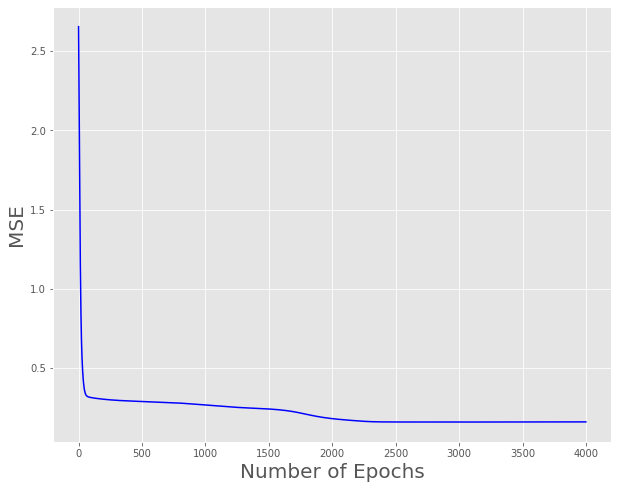

In [27]:
plt.figure(figsize=(10,8))
fig1 = plt.figure(1)
ax = fig1.gca()
ax = plt.plot(range(epochMax),MSEAv,'b')
plt.xlabel('Number of Epochs', fontsize=20)
plt.ylabel('MSE', fontsize=20)
plt.show()

In [32]:
center = np.array([0,0])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
df = pd.DataFrame(p) # transposed for easier plotting
df = df[(df[1]) >= 0]
center = np.array([1,0.5])
r1 = 0.7
R2 = 1.3
p = sample_ring(center,r1,R2,300)
dg = pd.DataFrame(p)
dg = dg[(dg[1]) <= 0.5]
a = df.to_numpy()
ones = np.ones((len(a),1))
hh = np.hstack((a,ones))
b = dg.to_numpy()
minones = -np.ones((len(b),1))
minhh = np.hstack((b,minones))
data = np.concatenate((hh, minhh), axis=0)
XN = dg.values
XP = df.values
datamisclass = data
Ymisclass = MLP(datamisclass[:,0:2].T,Wh4,Wo4)   #pick one of the weights to classify new dataset
H = np.multiply(datamisclass[:,2],Ymisclass)
datamisclass[:,2] = H
misclass = datamisclass[datamisclass[:,2] <0]

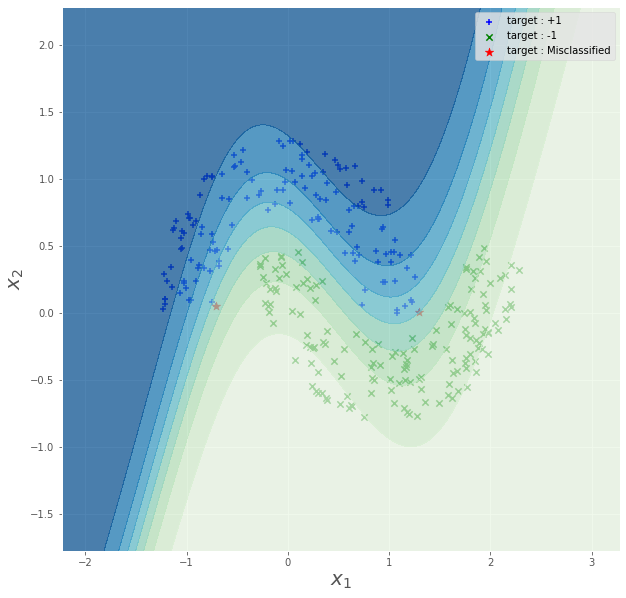

In [33]:
plt.figure(figsize=(10,10))
plt.xlabel('$x_1$',fontsize=20)
plt.ylabel('$x_2$',fontsize=20)
plt.scatter(XP[:,0],XP[:,1],marker='+', c='b',label = "target : +1", s=40)
plt.scatter(XN[:,0],XN[:,1],marker='x', c='g',label = "target : -1", s=40)
plt.scatter(misclass[:,0],misclass[:,1],marker='*', c='r',label = "target : Misclassified", s=80)
plt.legend()

x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                        np.arange(y_min, y_max, 0.01))

xxr = xx.ravel() 
yyr = yy.ravel() 
ones = np.ones(len(xxr))

# Predict the score
Xvals  = np.c_[ones, xxr, yyr]
Y = MLP(Xvals[:,1:3].T,Wh4,Wo4)    #pick the weights you have selected in last section
# Plot contour plot
scores = Y.reshape(xx.shape)
plt.contourf(xx, yy, scores, alpha=0.7,  cmap='GnBu')
# show the plot
plt.show()
plt.close()